# **Loading Data**

In [1]:
# mount to the colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from datetime import datetime
from IPython.display import Javascript
warnings.filterwarnings('ignore')

In [3]:
# load Data
ROOT_PATH = "/content/drive/MyDrive/upgrad/1.StatisticsEssentials/lendingClubCaseStudy"
df = pd.read_csv(f"{ROOT_PATH}/loan.csv")
df = df.dropna(axis='columns', how='all')
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

Understanding the data: Get information on the type of Variables in the data and number of Missing values for each variable.

In [5]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [7]:
df.last_pymnt_d

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
4        May-16
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 39717, dtype: object

In [8]:
df["next_pymnt_d"].unique()

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

The minimum next payment date is June 2016. So our data set includes records from before June 2016.

Understanding data using meta data dictionary and definition of each variable and beusiness terminology

In [9]:
xls = pd.ExcelFile(f"{ROOT_PATH}/Data_Dictionary.xlsx")
print(xls.sheet_names)
loanStatDf = pd.read_excel(xls, sheet_name="LoanStats")
rejctStatDf = pd.read_excel(xls, sheet_name="RejectStats")

['LoanStats', 'RejectStats']


In [10]:
loanStatDf.head(loanStatDf.shape[0])

LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
112    verification_status  Indicates if income was verified by LC, not ve...
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...
114               zip_code  The first 3 numbers of the zip code provided b...
115                    NaN                                                NaN
116                    NaN  * Employer Title replaces Employer Name for al...

[117 rows x 2 columns]

In [11]:
rejctStatDf.head(rejctStatDf.shape[0])

RejectStats File                                        Description
0      Amount Requested         The total amount requested by the borrower
1      Application Date               The date which the borrower applied 
2            Loan Title            The loan title provided by the borrower
3            Risk_Score  For applications prior to November 5, 2013 the...
4  Debt-To-Income Ratio  A ratio calculated using the borrower’s total ...
5              Zip Code  The first 3 numbers of the zip code provided b...
6                 State  The state provided by the borrower in the loan...
7     Employment Length  Employment length in years. Possible values ar...
8           Policy Code  publicly available policy_code=1\nnew products...

# **Cleaning Data**

Check Percentage of missing values in each column

In [12]:
percNaDf = (df.isnull().sum()/df.shape[0])*100
percNaDf[percNaDf>0].head(20)

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
revol_util                     0.125891
last_pymnt_d                   0.178765
next_pymnt_d                  97.129693
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

Removing columns with more than 90% missing values

In [13]:
df.drop(percNaDf[percNaDf>90].index, axis=1, inplace=True)
df.shape

(39717, 55)

Identify low variant columns

In [14]:
variantDf = df.nunique().sort_values()
variantDf.head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

Remove univariant columns

In [15]:
df = df[variantDf[variantDf > 1].index]
df.shape

(39717, 46)

In [16]:
df.head()

term  pub_rec_bankruptcies verification_status  loan_status  pub_rec  \
0   36 months                   0.0            Verified   Fully Paid        0   
1   60 months                   0.0     Source Verified  Charged Off        0   
2   36 months                   0.0        Not Verified   Fully Paid        0   
3   36 months                   0.0     Source Verified   Fully Paid        0   
4   60 months                   0.0     Source Verified      Current        0   

  home_ownership grade  inq_last_6mths  delinq_2yrs emp_length  ... revol_bal  \
0           RENT     B               1            0  10+ years  ...     13648   
1           RENT     C               5            0   < 1 year  ...      1687   
2           RENT     C               2            0  10+ years  ...      2956   
3           RENT     C               1            0  10+ years  ...      5598   
4           RENT     B               0            0     1 year  ...     27783   

                                                desc  \
0    Borrower added on 12/22/11 > I need to upgra...   
1    Borrower added on 12/22/11 > I plan to use t...   
2                                                NaN   
3    Borrower added on 12/21/11 > to pay for prop...   
4    Borrower added on 12/21/11 > I plan on combi...   

                  emp_title last_pymnt_amnt total_rec_int  total_pymnt_inv  \
0                       NaN          171.62        863.16          5833.84   
1                     Ryder          119.66        435.17          1008.71   
2                       NaN          649.91        605.67          3005.67   
3       AIR RESOURCES BOARD          357.48       2214.92         12231.89   
4  University Medical Group           67.79       1037.39          3513.33   

    total_pymnt                                                url member_id  \
0   5863.155187  https://lendingclub.com/browse/loanDetail.acti...   1296599   
1   1008.710000  https://lendingclub.com/browse/loanDetail.acti...   1314167   
2   3005.666844  https://lendingclub.com/browse/loanDetail.acti...   1313524   
3  12231.890000  https://lendingclub.com/browse/loanDetail.acti...   1277178   
4   3513.330000  https://lendingclub.com/browse/loanDetail.acti...   1311748   

        id  
0  1077501  
1  1077430  
2  1077175  
3  1076863  
4  1075358  

[5 rows x 46 columns]

Find number of unique values

In [17]:
df.nunique().sort_values(ascending=False).head(15)

id                 39717
member_id          39717
url                39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
desc               26527
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
dtype: int64

In [18]:
print("member_id:", df["member_id"].values)
print("id:", df["id"].values)
print("url:", df["url"].values)

member_id: [1296599 1314167 1313524 ...   90390   89243   86999]
id: [1077501 1077430 1077175 ...   90395   90376   87023]
url: ['https://lendingclub.com/browse/loanDetail.action?loan_id=1077501'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=1077430'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=1077175' ...
 'https://lendingclub.com/browse/loanDetail.action?loan_id=90395'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=90376'
 'https://lendingclub.com/browse/loanDetail.action?loan_id=87023']


"member_id", "id" and "url" are variables with all the values being unique. So all of them can be used as the identifier. I will keep the id and remove the others, since they don't have any effedct on our analysis.

In [19]:
df.drop(["member_id", "url"], axis=1, inplace=True)
df.shape

(39717, 44)

In [20]:
print("emp_title:", df["emp_title"].values, ", Number of unique values:", df["emp_title"].nunique(), ", Number of NA's:", df["emp_title"].isnull().sum())
print("title:", df["title"].values, ", Number of unique values:", df["title"].nunique(), ", Number of NA's:", df["title"].isnull().sum())
print("desc:", df["desc"].values, ", Number of unique values:", df["desc"].nunique(), ", Number of NA's:", df["desc"].isnull().sum())

emp_title: [nan 'Ryder' nan ... nan nan 'Evergreen Center'] , Number of unique values: 28820 , Number of NA's: 2459
title: ['Computer' 'bike' 'real estate business' ... 'MBA Loan Consolidation'
 'JAL Loan' 'Consolidation Loan'] , Number of unique values: 19615 , Number of NA's: 11
desc: ['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>'
 '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>'
 nan ... nan nan
 'I plan to consoli

emp_title and title columns are Nominal variables from type driven Metrics which most of their values are unique. So we can remove them too.
The desc variable is a Loan description provided by the borrower and is also a nominal type driven metrics with high number of unique values. So it is not a risk factor and we can remove it.

In [21]:
df.drop(["emp_title", "title", "desc"], axis=1, inplace=True)
df.shape

(39717, 41)

### Investigate and Remove duplicates.

In [22]:
print(df.shape)
print(df.duplicated().any())
df.drop_duplicates(subset=None, inplace=True)
print(df.duplicated().any())
df.drop_duplicates(subset=["id"], inplace=True)
print(df.shape)

(39717, 41)
False
False
(39717, 41)


From variables left loan status is a beusiness driven metric that is the main indictaor of defaulted or undefaulted browers. This varable is a nominal variable including three categories. We are only interested in the loans that have diffinite answer of being payed off or are defaulted.


In [23]:
print(df['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


The three different categories of this variable are; Fully Paid, Charged off and current. Fully Paid and Charged off are considered as those loans that the result is cleared out as being defaulted or not but the current ones we do not know what would be the final result. So lenders that the status of their loan is current will be removed from the data.

In [24]:
df = df[df.loan_status!="Current"]
df.shape

(38577, 41)

From remaining subjects we want to identify percentage of missing values in each row. If there is a low percentage of rows have missing values since we have 39717 rows, we better to remove those rows instead of introducing bias to the analysis by applying imputation.

In [25]:
perceSubjNull = round((df.isnull().values.ravel().sum()/len(df.index))*100, 2)
perceSubjNull

69.36

Since about 70% of the rows have missing values we need to identify columns with missing values and impute or remove Missing values based on the information we have about the variable. If we can recover these missing values from other information we will do. If we can not and they are vital information it is better to remove the row.

In [26]:
# Columns that have missing values

percNaCol = round(100*(df.isnull().sum()/len(df.index)), 2)
percNaCol[percNaCol>0]

pub_rec_bankruptcies       1.81
emp_length                 2.68
mths_since_last_delinq    64.56
last_pymnt_d               0.18
last_credit_pull_d         0.01
revol_util                 0.13
dtype: float64

more than 64% of these removing values belong to mths_since_last_delinq an interval variable that can be explaining some risk factors. This variable is important for our analysis. Since the number of missing values are alot we need to impute that. In orther to do that we need to replace the nan values by value calculated for reducing last_pymnt_d from the last date this data recorded. Based on "next_pymnt_d" the minimum next paymnet day is June 2016. So our records are covering informations from before June 2016.  


In [27]:
df["last_pymnt_d"] = pd.to_datetime(df["last_pymnt_d"], format="%b-%y")
df["last_pymnt_d"]
today = datetime.today()
datem = pd.to_datetime(datetime(2016, 6, 1))
datem
df['delay_time'] = round((datem  - df["last_pymnt_d"]).dt.days/30, 0)
df.mths_since_last_delinq.fillna(df['delay_time'], inplace=True)

emp_length: Employment length in years is aone of the important factors in risk assesment. So we can not remove this column. It is an interval base type driven metrics and we don't have any other resource in data that we can estimate its value. To avoid introducing bias to the data I have removed this value.

revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. This is a beusiness driven metrics in ratio format. We have revol_bal that indicate total credit revolving balance available and also loan_amnt that shows amount of loan the brower applied for so we can get the revol_util percentage by deviding loan_amnt to revol_bal

pub_rec_bankruptcies: Number of public record bankruptcies is a ordinal type driven matrics that we do not have any resource to replace the missing value for it so the best way to deal with it to avoid value exaggeration would be to remove rows with missing values for it. It is also one of the important factors in risk assesment so we can not remove the variable.

All of these informations are all vital information. Since missing values for revol_util is less than 0.5% we can remove rows with missing values for that column.



In [28]:
df["utilPerc"] = np.nan
df.loc[df.revol_bal!=0, "utilPerc"] = round((df.loc[df.revol_bal!=0, 'loan_amnt']/df.loc[df.revol_bal!=0, 'revol_bal'])*100, 2)
df["utilPerc"]

0         36.64
1        148.19
2         81.19
3        178.64
5         62.79
          ...  
39712     34.37
39713     96.08
39714     51.56
39715      5.84
39716    179.64
Name: utilPerc, Length: 38577, dtype: float64

In [29]:
print(df.revol_util.unique())
print(df.revol_util.nunique())

print(df.int_rate.unique())
print(df.int_rate.nunique())

['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
1088
['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '20.89%' '20.30%' '23.91%' '19.03%' '23.13%' '22.74%' '22.35%'
 '22.06%' '24.11%' '6.00%' '23.52%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '19.29%'
 '13.99%' '18.39%' '16.89%' '17.99%' '20.99%' '22.85%' '19.69%' '20.62%'
 '20.25%' '21.36%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.40%' '21.48%' '14.82%' '14.17%'
 '7.29%' '17.88%' '20.11%' '16.02%' '13.43%' '14.91%' '13.06%' '15.28%'
 '15.6

revol_util and int_rate are numerical columns that because of % sign been presented as string based column. So we need to remove the % from these columns and convert ithem to numerical.

In [30]:
df["revol_util"] = df["revol_util"].str.replace("%", "").astype(float)
df["int_rate"] = df["int_rate"].str.replace("%", "").astype(float)

Fill the missing values for reol_utils

In [31]:
df["revol_util"].fillna(df["utilPerc"], inplace=True)
df["revol_util"].unique()

array([8.370e+01, 9.400e+00, 9.850e+01, ..., 4.000e-02, 7.280e+00,
       1.015e+01])

total_rec_late_fee, recoveries, collection_recovery_fee variables are Business Driven Metrices related

1.   total_rec_late_fee, recoveries, collection_recovery_fee variables are related to the late payment charges. So they will not be useful for estimation of risk association for each participant.

2.   last_credit_pull_d, last_pymnt_d, are dates for last pulled credit and last payments. So they cannot be considered as risk factors.

3.   out_prncp_inv, out_prncp are mainely related to remaining payments. So there is no association between these variables and risk factors.

4.   total_rec_int, total_rec_prncp are general information on the payments recived. So they are not an indicator of risk factors.

Since these variables are not considered as risk factors we can remove them.


In [32]:
df.columns

Index(['term', 'pub_rec_bankruptcies', 'verification_status', 'loan_status',
       'pub_rec', 'home_ownership', 'grade', 'inq_last_6mths', 'delinq_2yrs',
       'emp_length', 'purpose', 'sub_grade', 'open_acc', 'addr_state',
       'issue_d', 'total_acc', 'mths_since_last_delinq', 'last_pymnt_d',
       'last_credit_pull_d', 'int_rate', 'earliest_cr_line', 'zip_code',
       'loan_amnt', 'funded_amnt', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_rec_late_fee', 'collection_recovery_fee', 'dti', 'recoveries',
       'annual_inc', 'total_rec_prncp', 'funded_amnt_inv', 'installment',
       'revol_bal', 'last_pymnt_amnt', 'total_rec_int', 'total_pymnt_inv',
       'total_pymnt', 'id', 'delay_time', 'utilPerc'],
      dtype='object')

In [33]:
notRiskFactor = ["total_rec_int", "total_rec_prncp", "total_rec_late_fee", "recoveries", 'delay_time', "utilPerc",
                 "collection_recovery_fee", "last_credit_pull_d", "last_pymnt_d", "out_prncp", "out_prncp_inv"]
df.drop(notRiskFactor, axis=1, inplace=True)

print(df.shape)

(38577, 32)


Now we want to see how many subjects having missing values for both bakrupcies and employment lenght

In [34]:
# Columns that have missing values
percNaCol = round(100*(df.isnull().sum()/len(df.index)), 2)
percNaCol[percNaCol>0]

pub_rec_bankruptcies      1.81
emp_length                2.68
mths_since_last_delinq    0.12
revol_util                0.13
dtype: float64

As It has been mentioned earlier there isn't any way that we can impute these remaining missing values so we need to remove these rows

In [35]:
df[["pub_rec_bankruptcies", "emp_length", "mths_since_last_delinq"]].isnull().all(1).sum()

0

In [36]:
print(df.shape)
df.dropna(subset=["pub_rec_bankruptcies", "emp_length", "mths_since_last_delinq"], axis=0, inplace=True)
print(df.shape)

print(df.pub_rec_bankruptcies.unique())
print(df.emp_length.unique())
print(df.mths_since_last_delinq.unique())

(38577, 32)
(36804, 32)
[0. 1. 2.]
['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years']
[ 17.  39.  24.  35.   1.  51.  44.  37.  33.  48.  32.  61.  38.   8.
  10.  45.  46.  20.  18.  34.  31.  29.  26.  22.  47.  23.  36.   5.
   4.  14.  28.  21.  41.  40.  74.  25.  53.  43.  77.  56.  42.  52.
  30.  16.  60.  54.   9.  27.  11.   7.   3.  13.  65.  19.  59.  79.
  57.  63.  49.  15.  50.  73.  70.  55.   2.  75.  69.  81.  68.  78.
  82.  64.  76.  62.  72.  12.  58.  71.   6.  66.  80.  67.  83.  86.
 115.  96. 120. 106.  89. 103. 107.  85.  97.  95.  84.  87.  88.  90.
  91.  93.  94.  98.  92.   0.]


Now we want to find number of factors for categorical (string base) columns and make sure ther isn't any extra space or character in any of the columns

In [37]:
print(df.dtypes)

term                       object
pub_rec_bankruptcies      float64
verification_status        object
loan_status                object
pub_rec                     int64
home_ownership             object
grade                      object
inq_last_6mths              int64
delinq_2yrs                 int64
emp_length                 object
purpose                    object
sub_grade                  object
open_acc                    int64
addr_state                 object
issue_d                    object
total_acc                   int64
mths_since_last_delinq    float64
int_rate                  float64
earliest_cr_line           object
zip_code                   object
loan_amnt                   int64
funded_amnt                 int64
revol_util                float64
dti                       float64
annual_inc                float64
funded_amnt_inv           float64
installment               float64
revol_bal                   int64
last_pymnt_amnt           float64
total_pymnt_in

In [38]:
print(df['term'].unique())

[' 36 months' ' 60 months']


Term is a ordinal type driven metrics column with two factors. There is an extra spacea at the begining of each category so we need to remove those spaces

In [39]:
df["term"] = df.term.str.strip()
print(df['term'].unique())

['36 months' '60 months']


issue_d: The month which the loan was funded

earliest_cr_line: The month the borrower's earliest reported credit line was opened

issue_d and earliest_cr_line are date columns that can be splited to month and year

**There are Some years that are being converted to more than 2023 since they belong to befor unix time stamp.
So subtracting 100 from those years will give us more accurate results.**

In [40]:

df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%y")

df["issue_year"] = df["issue_d"].dt.year
df["issue_year"] = df["issue_year"].apply(lambda x: x-100 if x > 2023 else x)

df["issue_month"] = df["issue_d"].dt.month

df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%y")

df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_year"] = df["earliest_cr_line_year"].apply(lambda x: x-100 if x > 2023 else x)

df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month

df.drop(["issue_d", "earliest_cr_line"], axis=1, inplace=True)
print(df.earliest_cr_line_year.unique(), df.issue_year.unique())


[1985 1999 2001 1996 2004 2005 2007 1998 1989 2003 1991 1993 1997 1983
 2002 1984 2006 1987 1981 2000 1994 1995 1992 1986 1990 1988 1980 2008
 1979 1978 1971 1972 1970 1969 1975 1976 1977 1982 1968 1974 1967 1965
 1973 1963 1966 1962 1956 1946 1950 1964 1954] [2011 2010 2009 2008 2007]


# **Univariate Analysis**

### **For Numerical variables**: Get general idea about all the numerical variables by using description function

In [41]:
numericalCols = ["int_rate", "loan_amnt", "funded_amnt", "revol_util", "dti", "annual_inc",
                 "funded_amnt_inv", "installment", "last_pymnt_amnt", "total_pymnt",
                 "total_pymnt_inv", "mths_since_last_delinq"]

df[numericalCols].describe()

int_rate     loan_amnt   funded_amnt    revol_util           dti  \
count  36804.000000  36804.000000  36804.000000  36760.000000  36804.000000   
mean      11.986321  11143.695658  10874.978943     48.995704     13.332647   
std        3.701944   7368.242731   7107.293855     28.315160      6.651074   
min        5.420000    500.000000    500.000000      0.000000      0.000000   
25%        8.940000   5500.000000   5400.000000     25.600000      8.220000   
50%       11.830000  10000.000000   9600.000000     49.500000     13.430000   
75%       14.470000  15000.000000  15000.000000     72.500000     18.590000   
max       24.400000  35000.000000  35000.000000     99.900000     29.990000   

         annual_inc  funded_amnt_inv   installment  last_pymnt_amnt  \
count  3.680400e+04     36804.000000  36804.000000     36804.000000   
mean   6.943186e+04     10433.655455    324.754101      2795.501415   
std    6.405476e+04      7008.194880    208.844617      4534.849145   
min    4.000000e+03         0.000000     16.080000         0.000000   
25%    4.100400e+04      5000.000000    167.725000       222.662500   
50%    6.000000e+04      9000.000000    280.005000       590.225000   
75%    8.300000e+04     14350.000000    429.067500      3540.442500   
max    6.000000e+06     35000.000000   1305.190000     36115.200000   

        total_pymnt  total_pymnt_inv  mths_since_last_delinq  
count  36804.000000     36804.000000            36804.000000  
mean   12004.102790     11528.198260               38.153706  
std     8850.737499      8707.144347               18.857760  
min        0.000000         0.000000                0.000000  
25%     5577.737804      5278.787500               24.000000  
50%     9817.294148      9357.340000               38.000000  
75%    16303.695000     15619.730000               51.000000  
max    58563.679930     58563.680000              120.000000

The distribution and possible outliers in each of these continues variables will be investigated using histogram and box plot. Aside from identifying possible outlier we need to look at the distribution of the data to be able to:

1.   Identify ant skwednes or possible divergence to specific value
2.   Check the normality for selecting proper statistical tests



In [42]:
def dist_investigate(data, label):
  plt.figure(figsize=(16,4))

  plt.subplot(1,2,1)
  sns.distplot(data)
  plt.xlabel(label)

  plt.subplot(1,2,2)
  sns.boxplot(data)
  plt.xlabel(label)

  plt.gca().set_xticklabels([])
  plt.suptitle(label, fontsize=20, fontweight="bold")
  plt.show()

In [43]:
continuesDict = {
    "Interest Rate":"int_rate", "Loan Amount": "loan_amnt", "Funded Loan Amount":"funded_amnt",
                    "Anual Income":"annual_inc", "Funded Amount Investment":"funded_amnt_inv",
                    "Installment": "installment", "Total Payment Recieved Today": "total_pymnt",
                    "Payment Recieved For Funded Proportion" :"total_pymnt_inv",
                    "Total Credit Revolving Balance": "revol_bal", "Ratio debt to Income":"dti",
                    "Number of Months from Last deliguency":"mths_since_last_delinq"}

<IPython.core.display.Javascript object>

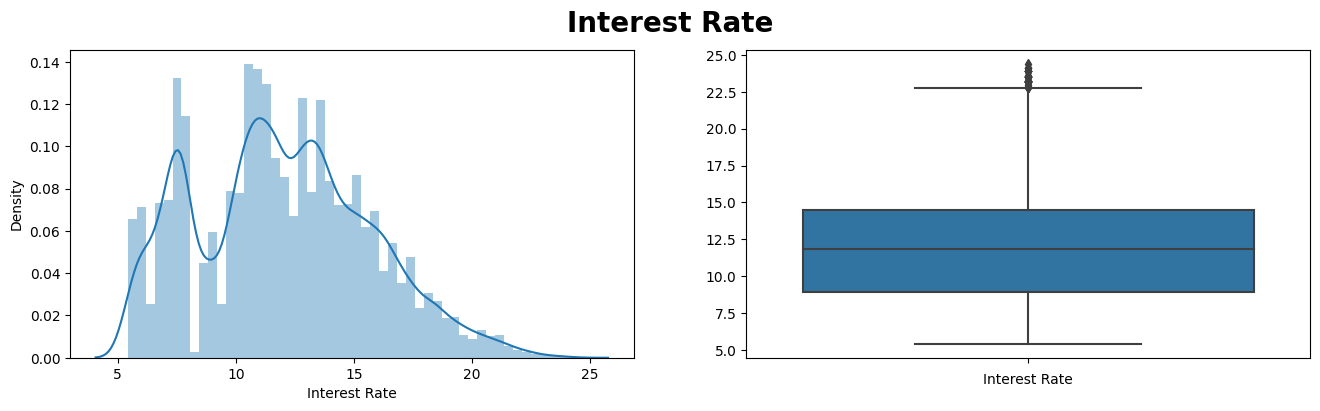

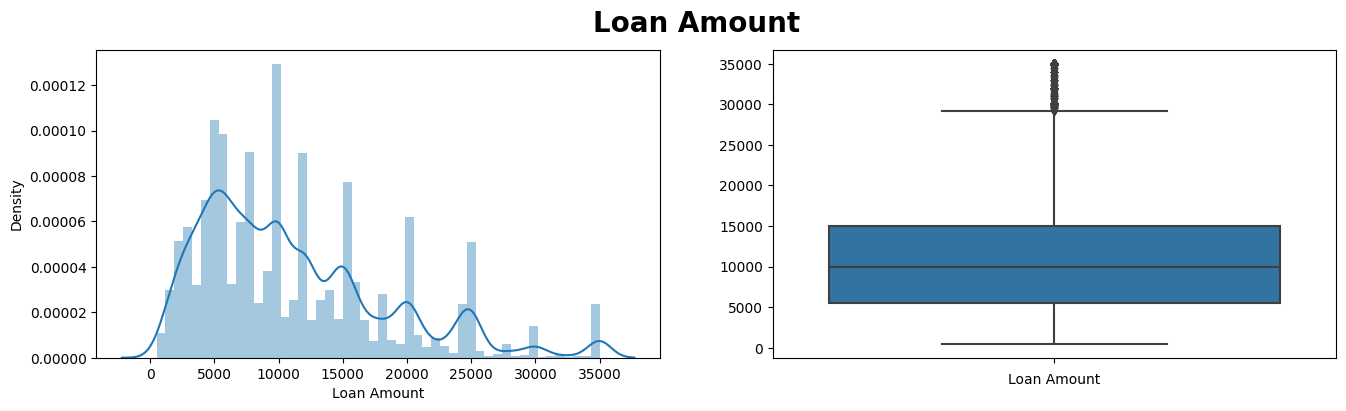

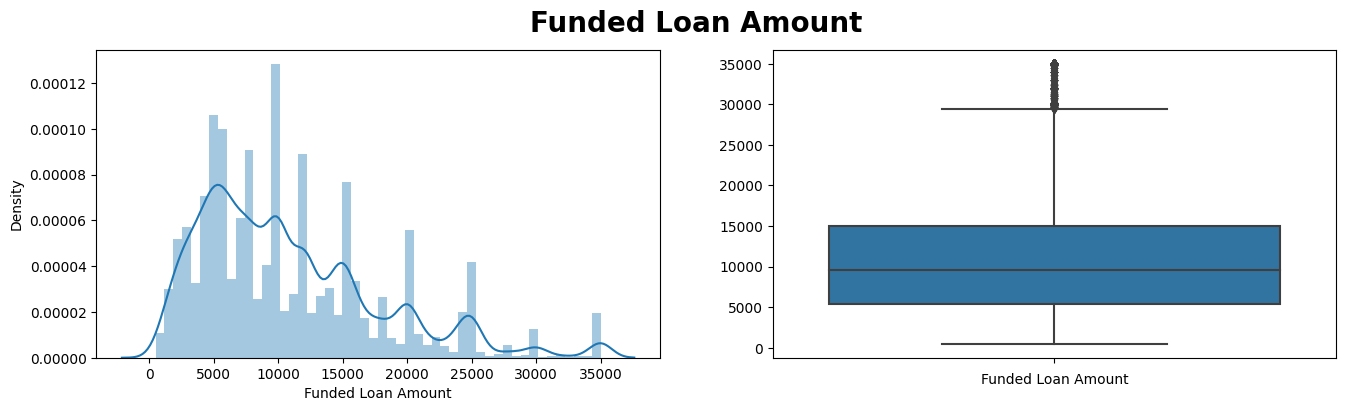

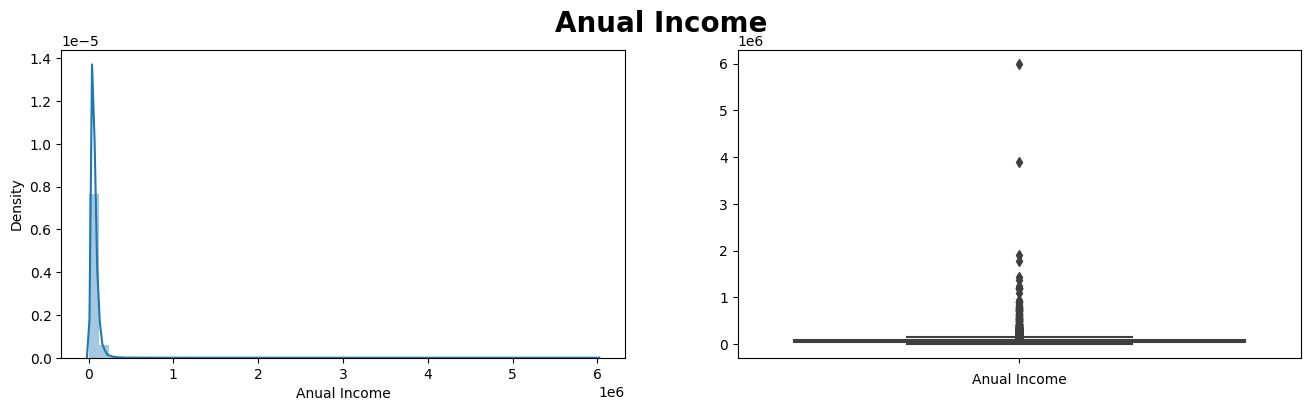

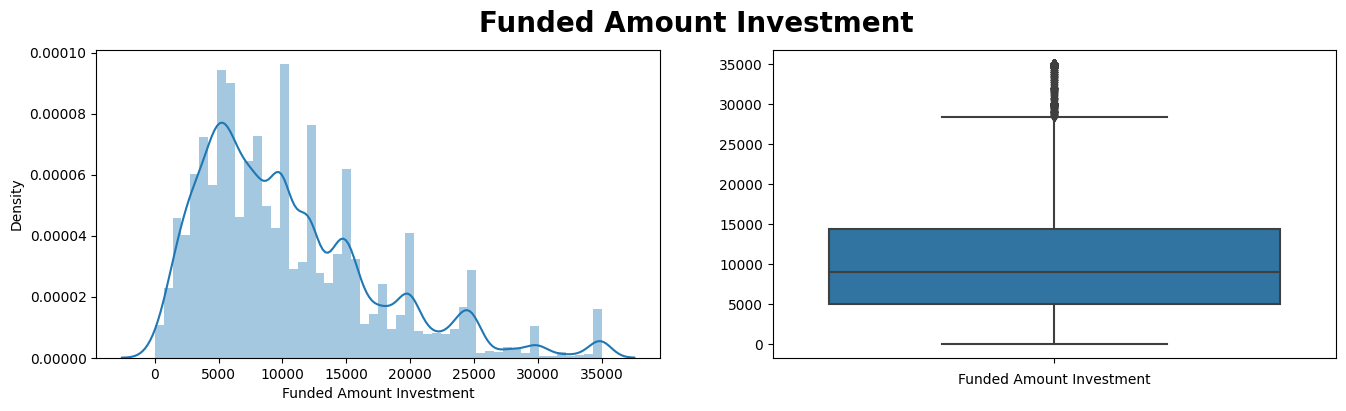

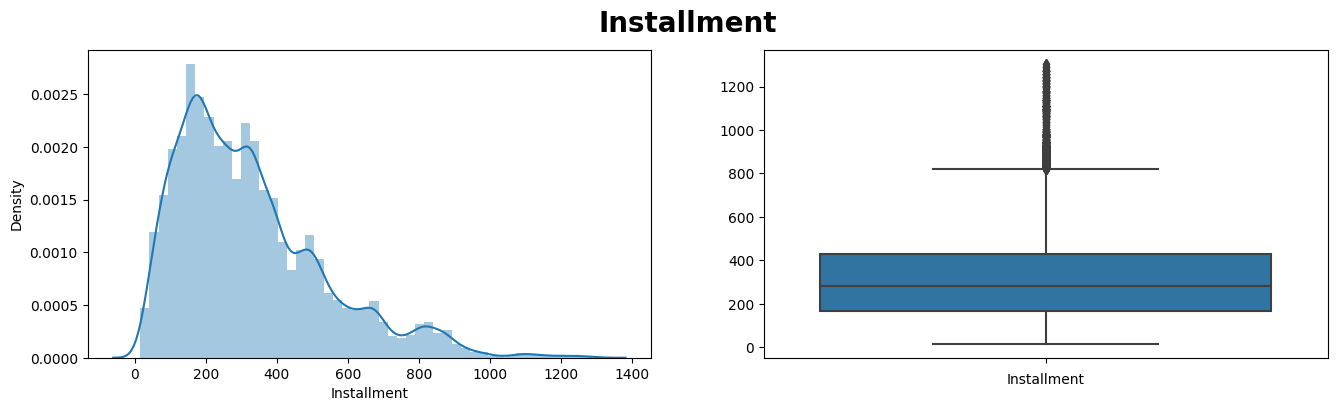

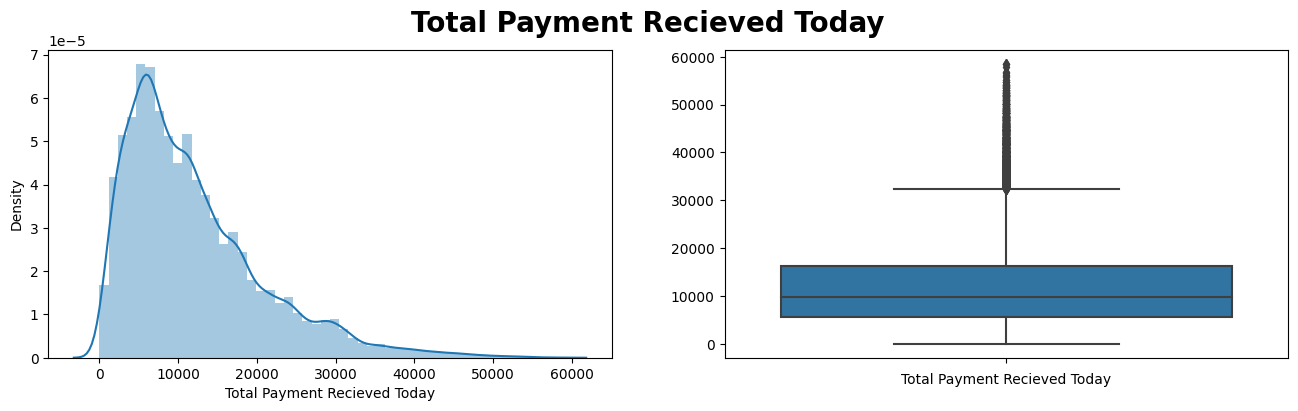

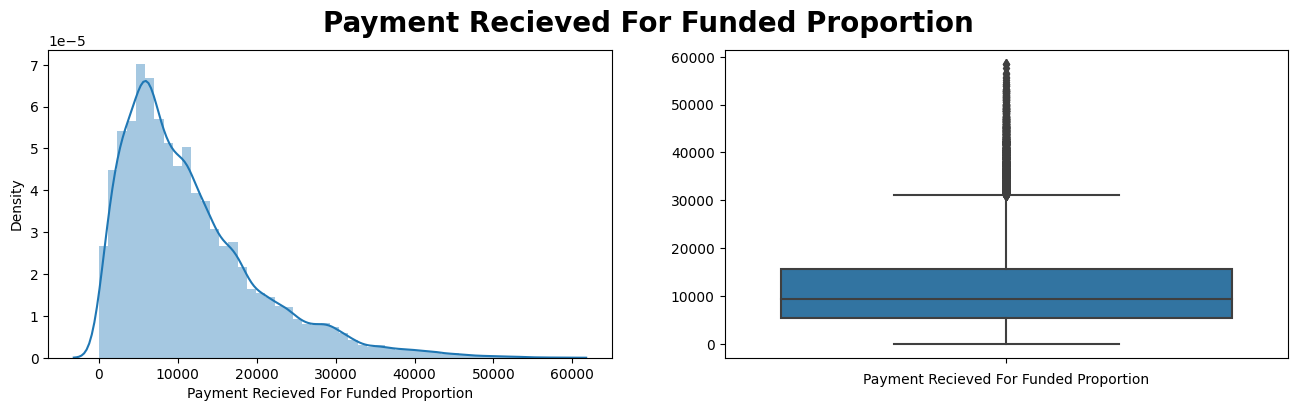

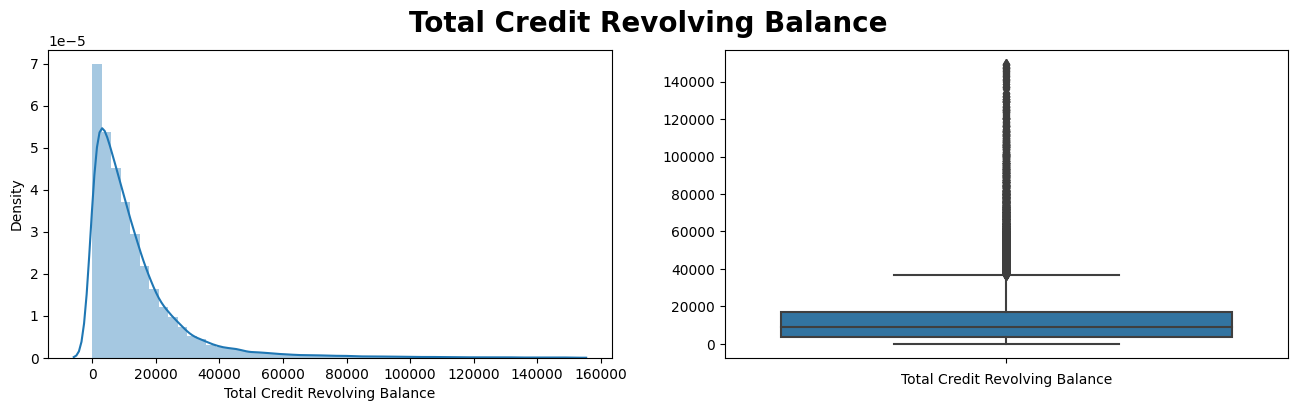

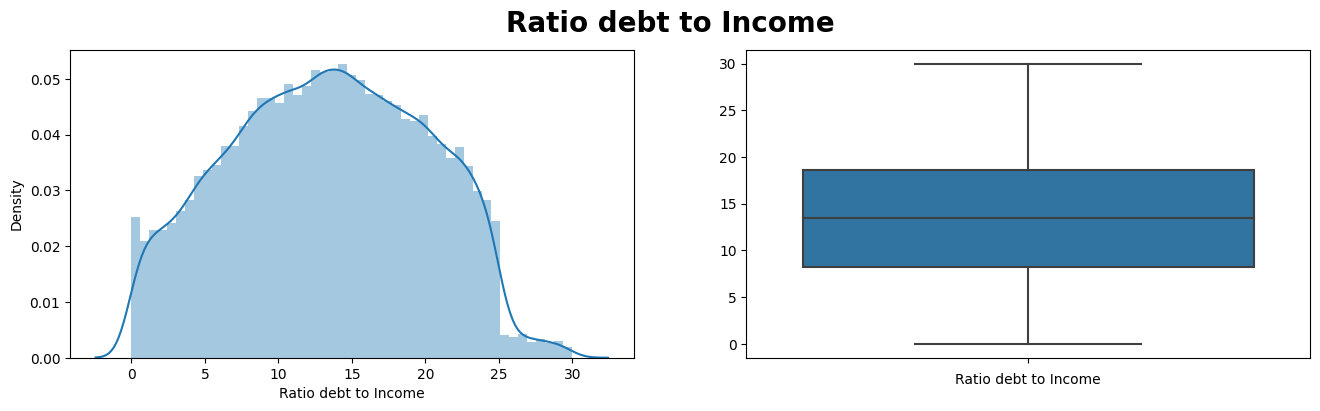

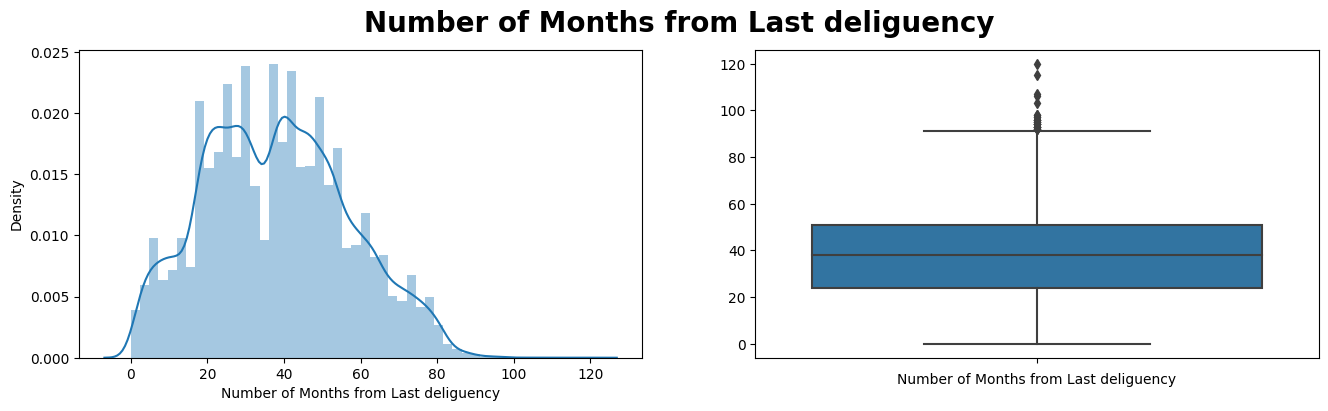

In [44]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
for k in continuesDict.keys():
  dist_investigate(df[continuesDict[k]], k)

There are multiple observation to be cosidered inthis analysis.
1. There is a binomial distribution for number of months from last deliguency. There is a reduction in the frequency of months near to 39 months from the date of lase deliguency.

2. The interest rate also have multinomial distribution and most of the interest rates are falling between 10 to 15 percent.

3. There are large number of outliers in most of these variables specially Total credit revolving and anual income that highly skewd their distribution

4. The amount of loan and founded loans are spiked at 10000 indicating most loans are at that range

5. Loan Amount and Funded Loan Amount seem to be having almost equal distribution. So I will use only one of them for the analysis.

6. Similarly the distribution for Payment Recieved for Founded Proportion and Total Payment Recieved Today are very similar. So I used only Total Payment Recieved.

In [45]:
df.drop(["total_pymnt_inv", "funded_amnt"], axis=1, inplace=True)

## **Outlier Removal**

There are some very large outliers in all of the continues variables with the exception of Loan used relative to availability and ration debt obligation. We would remove these outlier by removing values grater than 99 percentile for interest rate and 95 for the rest of variables. For last payment amount we can put the upper threshold at 90 percentile. Since we don't have any outlier in lower bond we will put the lower threshold as 0. Then check the distribution after outlier removal. This would give us better oportunity to investigate distribution of different variables

In [46]:
def removeOutlier(data, lowT=0.01, upT=0.99):
  lower = data.quantile(lowT)
  upper = data.quantile(upT)
  data = np.where(data >= upper,
        upper,
        np.where(data <= lower,
        lower,
        data))
  return data

<IPython.core.display.Javascript object>

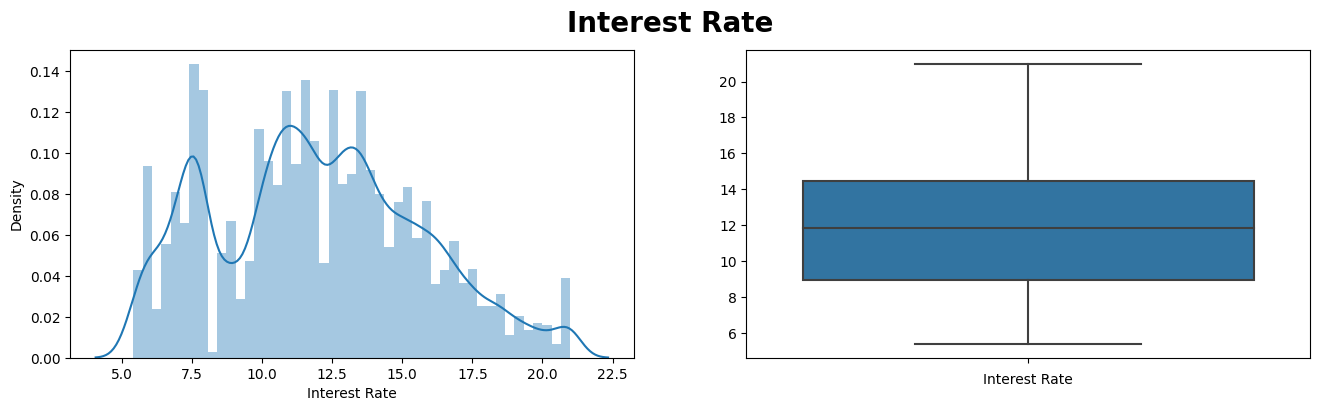

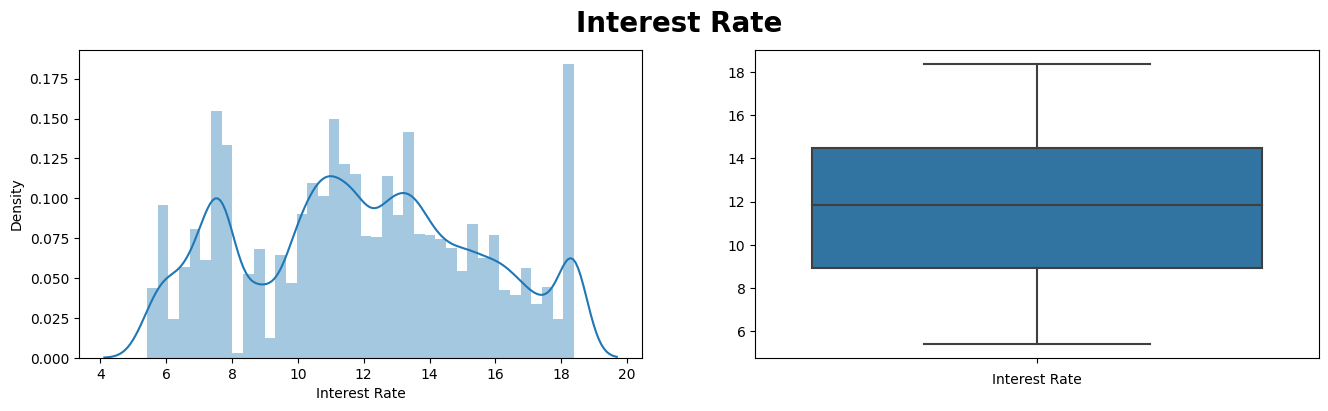

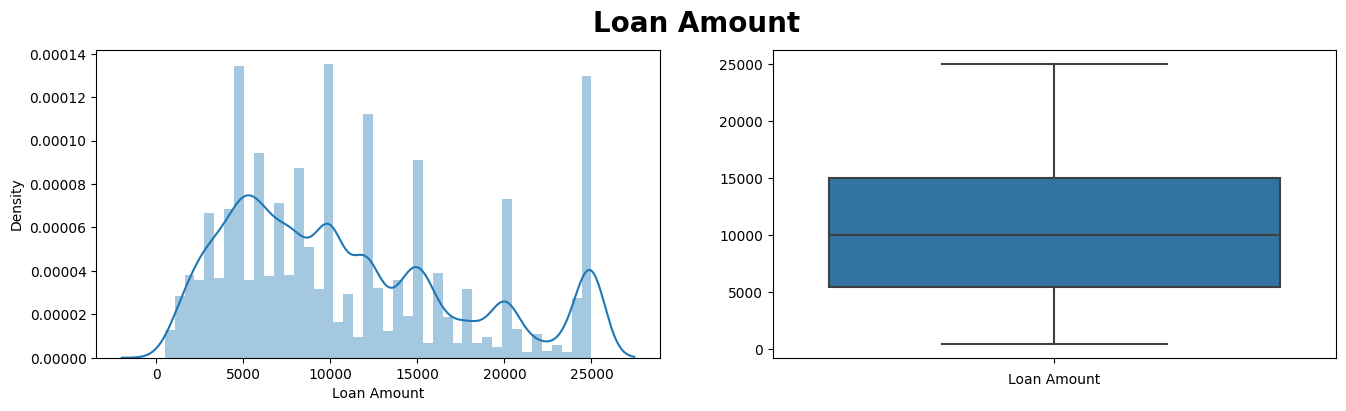

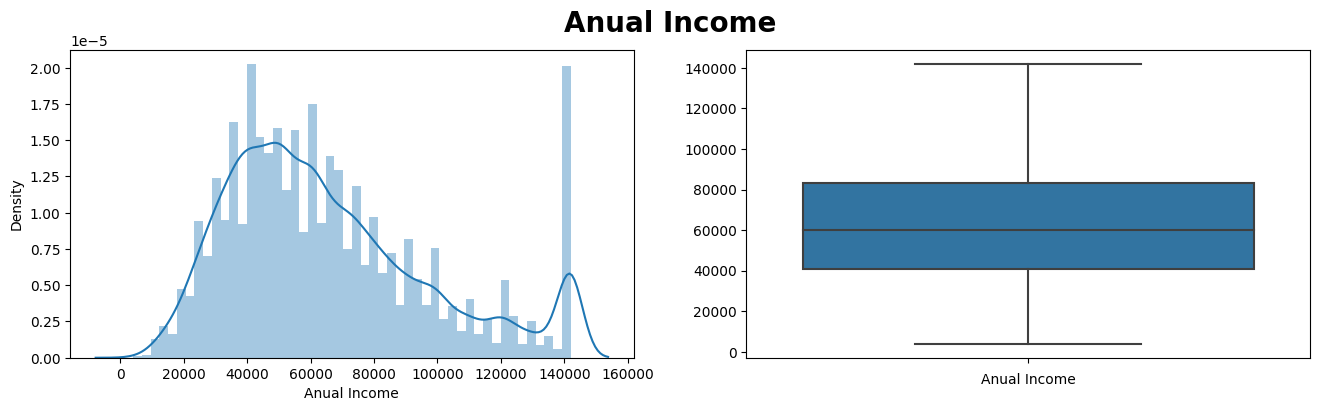

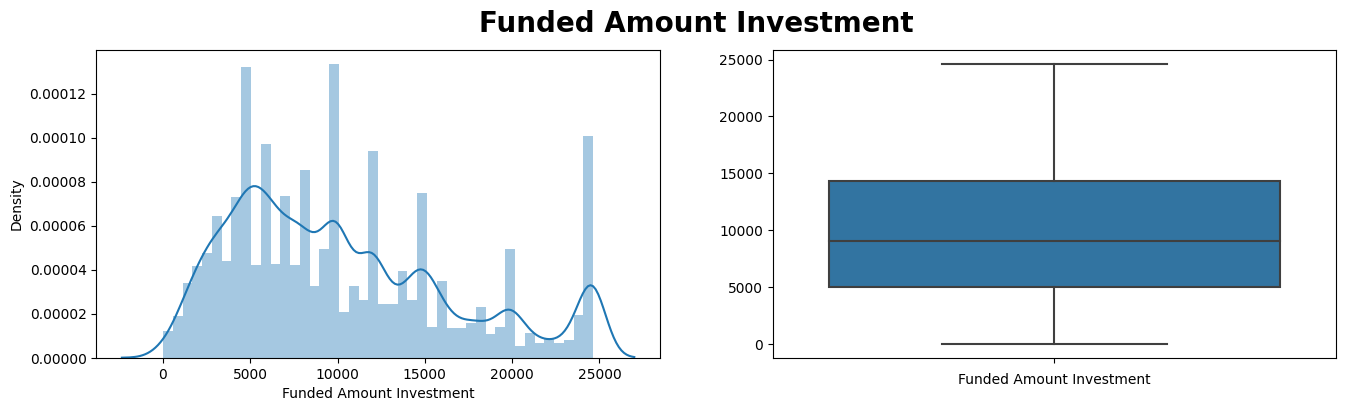

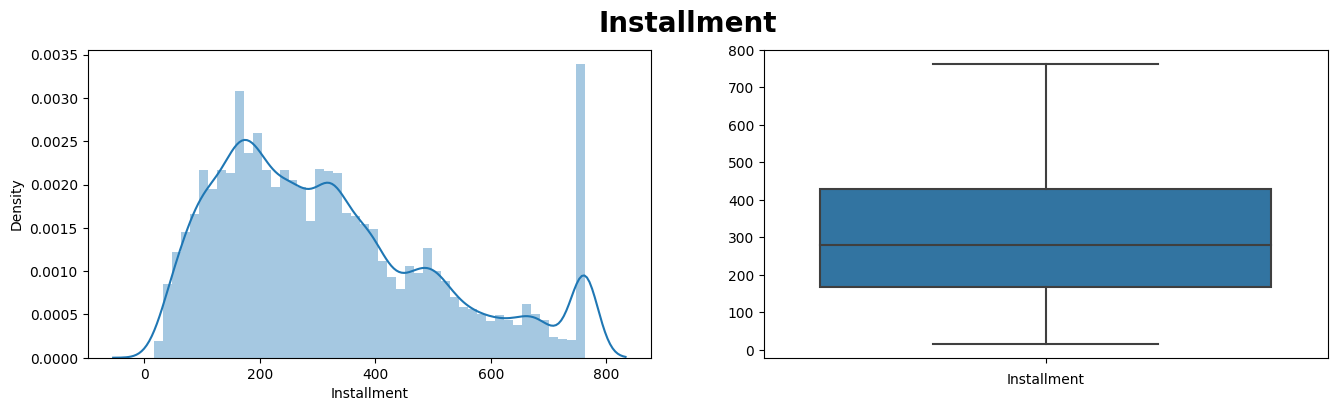

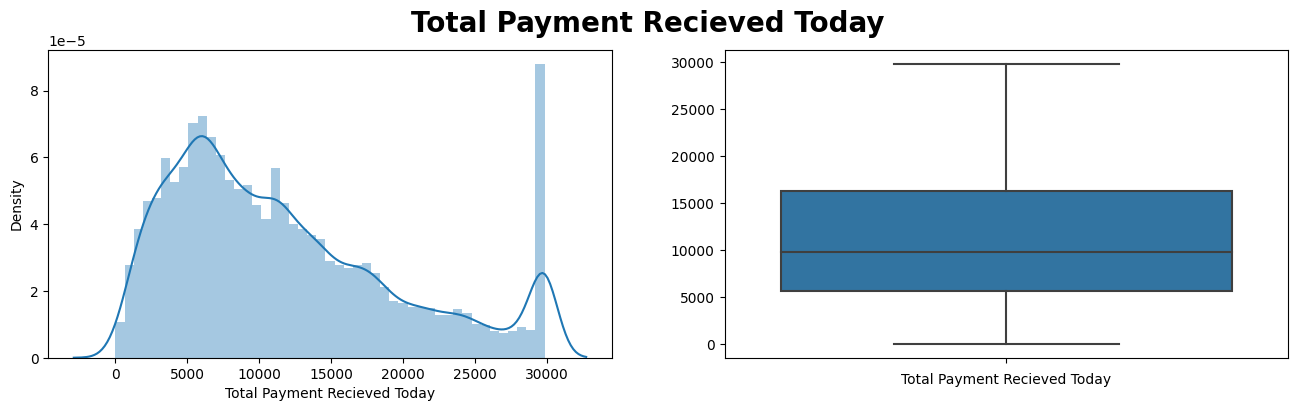

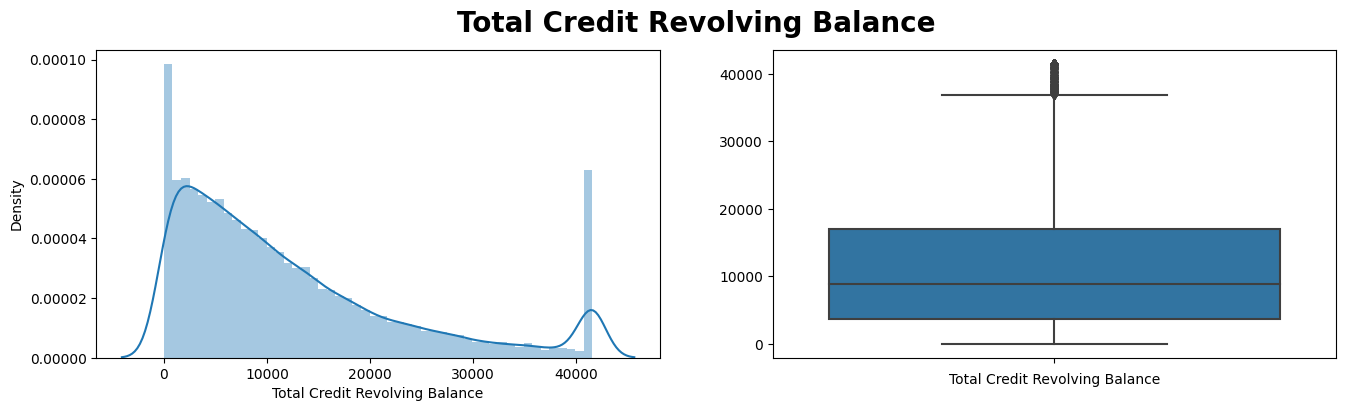

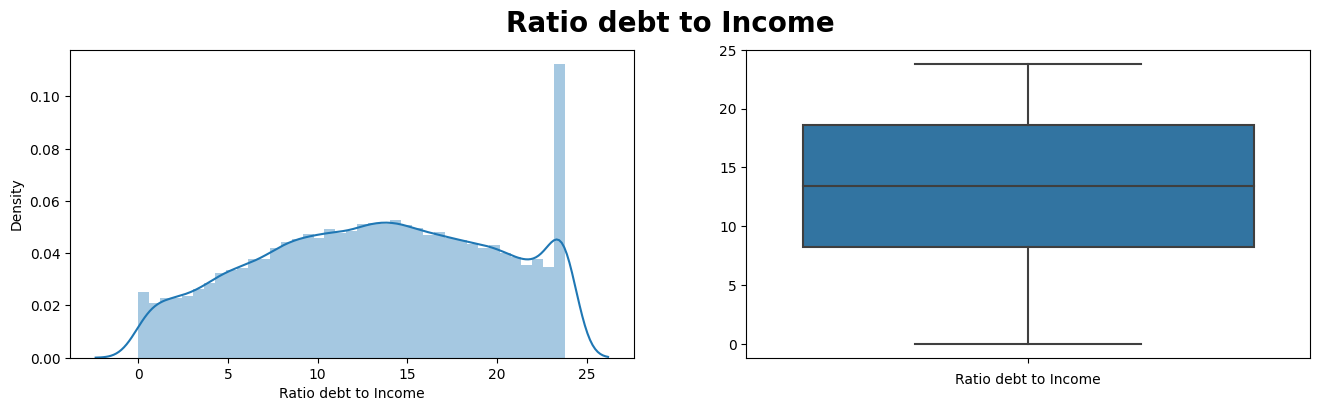

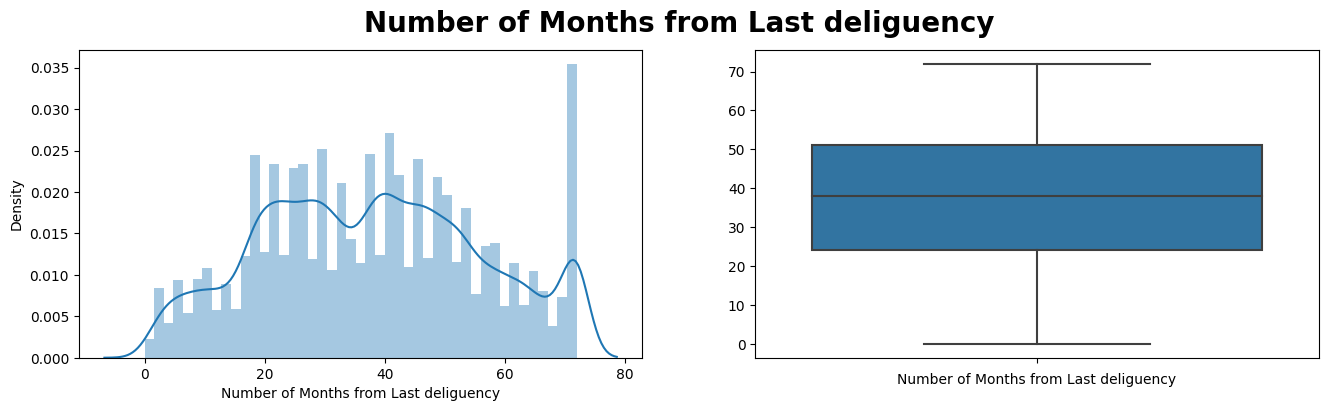

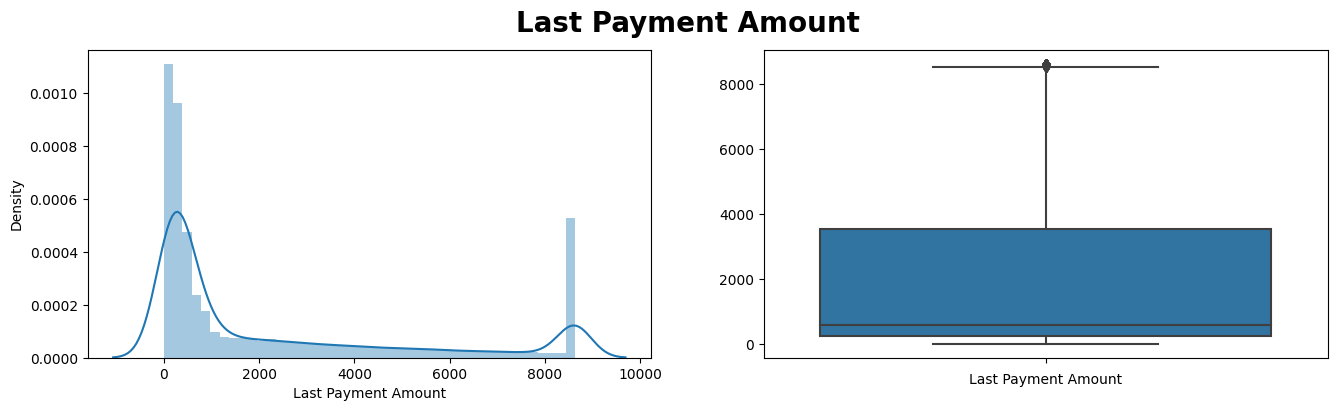

In [47]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
continuesDict = {"Interest Rate":"int_rate", "Loan Amount": "loan_amnt",
                    "Anual Income":"annual_inc", "Funded Amount Investment":"funded_amnt_inv",
                    "Installment": "installment", "Total Payment Recieved Today": "total_pymnt",
                    "Total Credit Revolving Balance": "revol_bal", "Ratio debt to Income":"dti",
                    "Number of Months from Last deliguency":"mths_since_last_delinq"}

data = removeOutlier(df["int_rate"], lowT=0)
dist_investigate(data, "Interest Rate")

for k in continuesDict.keys():
  data = removeOutlier(df[continuesDict[k]], lowT=0, upT=0.95)
  dist_investigate(data, k)

data = removeOutlier(df["last_pymnt_amnt"], lowT=0, upT=0.9)
dist_investigate(data, "Last Payment Amount")

### **For categorical variables**: We would get general idea about all the categorical variables by using pie chart combined with bar chart

In [48]:
def countPlots(data, target, title):

  porcent = data[target].value_counts(normalize=True)*100
  labels = data[target].unique()

  plt.figure(figsize=(16,4))
  plt.subplot(1,2,1)
  sns.countplot(x=target, data=data, dodge=True, palette="mako_r")
  plt.tick_params(axis='x', rotation=90)

  plt.subplot(1,2,2)
  patches, texts = plt.pie(porcent, radius=1.5)
  labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(porcent.index, porcent)]

  sort_legend = True
  if sort_legend:
      patches, labels, dummy =  zip(*sorted(zip(patches, labels, porcent),
                                            key=lambda x: x[2],
                                            reverse=True))

  plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=8)

  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.show()

def barPlots(data, target, title):

  plt.figure(figsize=(20,4))
  sns.countplot(x=target, data=data, palette="mako_r")
  plt.tick_params(axis='x', rotation=90)

  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.show()

<IPython.core.display.Javascript object>

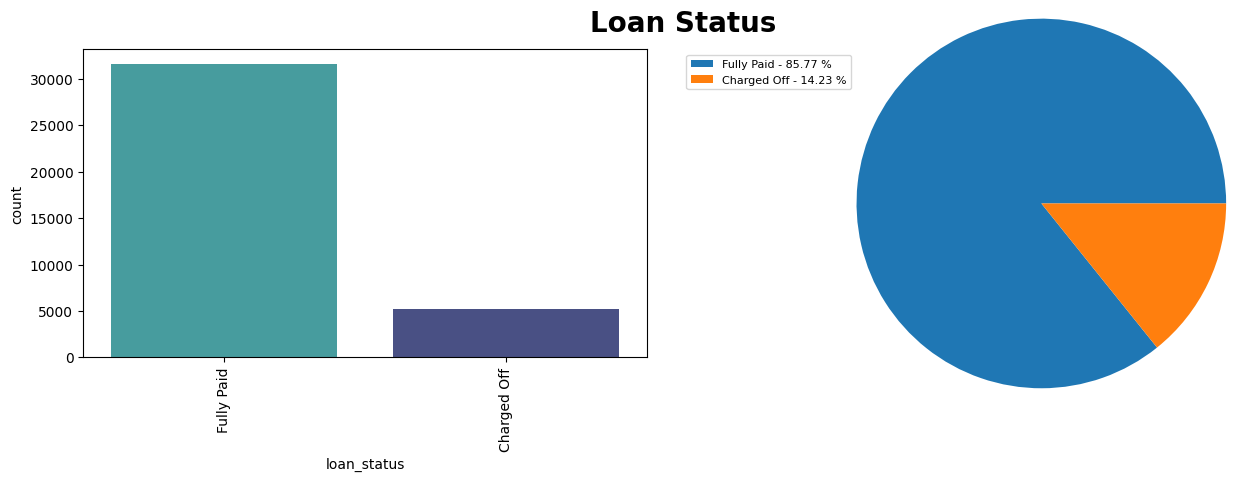

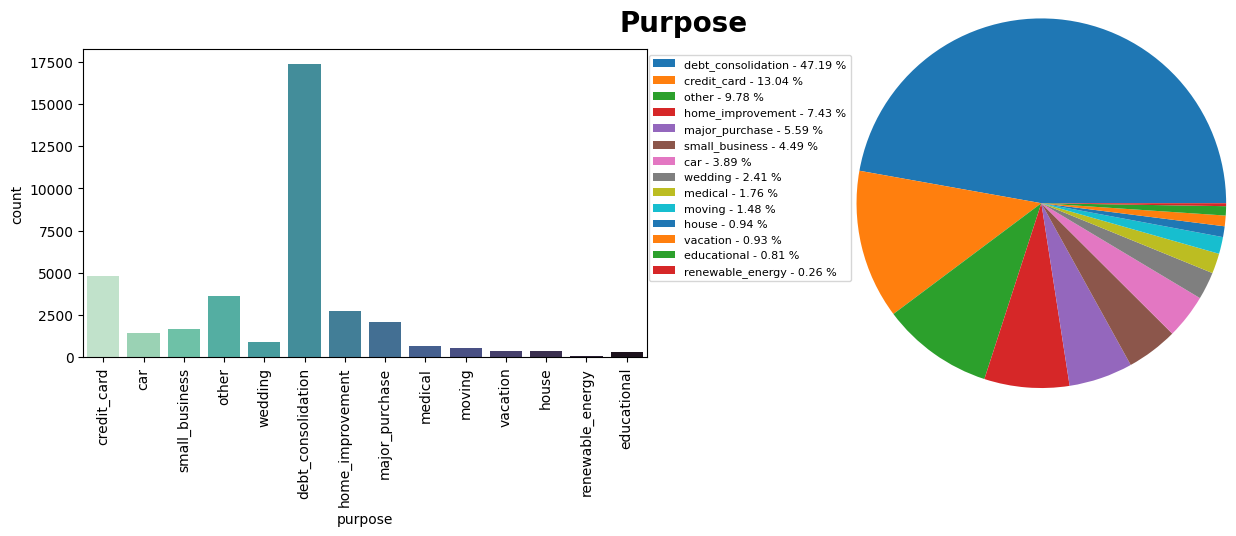

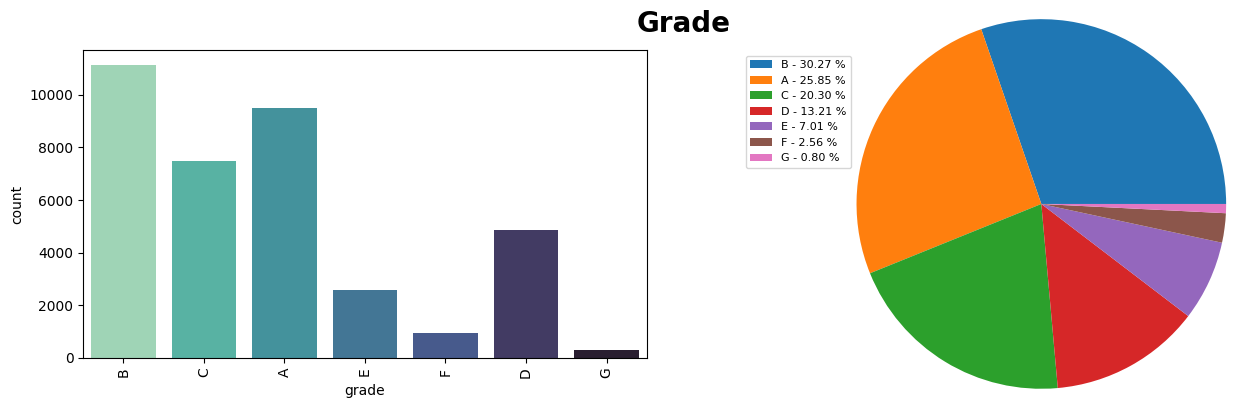

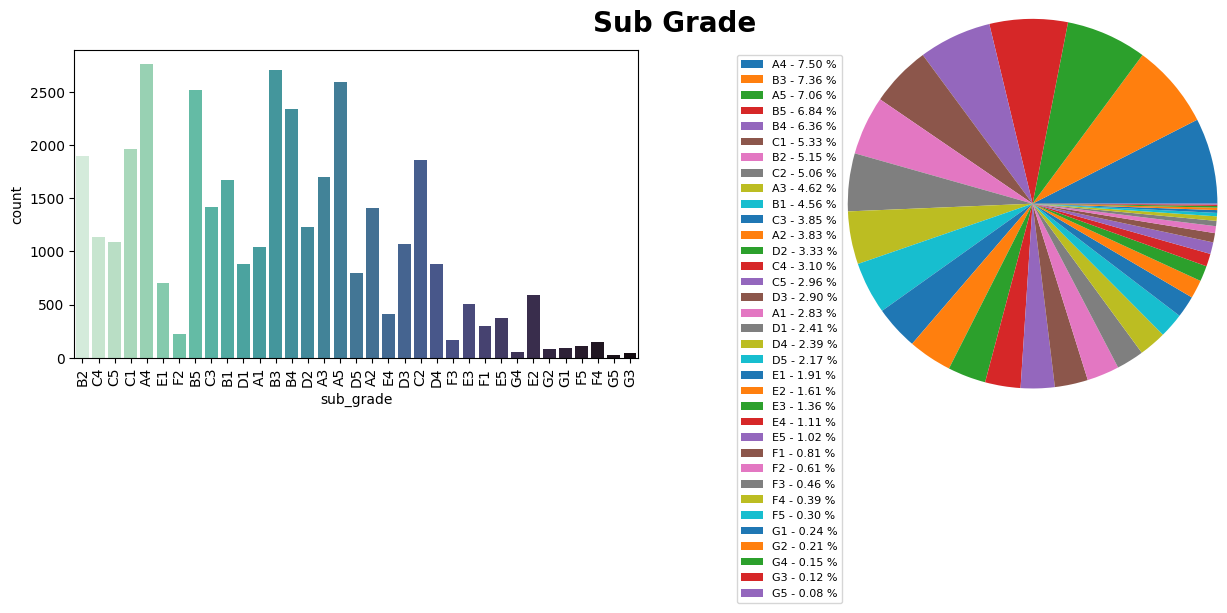

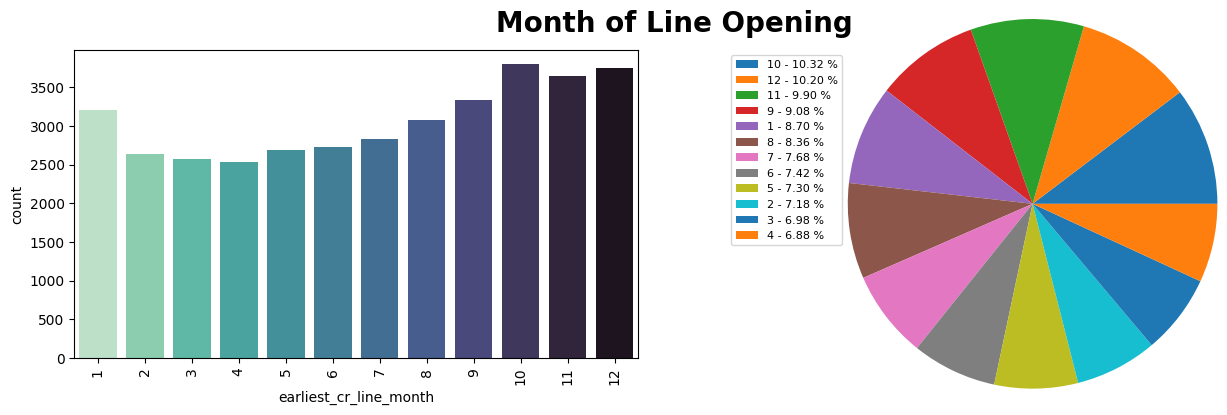

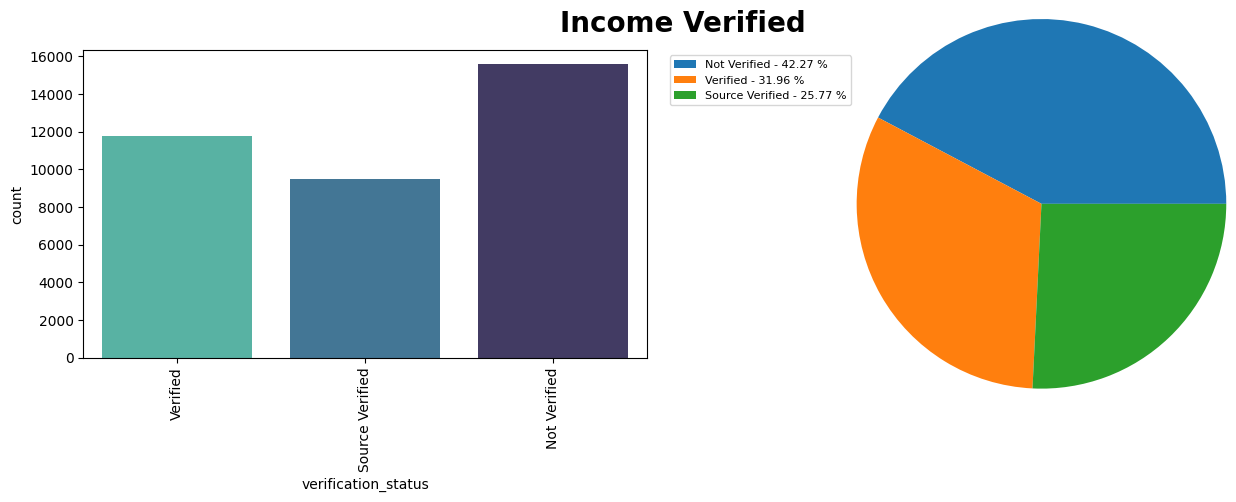

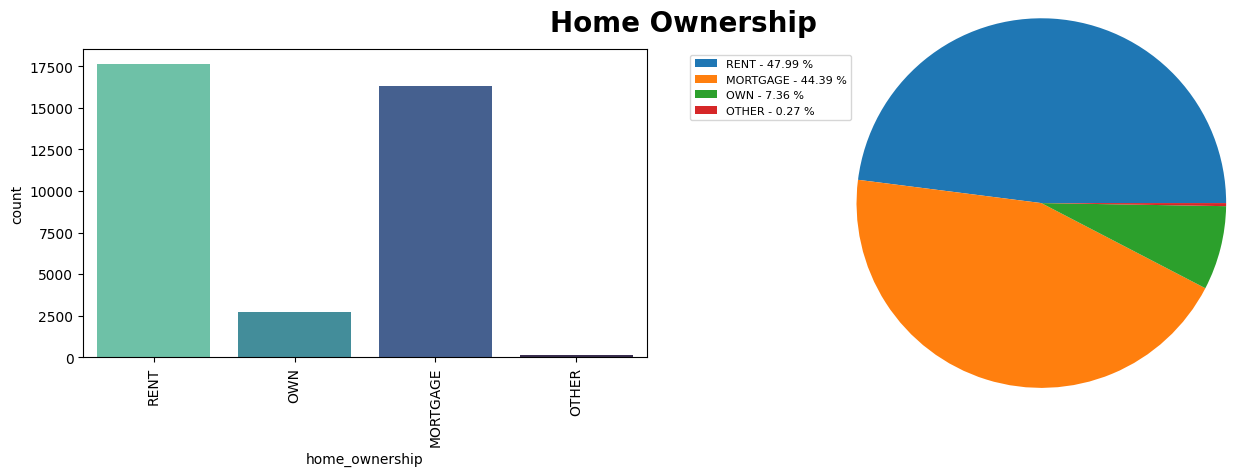

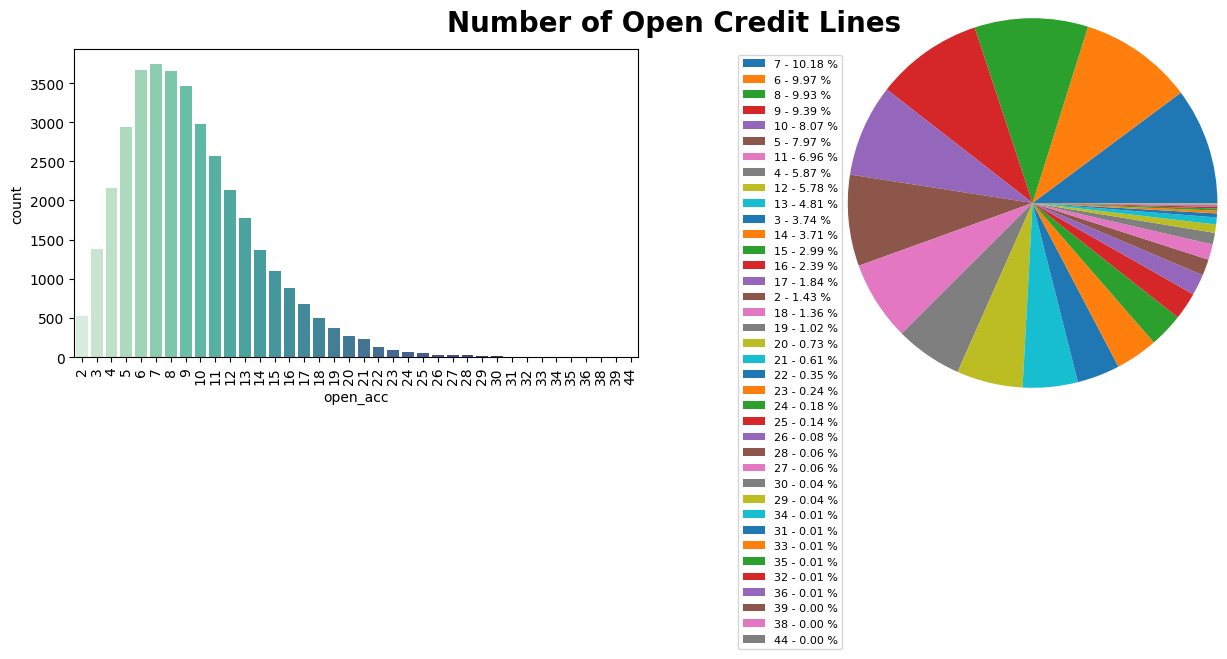

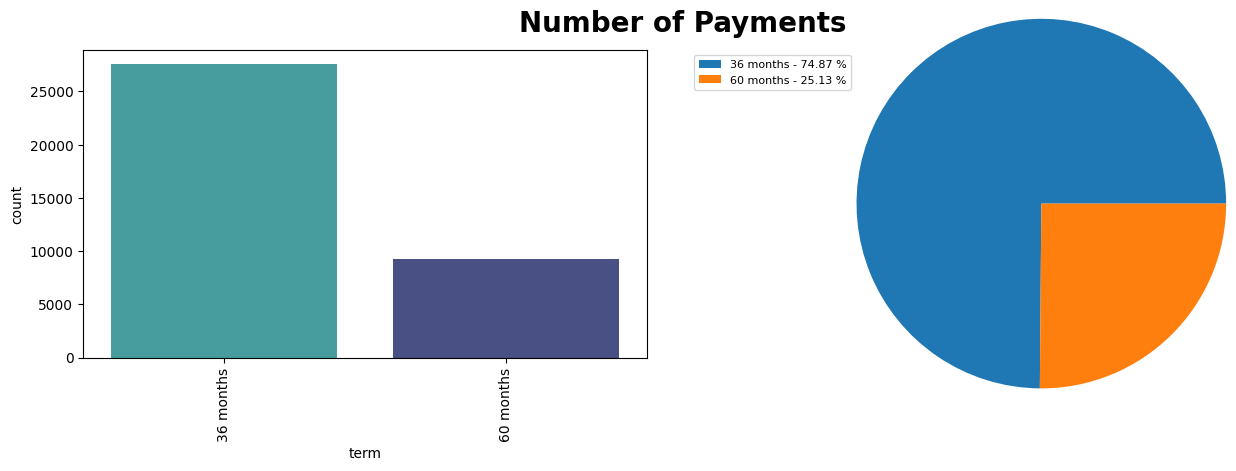

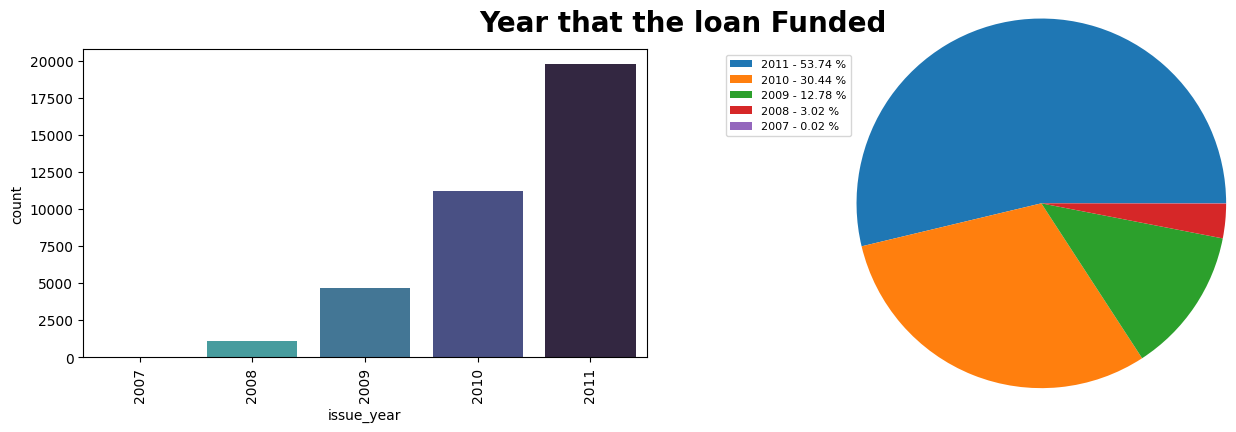

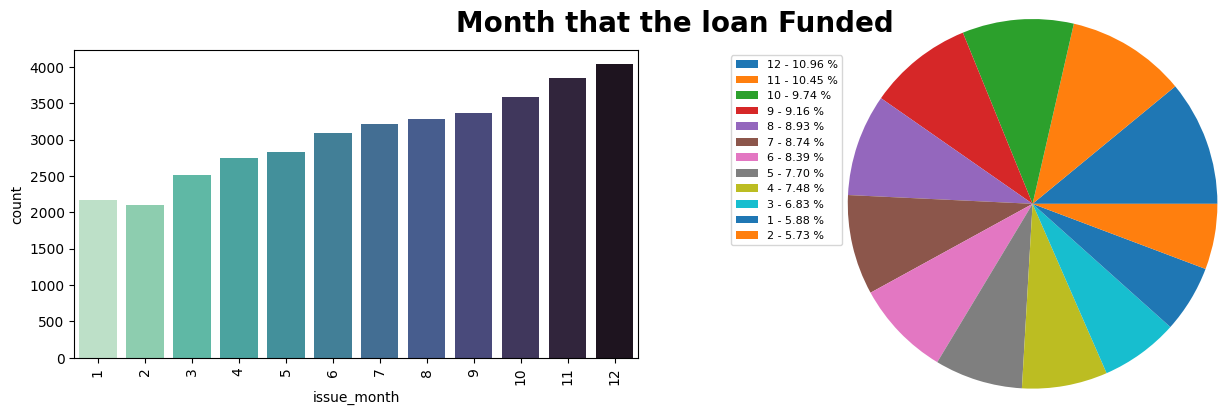

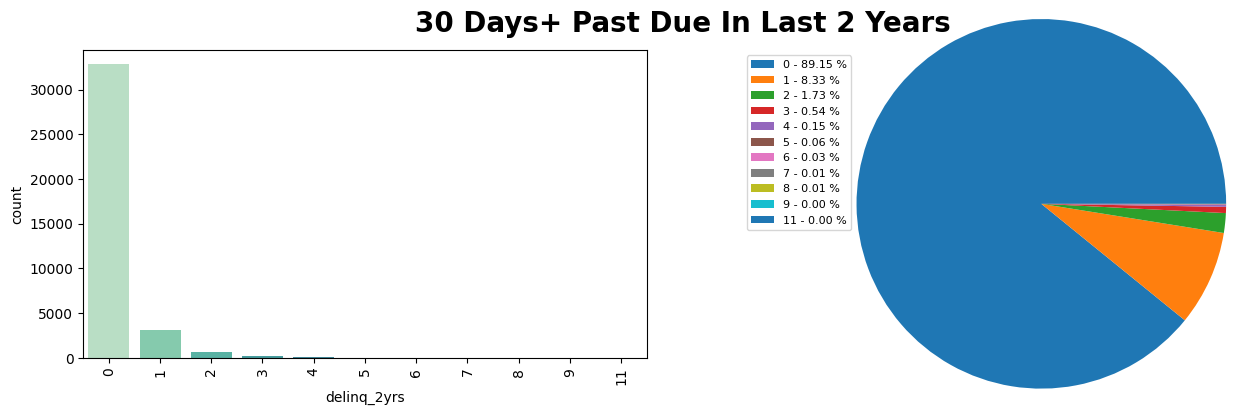

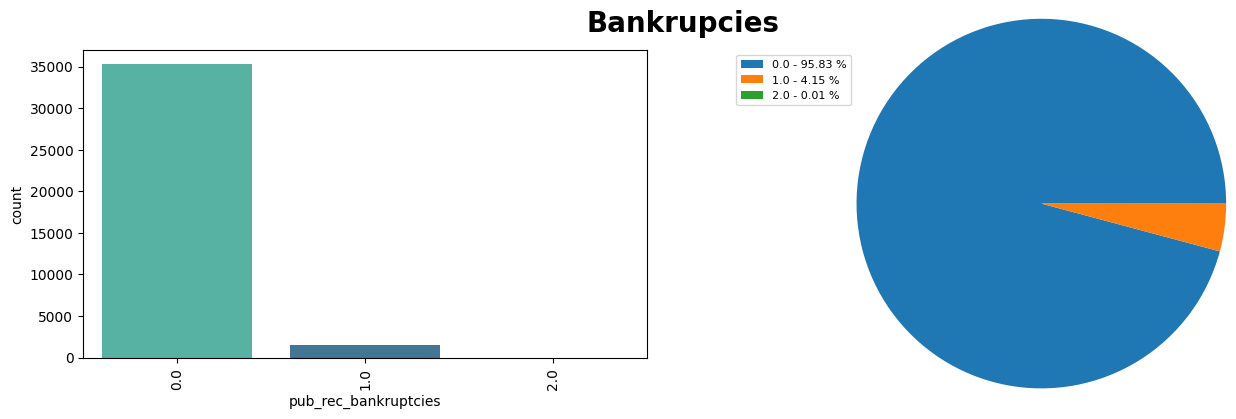

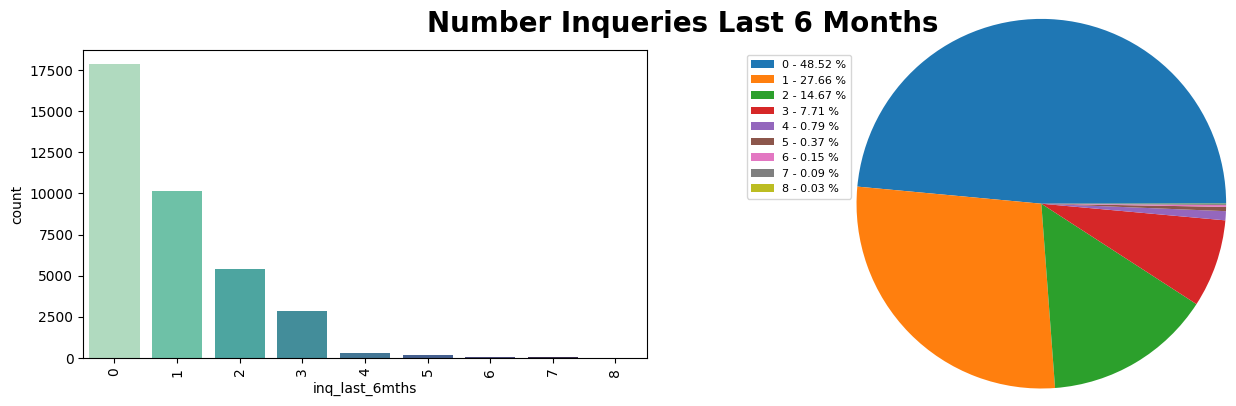

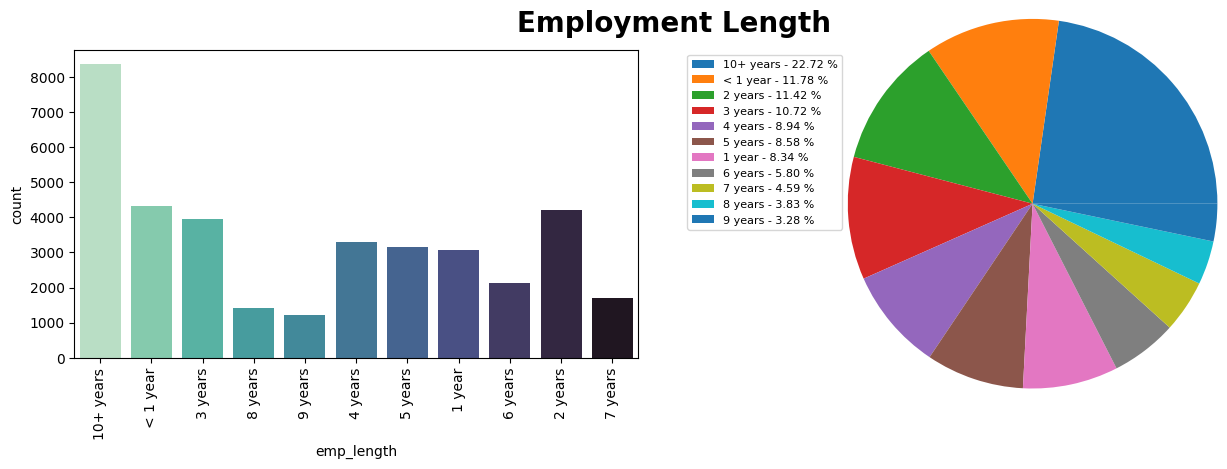

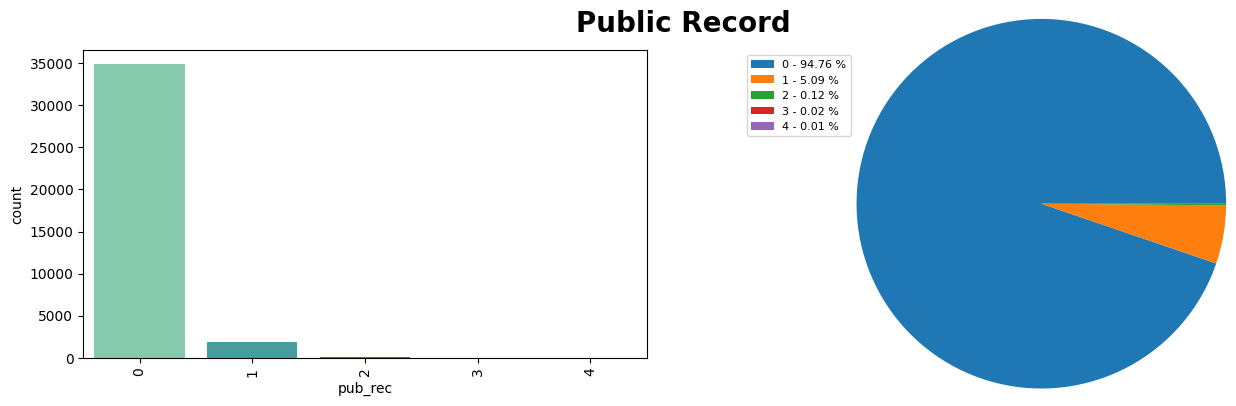

In [49]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
numericalCols = ["int_rate", "loan_amnt", "funded_amnt", "revol_util", "dti",
                 "installment", "last_pymnt_amnt", "total_pymnt", "annual_inc"]

categoricalCols = list(set(df.columns) - set(numericalCols+["member_id"]))

categoricalDict1 = {"Loan Status": "loan_status", "Purpose":"purpose",
                   "Grade":"grade", "Sub Grade": "sub_grade",
                    "Month of Line Opening":"earliest_cr_line_month",
                   "Income Verified": "verification_status", "Home Ownership":"home_ownership",
                   "Number of Open Credit Lines":"open_acc", "Number of Payments":"term",
                   "Year that the loan Funded":"issue_year",
                    "Month that the loan Funded":"issue_month",
                   "30 Days+ Past Due In Last 2 Years": "delinq_2yrs", "Bankrupcies": "pub_rec_bankruptcies",
                   "Number Inqueries Last 6 Months": "inq_last_6mths",
                   "Employment Length":"emp_length", "Public Record":"pub_rec"}

for k in categoricalDict1.keys():
  countPlots(df, categoricalDict1[k], k)


<IPython.core.display.Javascript object>

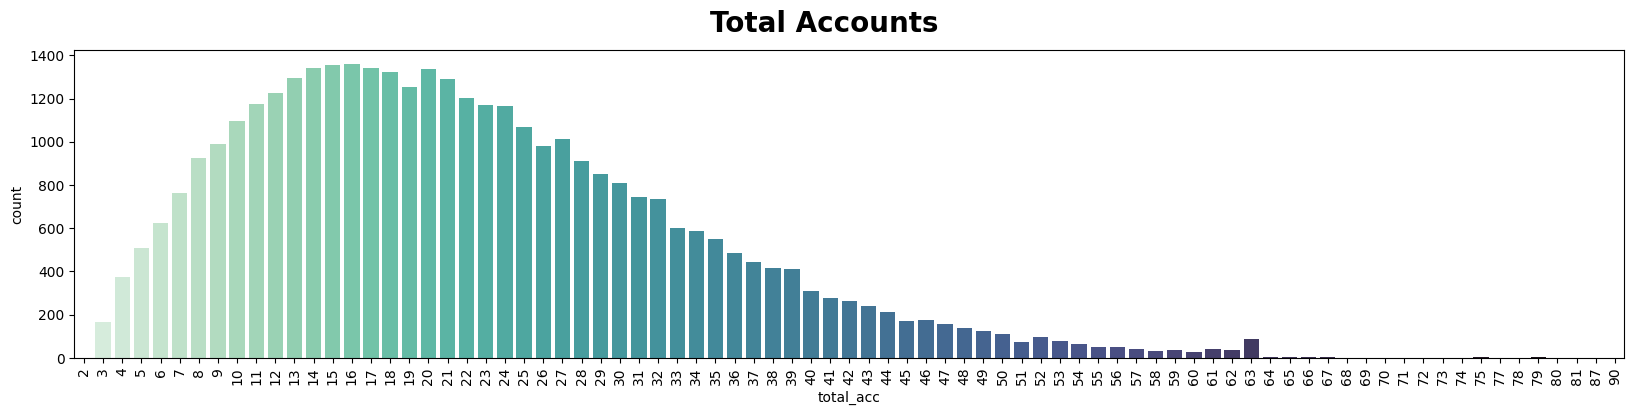

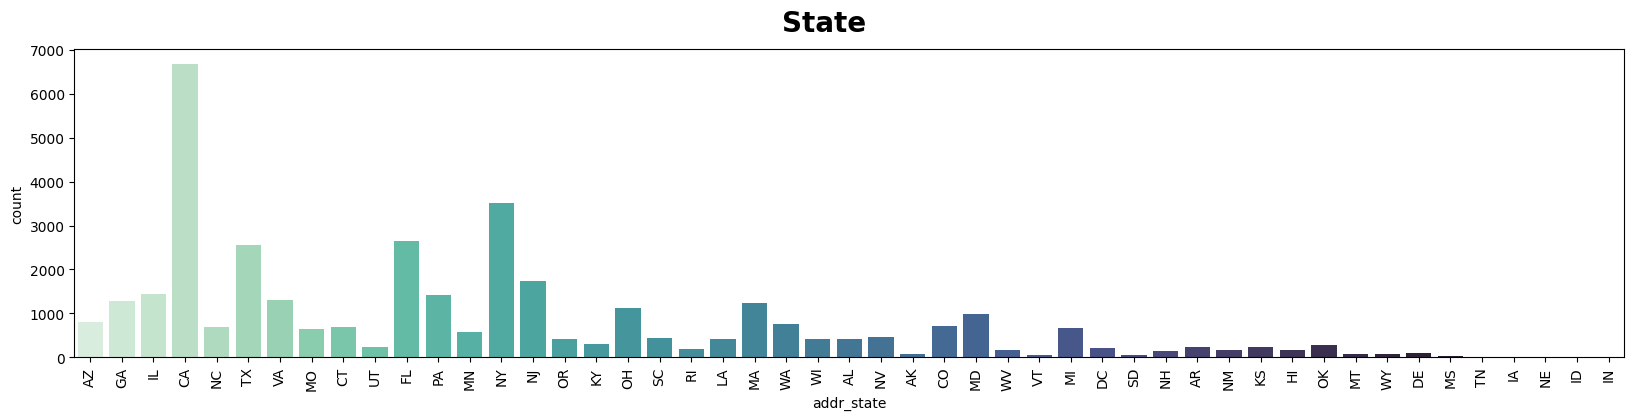

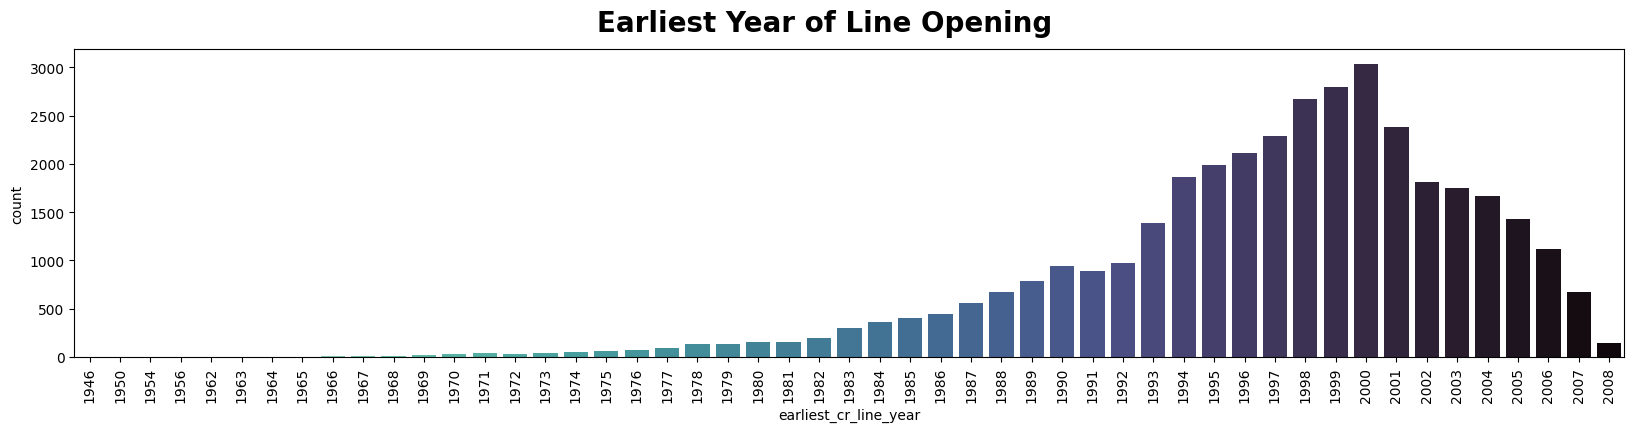

In [50]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
categoricalDict2 = {"Total Accounts": "total_acc", "State": "addr_state",
                    # "Zip Code":"zip_code",
                   "Earliest Year of Line Opening":"earliest_cr_line_year",}

for k in categoricalDict2.keys():
  barPlots(df, categoricalDict2[k], k)

The result indicates that:

1. number of fully paied loans are 6 times of defaulted ones. So most of the applicants re pay their deppths.

2. about 50% of the loans are for depth consolidation.

3. about 80% of the loans are in first three grades of (A,B, C) and bellow 1% of applicants apply fro grade G of the loans

4. subgrade 4 and 5 of grade A and 3, 4 and 5 of grade B are the 5 most popular loan subgroups.

5. More credit lines are opened in last three months of the year and in January. About 40% of credit lines are opened in those 4 months.

6. the income sourceof 47% of applicants didnot verified.

7. most applicants have 6 to 10 credit lines

8. and about 90% of them either rent their place or are paying a mortgage.

9. 75% of applicants have 36 months payment plan and only 25% have 60 months plan.

10. most of the loans are foundedin 2010 and 2011 and more than 30% of them are founded in last three month sof the year.

11. 90% of them never passed the due date. and 95% of them had no record of bankrupcies.

12. about 50% of them didnot have any inquery over last 6 months

13 most applicants were employed either o=more than 10 years or less than 2 year.

14. 95% of them had no public inquery.

15. Most applicants are from CA or NY.

16. Most applications are from 1998 to 2001

17. most applicants have between 10 to 22 accounts



# **Segmented Univariate Analysis**



I use Loan status column to ideentify defaulted candidates. Those that didnot pay off (charged off) their debt are considered as defaulted. So all the analysis forward will be done for Loan status variables.

### **Segmented Univariate for two categorical variables**:

In [51]:
def segment_barplot(data, x, col, title):
  plt.figure(figsize=(16,4))

  sns.countplot(x=x, hue=col, data=data)
  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.legend(loc='upper right',fontsize=10)
  plt.show()



1.   **Loan Status against categorical variables**




<IPython.core.display.Javascript object>

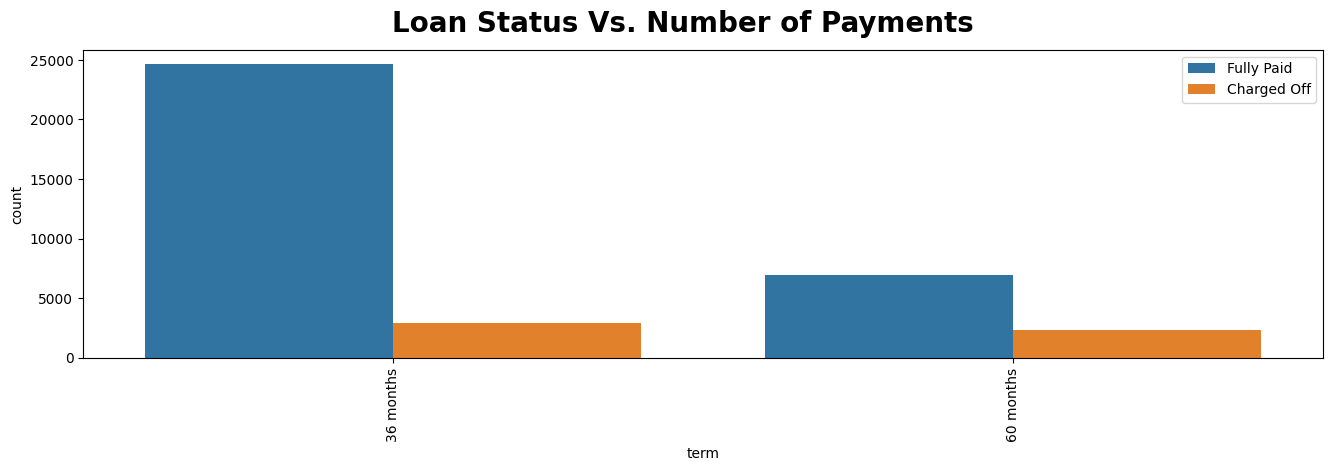

In [52]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

categoricalDict3 = {"Number of Payments":"term"}
for k in categoricalDict3.keys():
  segment_barplot(df, categoricalDict3[k], "loan_status", f"Loan Status Vs. {k}")


Results indicate that:

While the number of charged off applicants in both 36 and 60 months term are very close, Most of the fully paid browers applied for 36 months loans. and the difference between these two groups for fully paid browser is about 20000. Only 5000 of fully paid customers applied for 6 months plan. Indicating that the 36 month plans have less risk since most applicants that apply for that plan paid their debt. So one of the risk factor is actually the length of the plan.

### **Segmented Univariate analysis for a categorical variable against continues variable**:

In [53]:
def segment_boxPlot(data, x, y, title):

  plt.figure(figsize=(16,4))
  sns.boxplot(x=x, y=y, data=data)
  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.show()

  levels = list(data[x].unique())

  if len(levels)==4:
    levels.remove("Not Known")
    y1 = data.loc[data[x]==levels[0], y]
    y2 = data.loc[data[x]==levels[1], y]
    y3 = data.loc[data[x]==levels[2], y]

    normality_g1 = stats.shapiro(y1).pvalue
    normality_g2 = stats.shapiro(y2).pvalue
    normality_g3 = stats.shapiro(y3).pvalue

    if normality_g1 < 0.05 or normality_g2 < 0.05 or normality_g3 < 0.05:
      print(f"Data is not normaly distributed. So we use Kruskal-Wallis H-test to test equality between two categories {levels[0]}, {levels[1]} and {levels[2]}.")
      sigVal = stats.kruskal(y1, y2, y3).pvalue

      if sigVal < 0.05:
        print(f"P-value = {sigVal} and is statistically significant. So we can reject the Null hypothesis and\nconclude that the mean for {levels[0]}, {levels[1]} and {levels[2]} population is not equal.")
      else:
        print(f"P-value = {sigVal} and is not statistically significant. So we can not reject the Null hypothesis.\nMeaning that there is a chance the mean for {levels[0]} population is equal to the mean for {levels[1]} and {levels[2]} population.")

    else:
      print("Data is normaly distributed and we use ANOVA to test equality between two categories")
      sigVal = stats.f_oneway(y1, y2, y3).pvalue

      if sigVal < 0.05:
        print(f"P-value = {sigVal} and is statistically significant. So we can reject the Null hypothesis and\nconclude that the mean for {levels[0]}, {levels[1]} and {levels[2]} population is not equal.")
      else:
        print(f"P-value = {sigVal} and is not statistically significant. So we can not reject the Null hypothesis.\nMeaning that there is a chance the mean for {levels[0]} population is equal to the mean for {levels[1]} and {levels[2]} population.")

  elif len(levels)==2:
    y1 = data.loc[data[x]==levels[0], y]
    y2 = data.loc[data[x]==levels[1], y]

    normality_g1 = stats.shapiro(y1).pvalue
    normality_g2 = stats.shapiro(y2).pvalue

    if normality_g1 < 0.05 or normality_g2 < 0.05:
      print(f"Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories {levels[0]} and {levels[1]}.")
      sigVal = stats.ks_2samp(y1, y2, method="exact")[1]

      if sigVal < 0.05:
        print(f"P-value = {sigVal} and is statistically significant. So we can reject the Null hypothesis and\nconclude that the mean for {levels[0]} population is not equal to the mean for {levels[1]} population.")
      else:
        print(f"P-value = {sigVal} and is not statistically significant. So we can not reject the Null hypothesis.\nMeaning that there is a chance the mean for {levels[0]} population is equal to the mean for {levels[1]} population.")

    else:
      print("Data is normaly distributed and we use t-test to test equality between two categories")
      sigVal = stats.ttest_ind(y1, y2, equal_var=False).pvalue

      if sigVal < 0.05:
        print(f"P-value = {sigVal} and is statistically significant. So we can reject the Null hypothesis and\nconclude that the mean for {levels[0]} population is not equal to the mean for {levels[1]} population.")
      else:
        print(f"P-value = {sigVal} and is not statistically significant. So we can not reject the Null hypothesis.\nMeaning that there is a chance the mean for {levels[0]} population is equal to the mean for {levels[1]} population.")



1.   **Loan Status Against All the Continues Variables we have**:

<IPython.core.display.Javascript object>

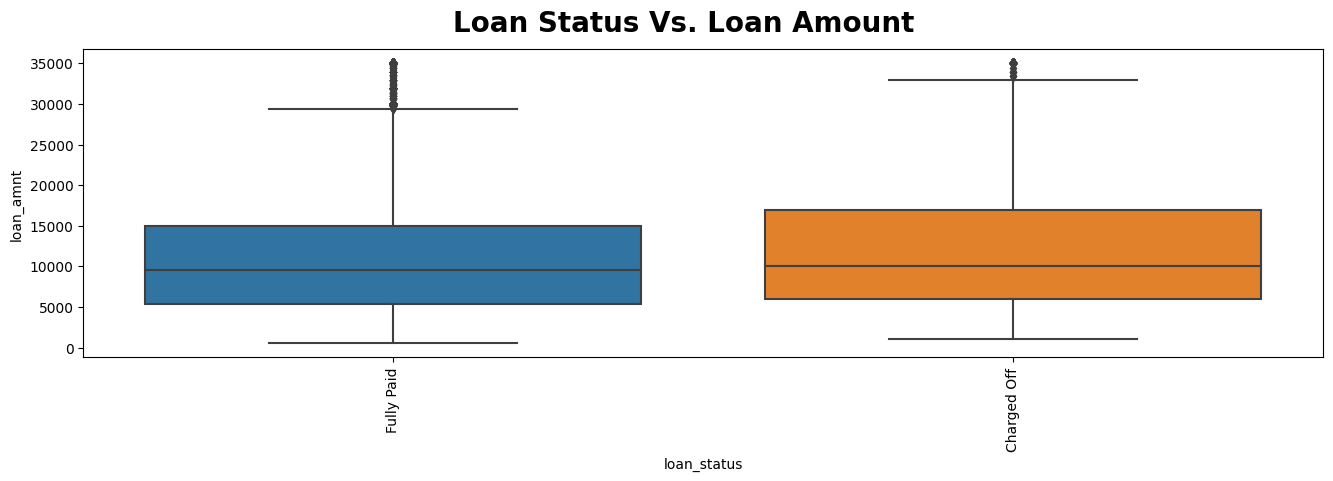

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Fully Paid and Charged Off.
P-value = 4.138424523062245e-24 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Fully Paid population is not equal to the mean for Charged Off population.


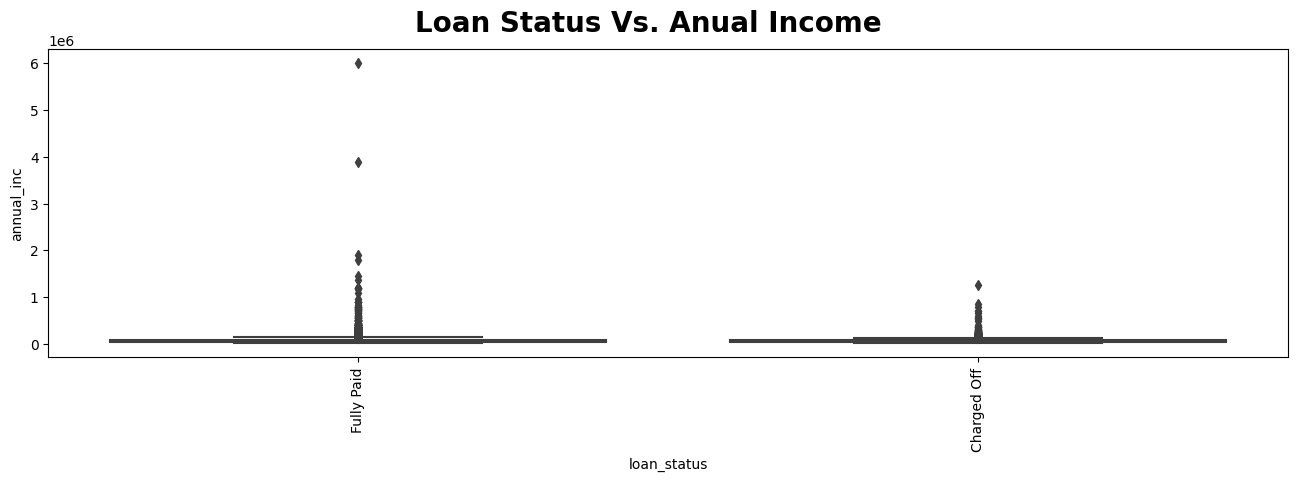

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Fully Paid and Charged Off.
P-value = 3.497219118053179e-30 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Fully Paid population is not equal to the mean for Charged Off population.


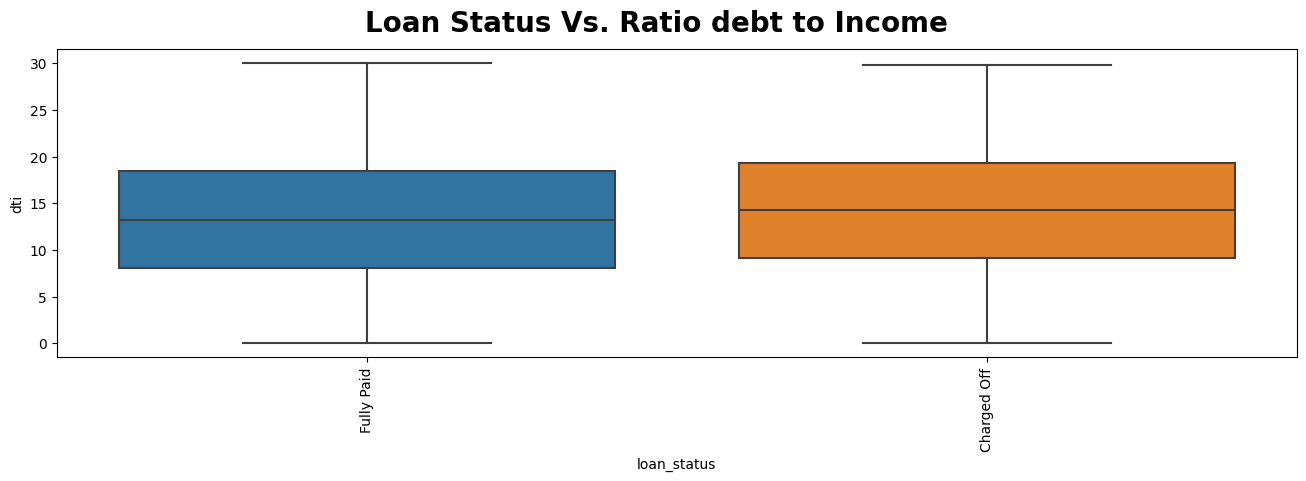

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Fully Paid and Charged Off.
P-value = 1.5795730262251468e-16 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Fully Paid population is not equal to the mean for Charged Off population.


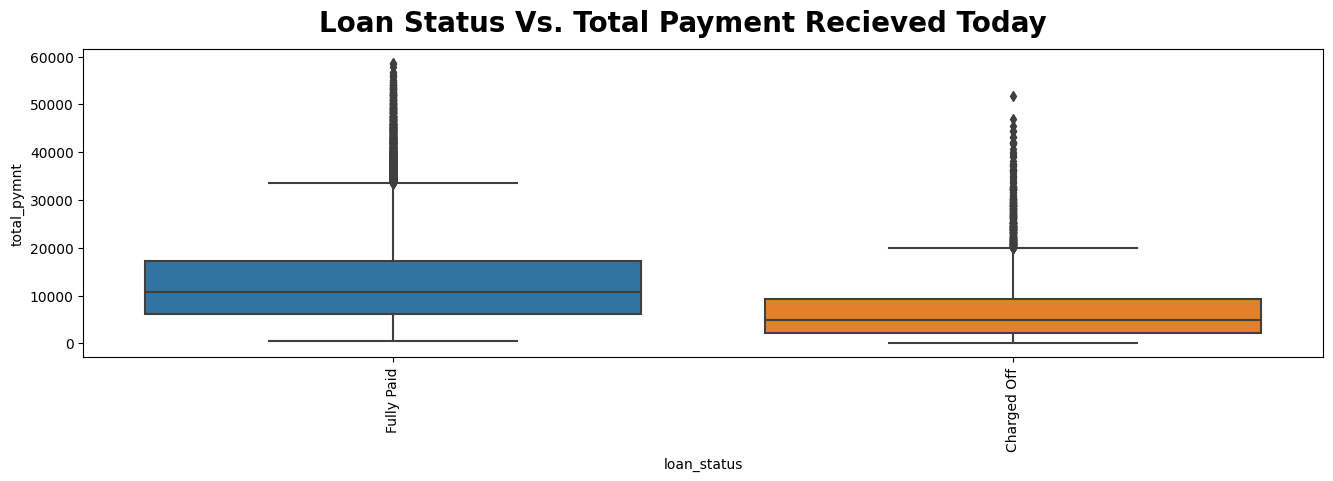

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Fully Paid and Charged Off.
P-value = 2.8483e-320 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Fully Paid population is not equal to the mean for Charged Off population.


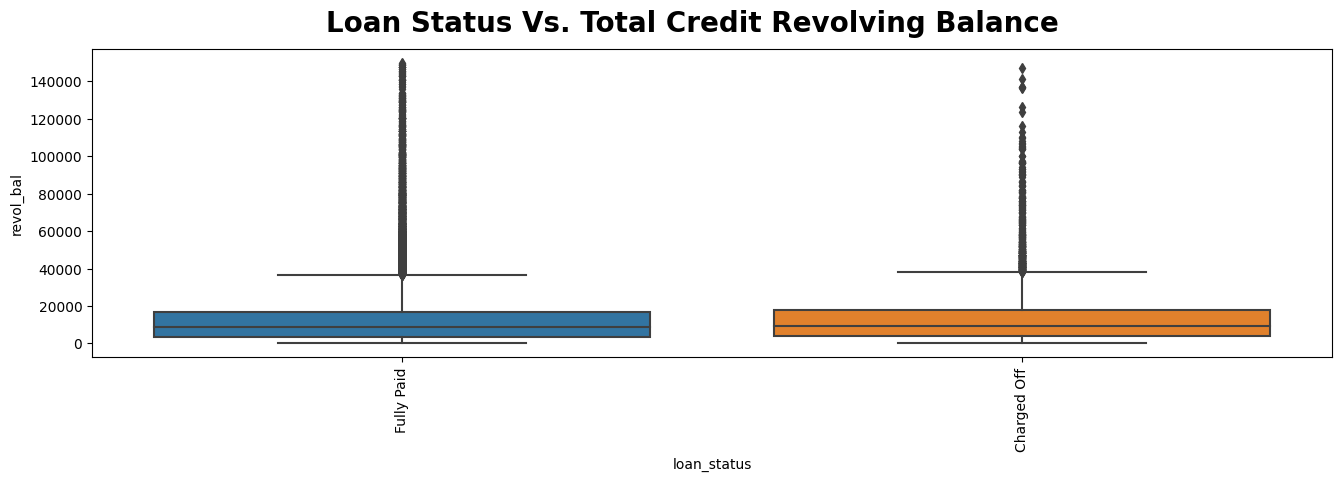

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Fully Paid and Charged Off.
P-value = 0.00017668064610990177 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Fully Paid population is not equal to the mean for Charged Off population.


In [54]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

# since Outlier removed version was more clear that version been used

continuesDict = {"Loan Amount": "loan_amnt", "Anual Income":"annual_inc",
                 "Ratio debt to Income":"dti","Total Payment Recieved Today": "total_pymnt",
                    "Total Credit Revolving Balance": "revol_bal"}

for k in continuesDict.keys():
  segment_boxPlot(df, "loan_status", continuesDict[k], f"Loan Status Vs. {k}")

### Remove outliers to improve visualisation

<IPython.core.display.Javascript object>

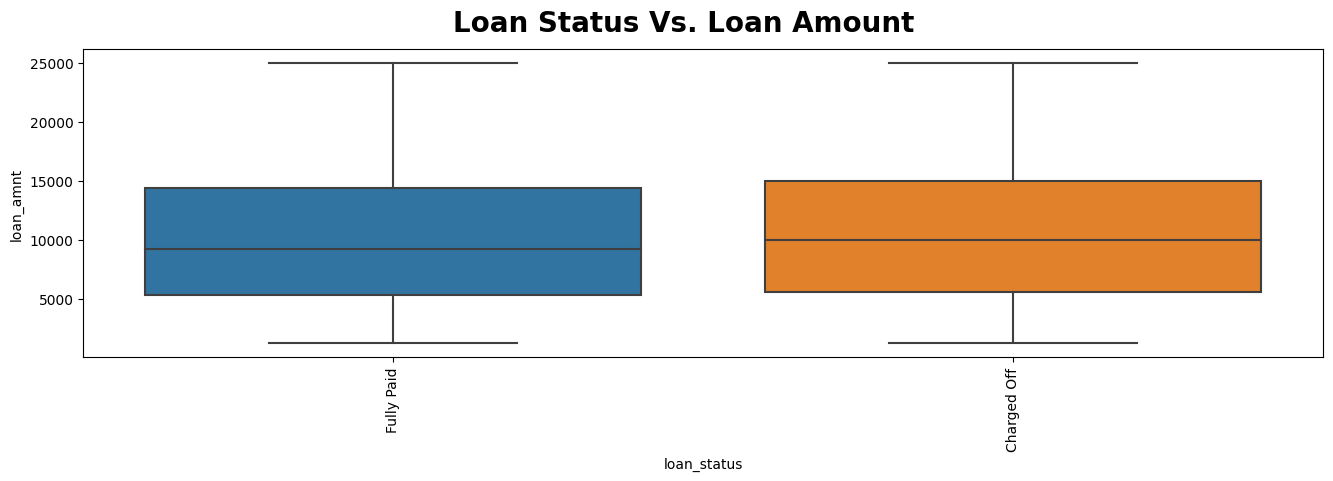

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Fully Paid and Charged Off.
P-value = 2.42943645768695e-14 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Fully Paid population is not equal to the mean for Charged Off population.


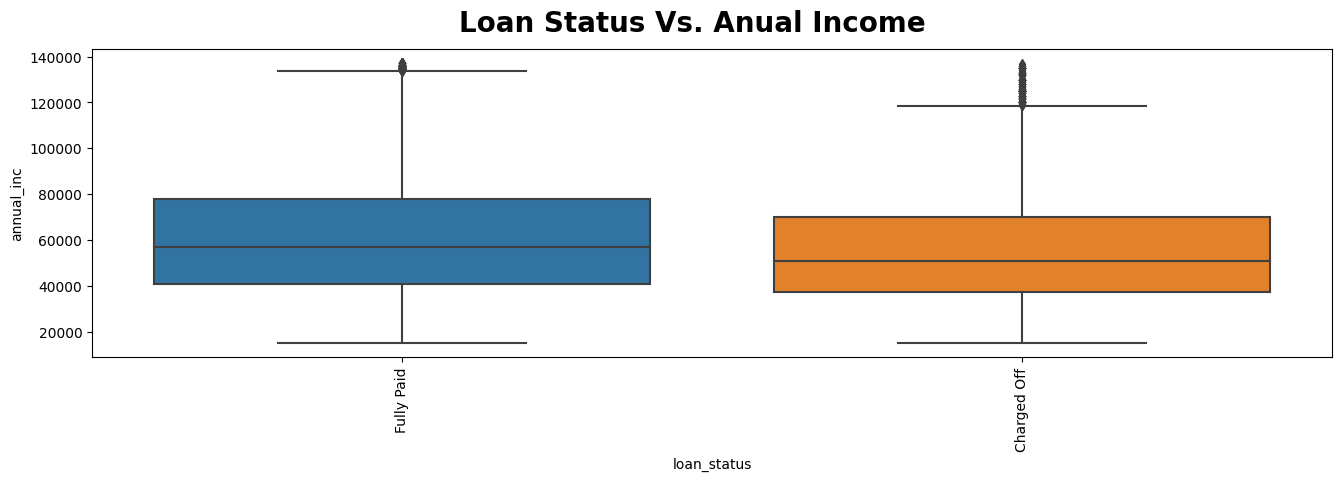

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Fully Paid and Charged Off.
P-value = 5.240624683138946e-31 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Fully Paid population is not equal to the mean for Charged Off population.


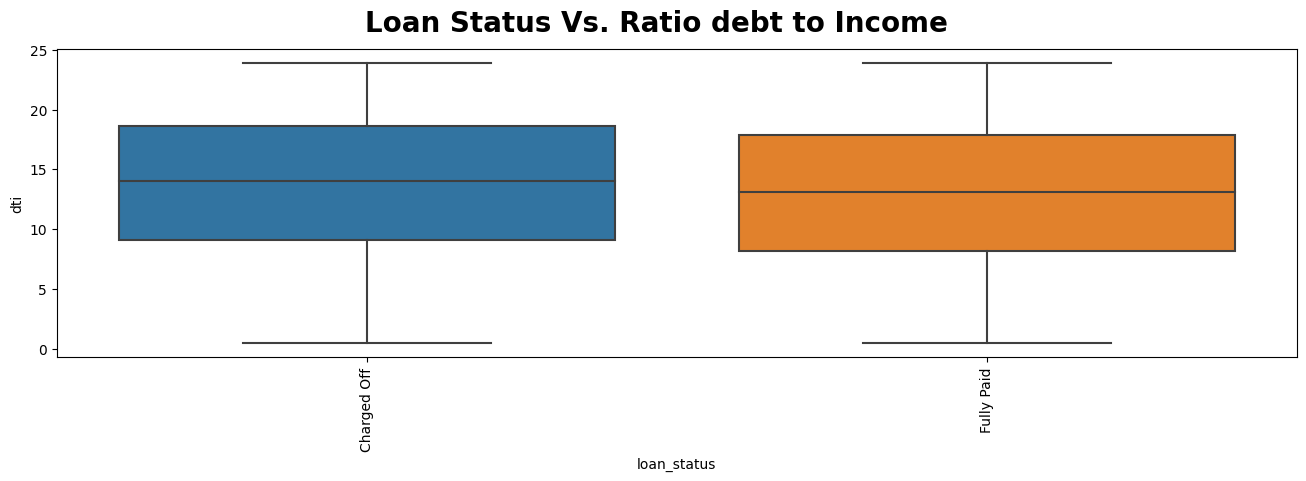

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Charged Off and Fully Paid.
P-value = 1.0999313623964988e-11 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Charged Off population is not equal to the mean for Fully Paid population.


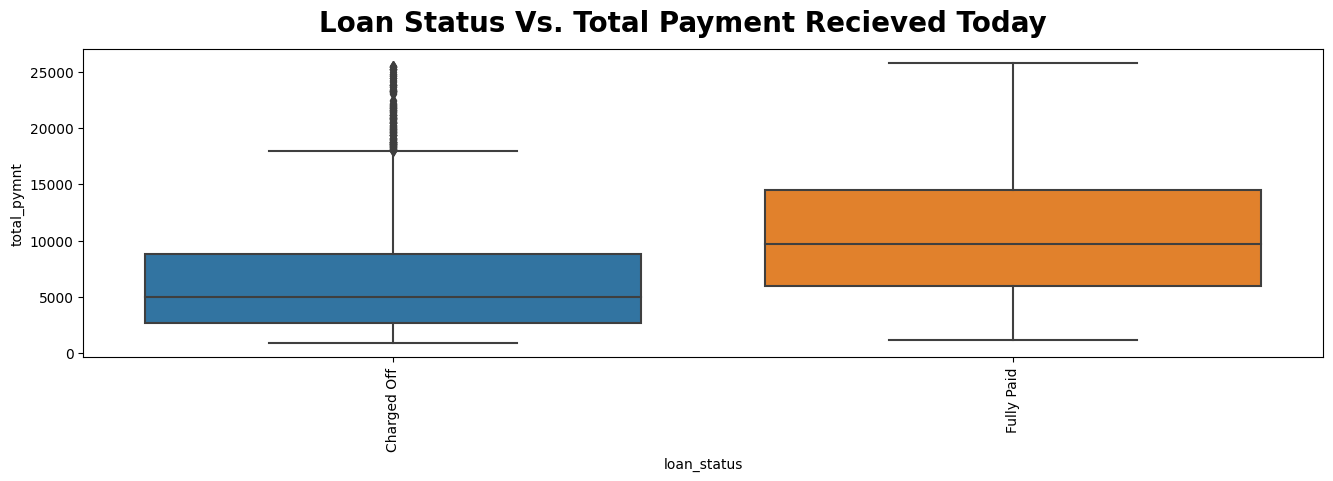

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Charged Off and Fully Paid.
P-value = 2.8404e-320 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Charged Off population is not equal to the mean for Fully Paid population.


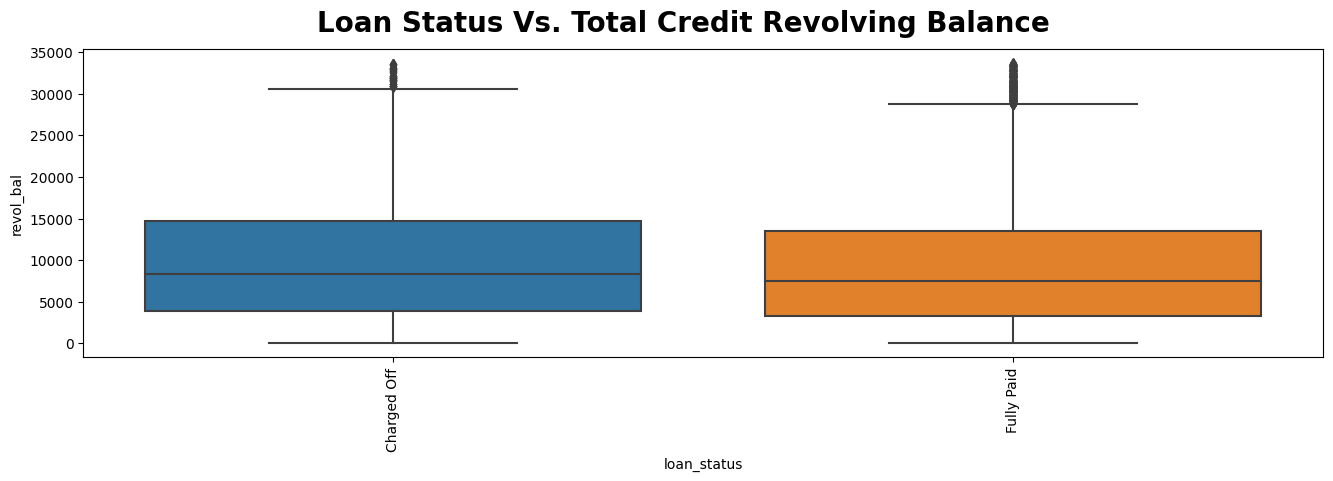

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Charged Off and Fully Paid.
P-value = 2.99640544092049e-07 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Charged Off population is not equal to the mean for Fully Paid population.


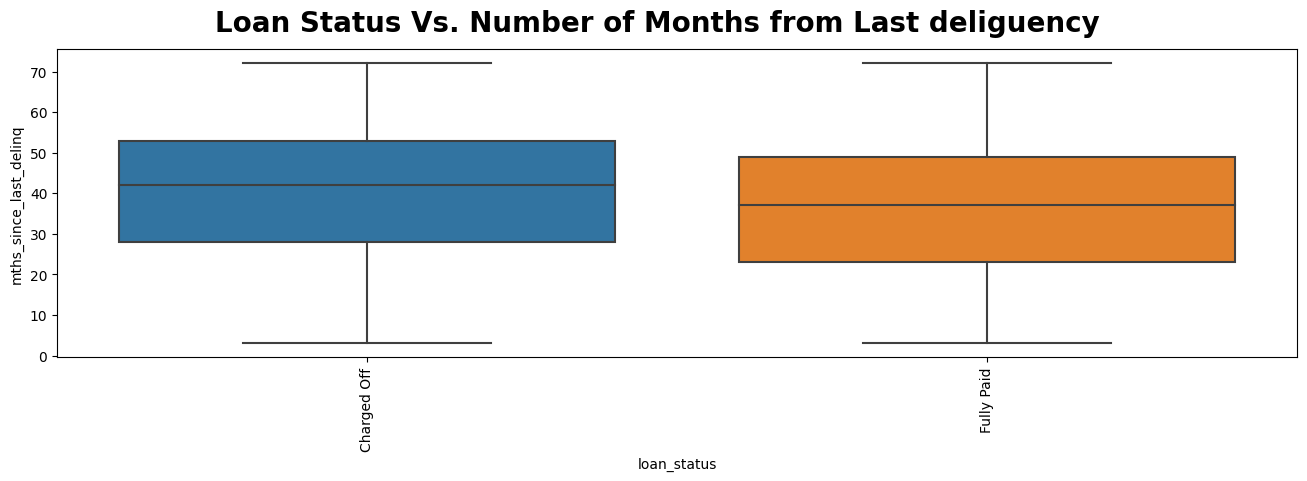

Data is not normaly distributed. So we use Kolmogorov-Smirnov test to test equality between two categories Charged Off and Fully Paid.
P-value = 1.1342734227049359e-42 and is statistically significant. So we can reject the Null hypothesis and
conclude that the mean for Charged Off population is not equal to the mean for Fully Paid population.


In [55]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))

continuesDict = {"Loan Amount": "loan_amnt", "Anual Income":"annual_inc",
                 "Ratio debt to Income":"dti", "Total Payment Recieved Today": "total_pymnt",
                    "Total Credit Revolving Balance": "revol_bal",
                  "Number of Months from Last deliguency":"mths_since_last_delinq"}

for k in continuesDict.keys():
  outlierRemoved = removeOutlier(df[continuesDict[k]], lowT=0.01, upT=0.95)
  df = df.loc[df[continuesDict[k]].isin(outlierRemoved),]
  segment_boxPlot(df, "loan_status", continuesDict[k], f"Loan Status Vs. {k}")

1. The results indicates that applicants that fully paid off their loans have significantly lower amount of loan in comparison to defaulted candidates.

3. After removing outliers we have observed that the annual income of individuals who paid their debt is significantly higher than those that didn’t with the p-value of 5.5 e-19.

4. Ratio of debt to income also is showing to be significantly different between defaulted and fully paid candidates.

5. Charged off group have significantly higher total credit revolving balance than fully paid group (p-value=0.04)

6. Also the number of months passed the  delinquency is significantly higher in charged of candidates.

7. Last total amount of payment received from fully paid group has a median higher than 75 percentile of payment received from charged off group. the p-value for it very close to zero as well.


Over all this result indicates that these 7 factors; Loan amount, Annual income, ratio debt to income and total payment to today , total credit revolving balance and number of months passed  delinquency are all can be risk factors for default accounts.

# **Bivariate Analysis**

## **Bivariate Analysis between Continues Variables**

### **Correlation Matrix**: is a Bivariate Analysis used to measure the closeness between continues variables. When two continues variables are highly corelated (|correlation| >= 0.75) That means those features are dependent to each other. So a change in one of them will cause the change in the other one. Meaning that one feature can be explained by the other one. These variables are considered data driven matrics. When we see very high correlation between two features we can use the ratio of these features instead of actual values.

<IPython.core.display.Javascript object>

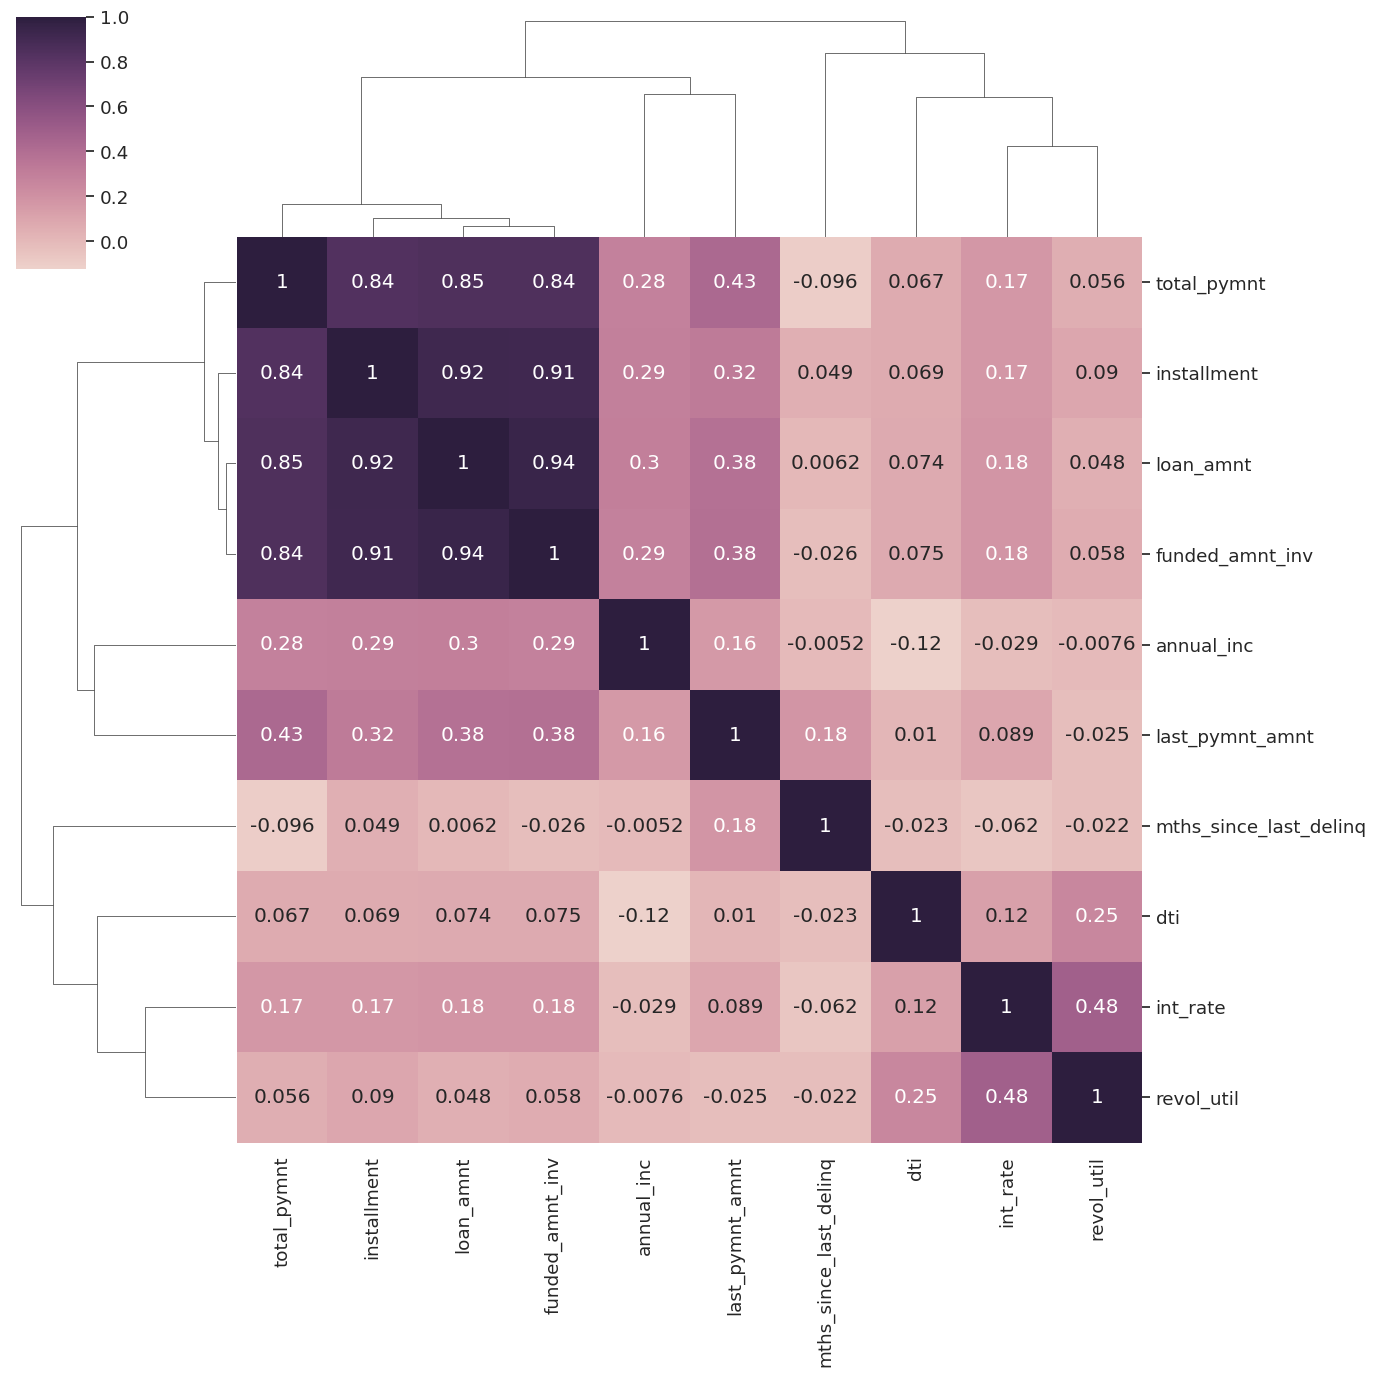

In [56]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
numericalCols = ["int_rate", "loan_amnt", "revol_util", "dti", "annual_inc",
                 "funded_amnt_inv", "installment", "last_pymnt_amnt",
                 "total_pymnt", "mths_since_last_delinq"]

continuesDict = {"Loan Amount": "loan_amnt", "Anual Income":"annual_inc",
                    "Funded Amount Investment":"funded_amnt_inv",
                    "Installment": "installment", "Total Payment Recieved Today": "total_pymnt",
                    "Total Credit Revolving Balance": "revol_bal", "Ratio debt to Income":"dti",
                    "Number of Months from Last deliguency":"mths_since_last_delinq"}

corrMatrix = df[numericalCols].corr()
sns.set(font_scale=1.2)
sns.clustermap(corrMatrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), figsize=(14, 14))
plt.show()


Base on the correlation heatmap "total_pymnt_inv", "funded_amnt_inv", "installment", "funded_amnt", "total_pymnt" and "loan_amnt" have correlation above 0.75. variables with correlartion >0.75 considered as dependent variables and we can use their ratio instead of actual value. So I will generate three new variables of: founded_prc, pymnt_prc and loan_prc.

In [57]:
# 1. first I need to check if there is a zero value in denominator

print((df["funded_amnt_inv"]==0).sum(axis=0))

print((df["loan_amnt"]==0).sum(axis=0))

# 2. Founded investment variable has 63 zero values and the range values in
# this column are (0, 25000). As this variable would be used as denumenator
# I added 1 to all the values in this column to avoid inf values and use it as denumenator

df["funded_amnt_inv"] = df["funded_amnt_inv"]+1

# 3. make the ratio columns

df["installment_prc"] = (df["installment"]/df["loan_amnt"])*100

df["pymnt_prc"] = (df["total_pymnt"]/df["funded_amnt_inv"])*100

# 3. drop the original columns

df.drop(["funded_amnt_inv",
         "installment", "loan_amnt",
         "total_pymnt"],
        axis=1, inplace=True)


63
0


### **Redo the Correlation heatmap after removing the highly correlated features**

<IPython.core.display.Javascript object>

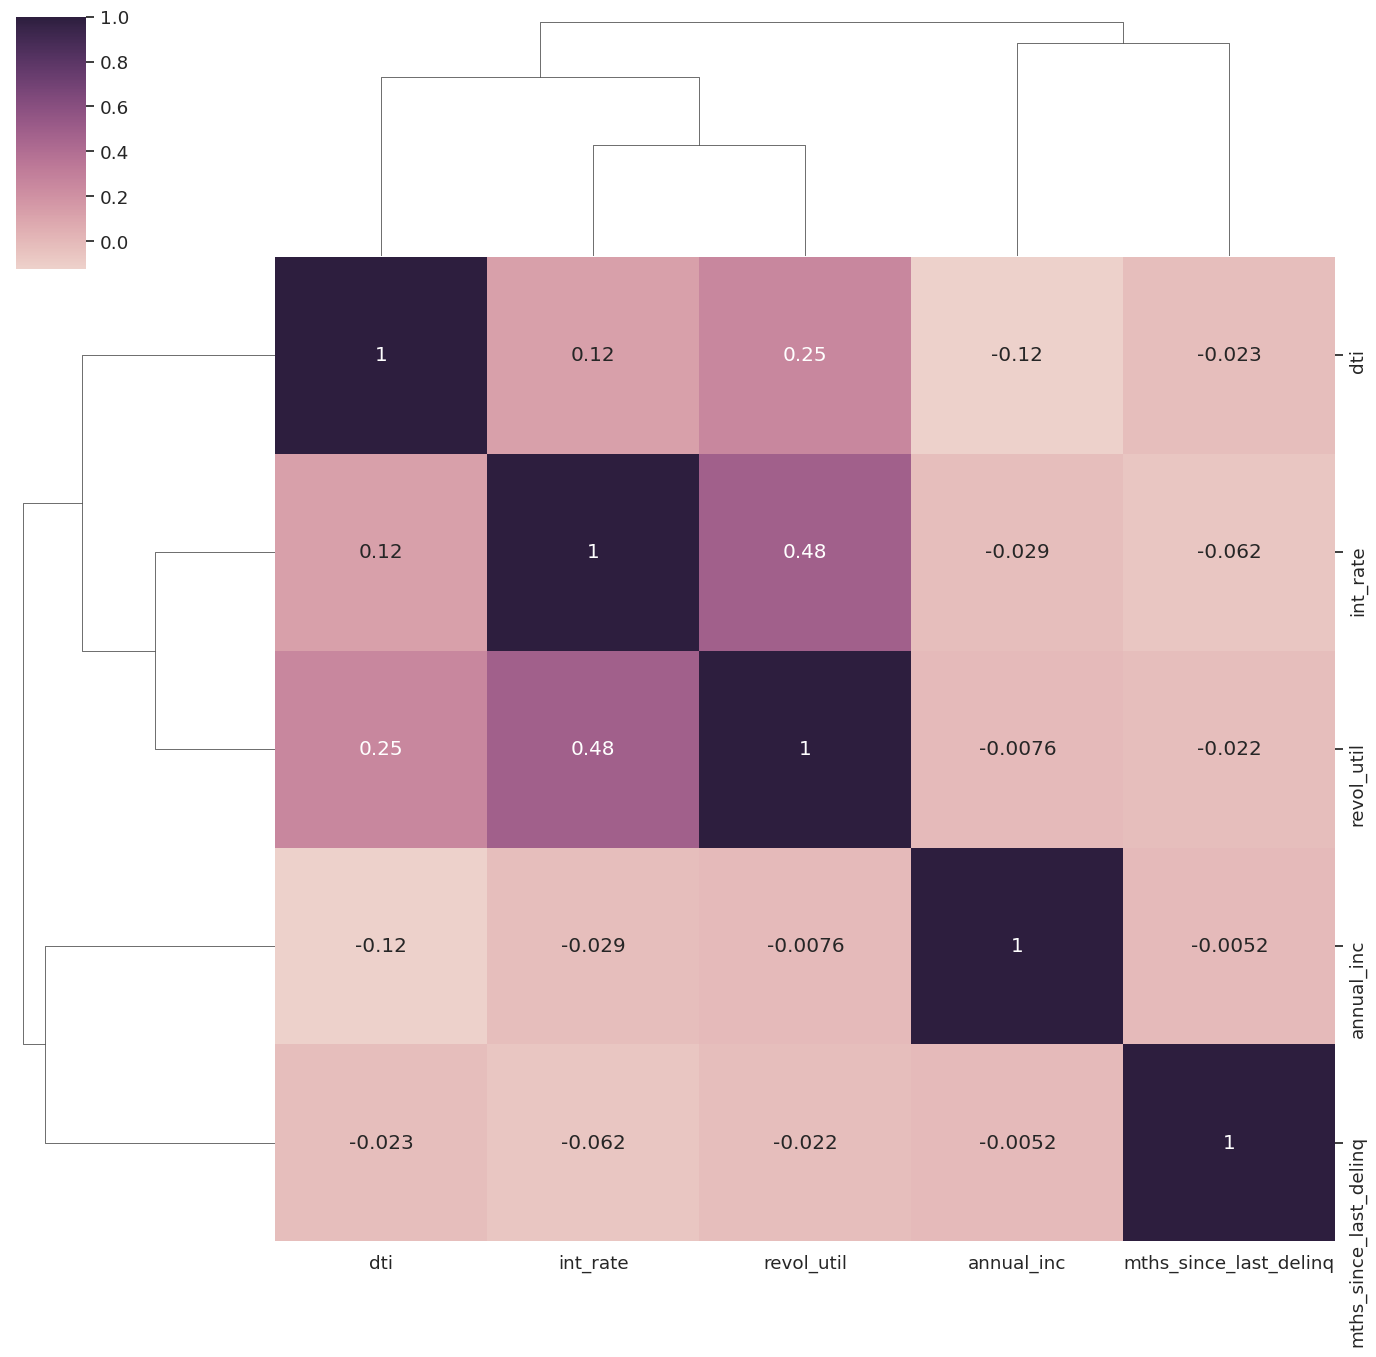

In [58]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
continuesDict = {"Interest Rate":"int_rate", "Percentage Installment of Loan per Mount": "installment_prc",
                    "Anual Income":"annual_inc",  "Percentage paied from founded Loan": "pymnt_prc",
                    "Total Credit Revolving Balance": "revol_bal", "Ratio debt to Income":"dti",
                    "Number of Months from Last deliguency":"mths_since_last_delinq"}

numericalCols = ["int_rate", "revol_util", "dti", "annual_inc", "mths_since_last_delinq"]

corrMatrix = df[numericalCols].corr()
sns.set(font_scale=1.2)
sns.clustermap(corrMatrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), figsize=(14, 14))
plt.show()

## **Bivariate Analysis for two categorical variables**

In [59]:
def bivar_barplot(data, x, col, title):
  plt.figure(figsize=(16,4))
  newdf = data[[x, col]].groupby([x, col], as_index=False).value_counts()
  newdf[f'proportion {col}'] = newdf[["count", col]].groupby([col]).transform(lambda x: x/x.sum())

  sns.barplot(x=x, y=f'proportion {col}', hue=col, data=newdf, estimator=np.median)

  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.legend(loc='upper right',fontsize=10)
  plt.show()

1.   **Loan Status Against All the Categorical Variables we have**:

<IPython.core.display.Javascript object>

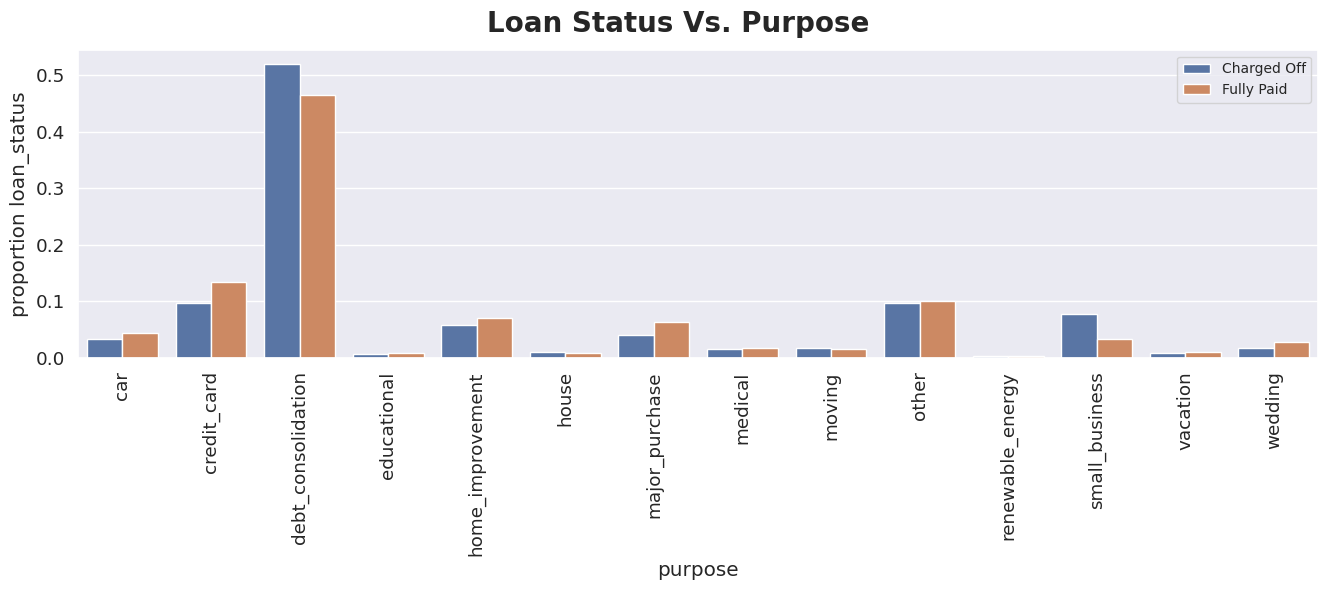

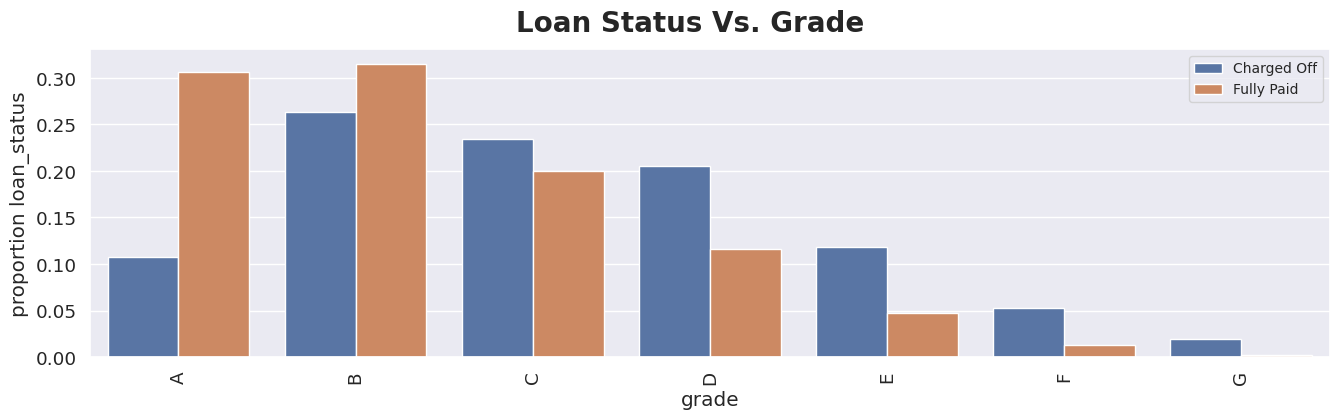

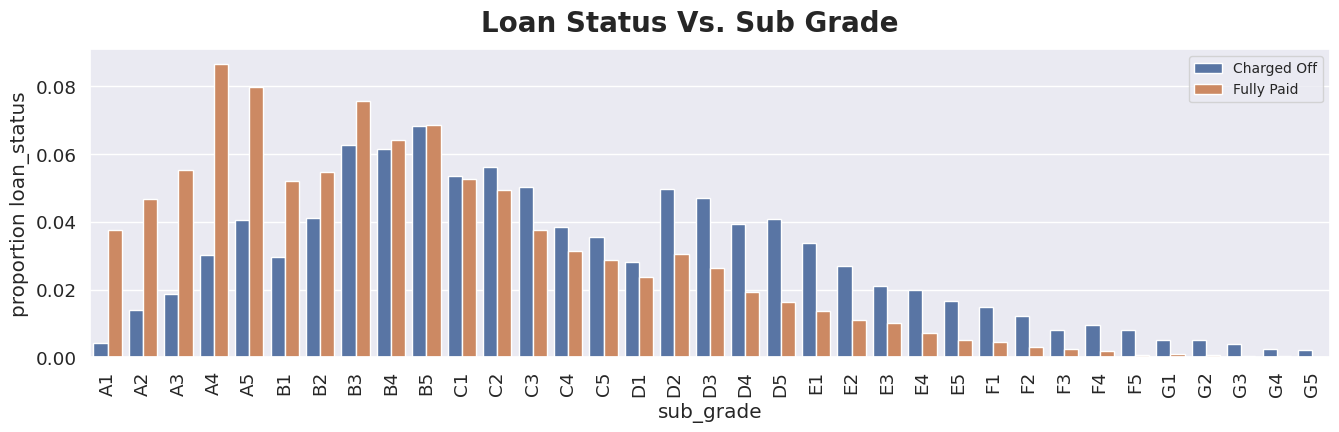

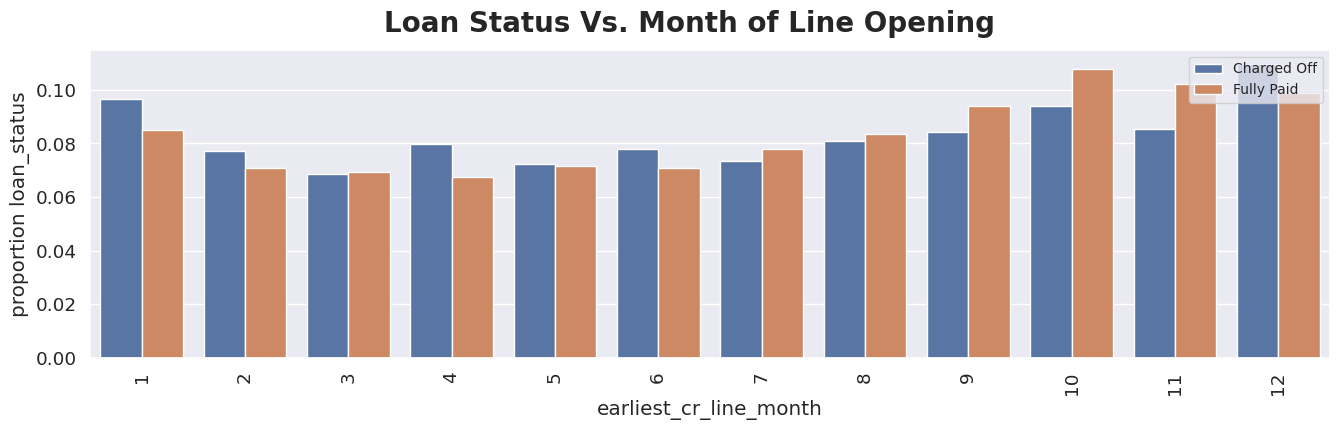

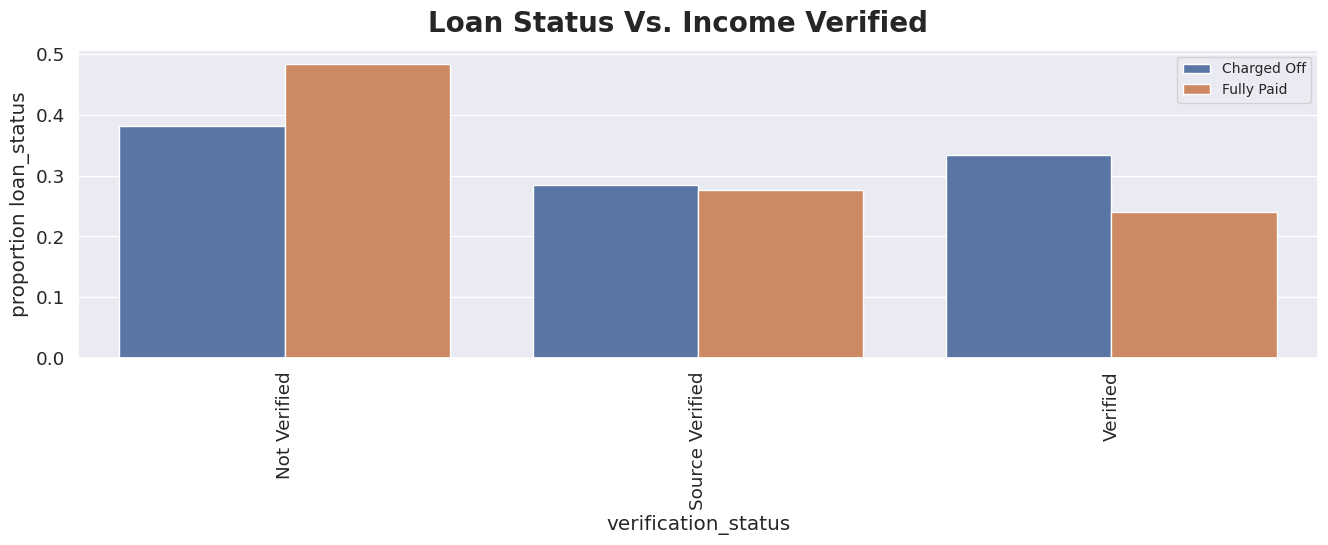

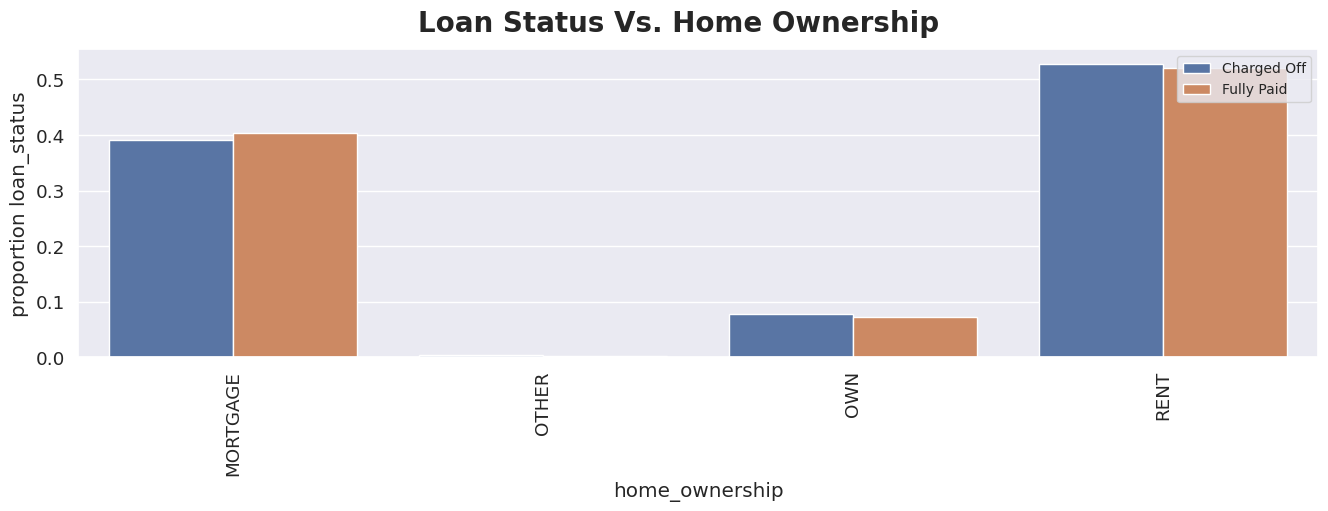

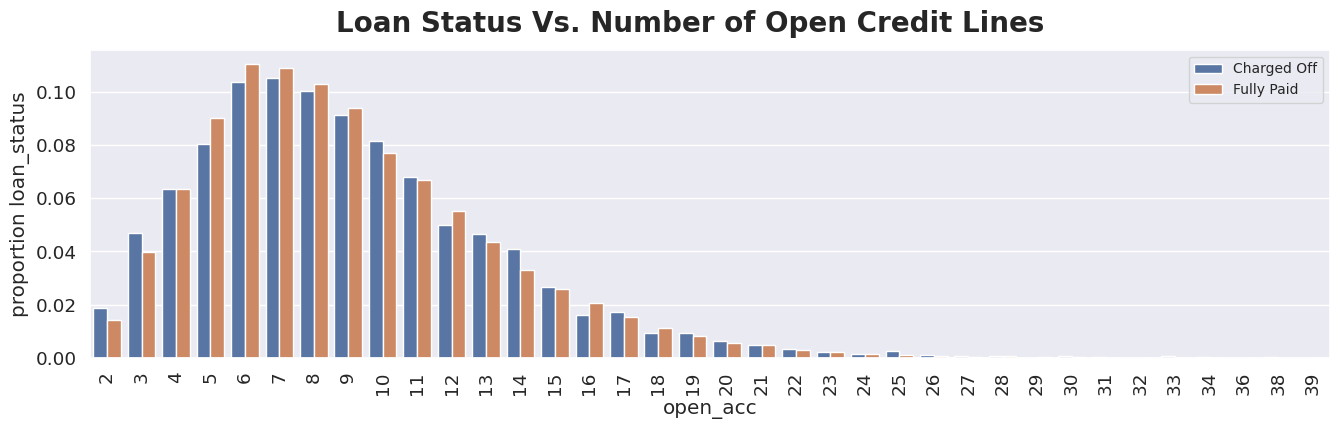

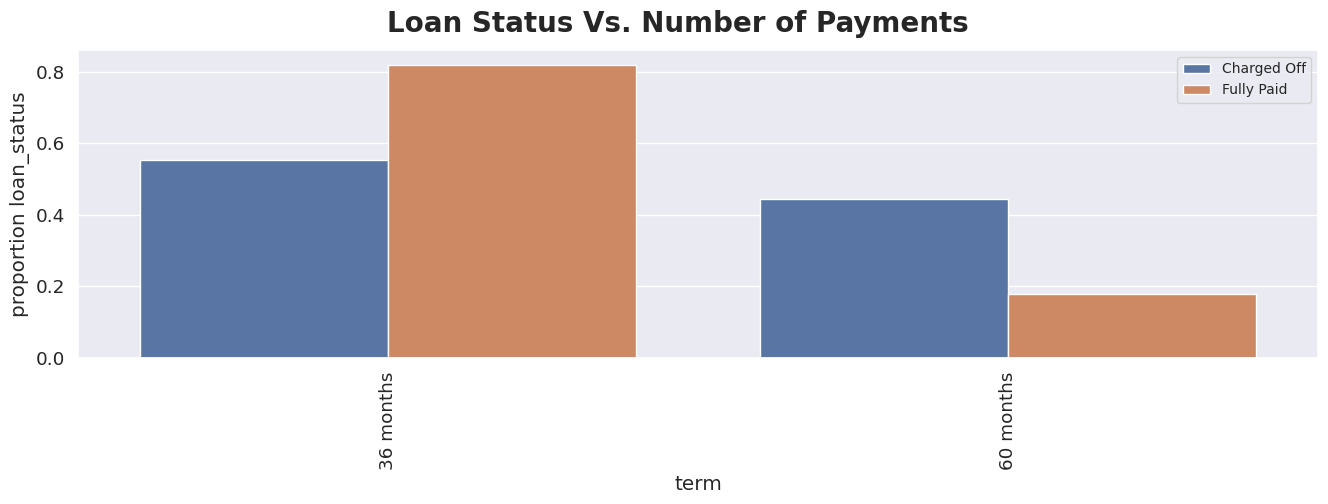

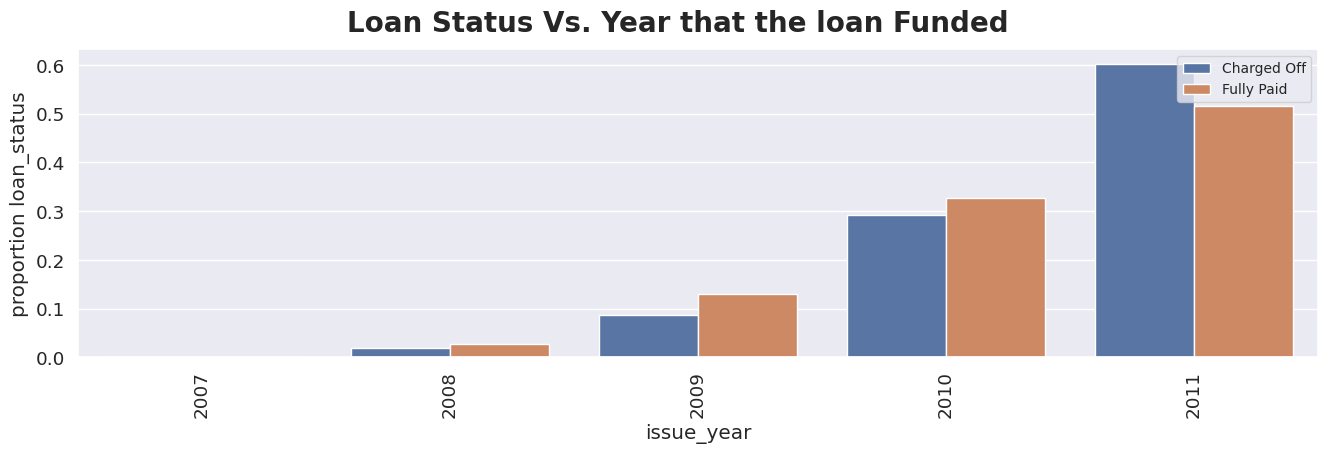

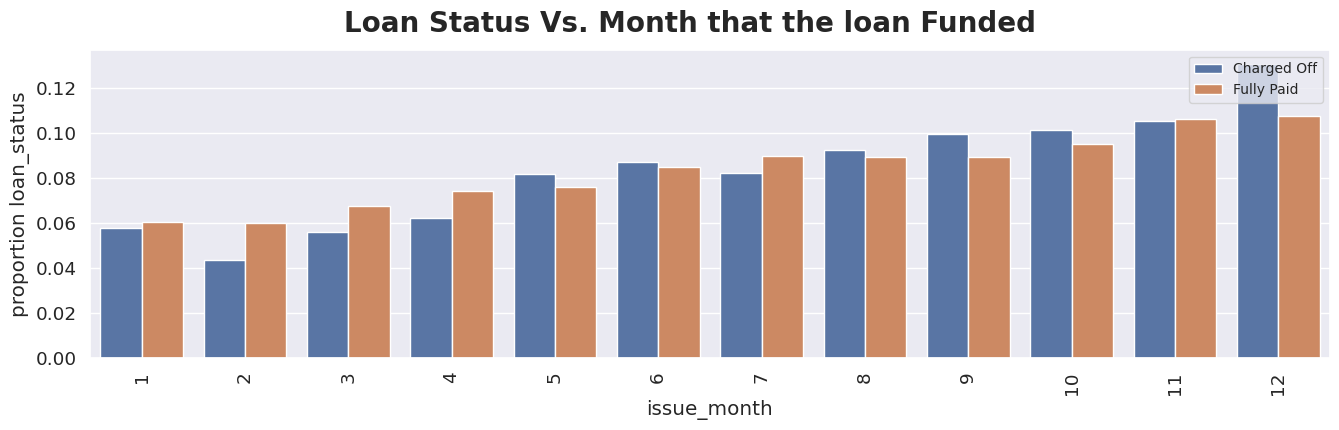

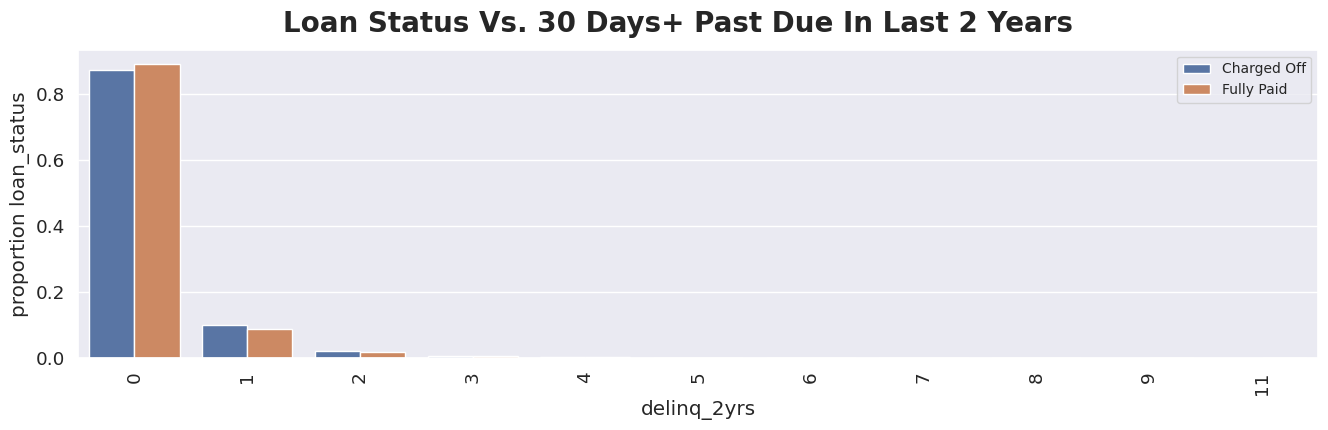

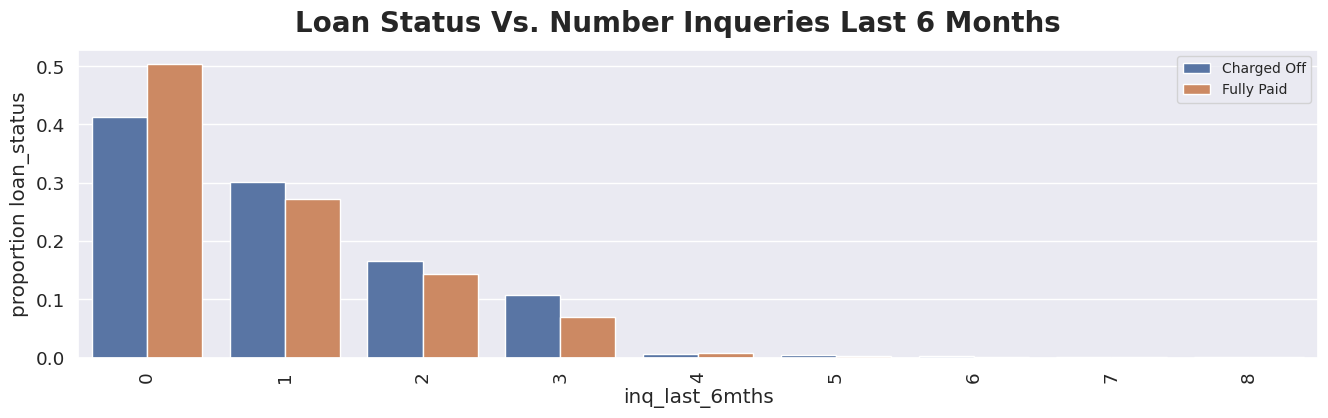

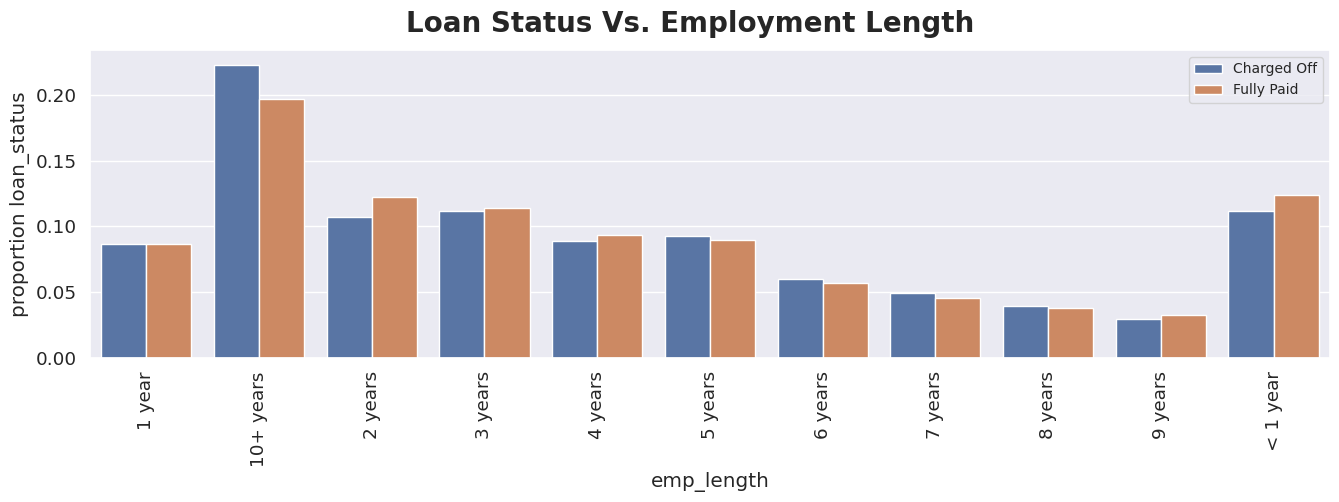

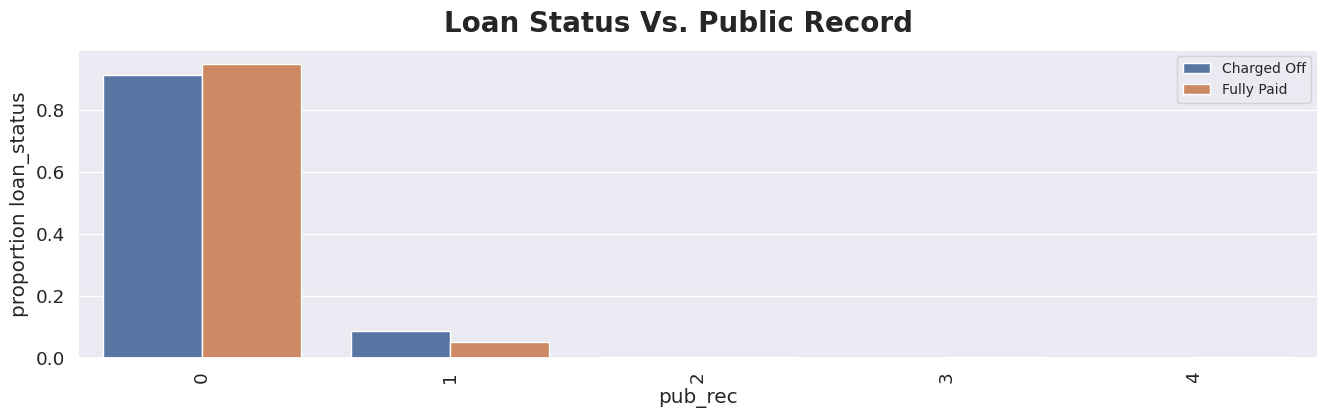

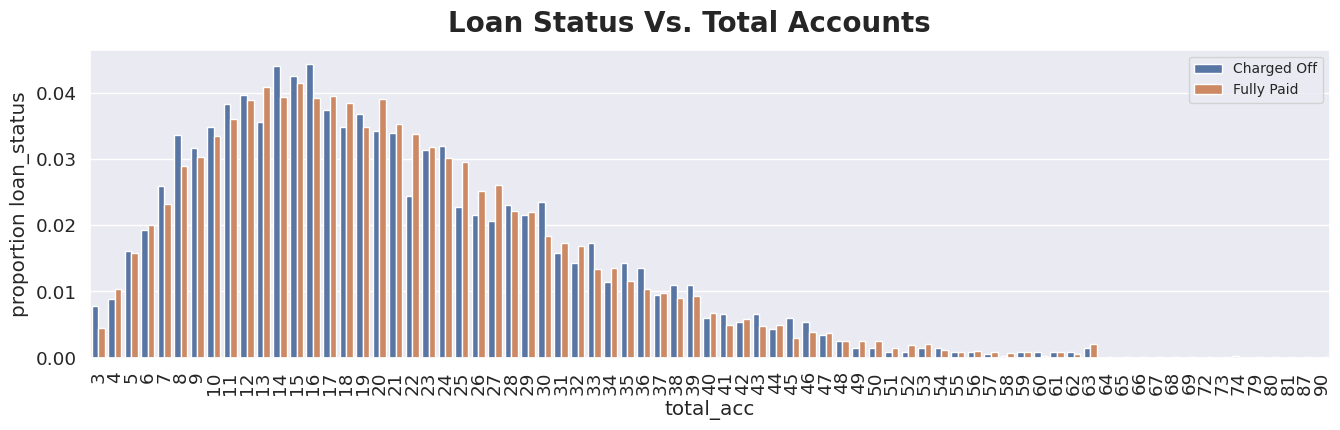

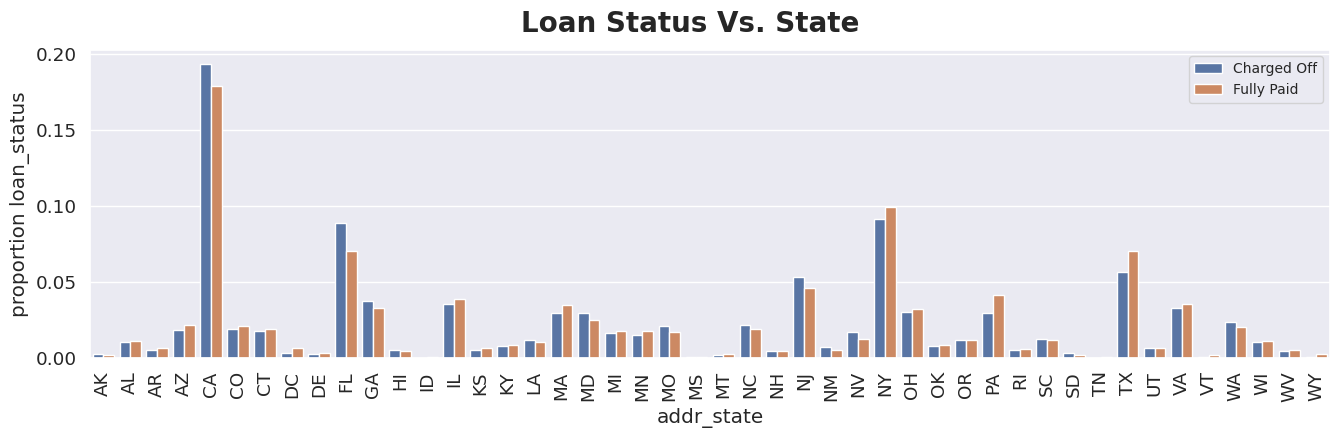

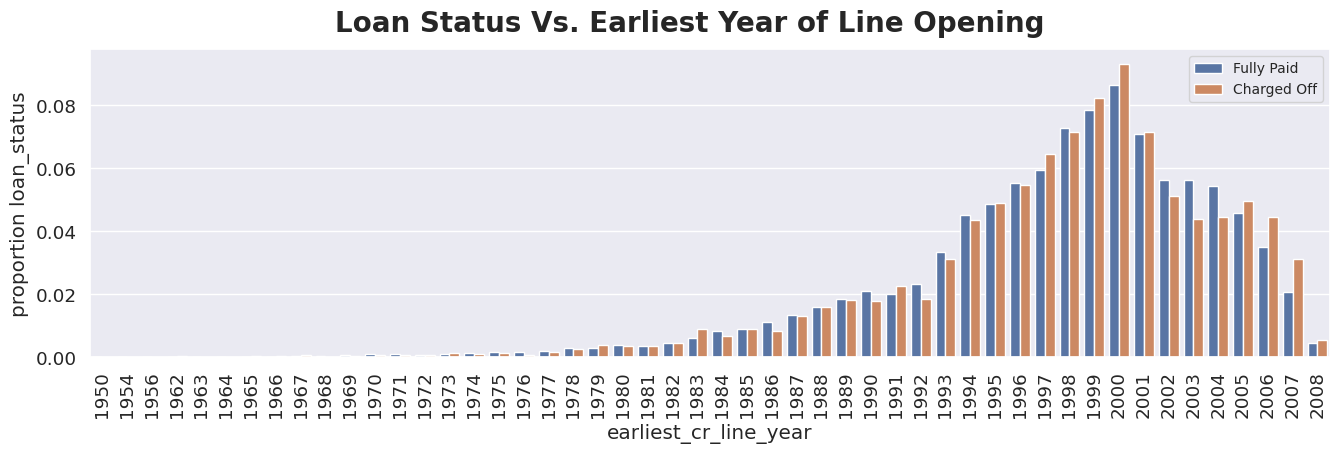

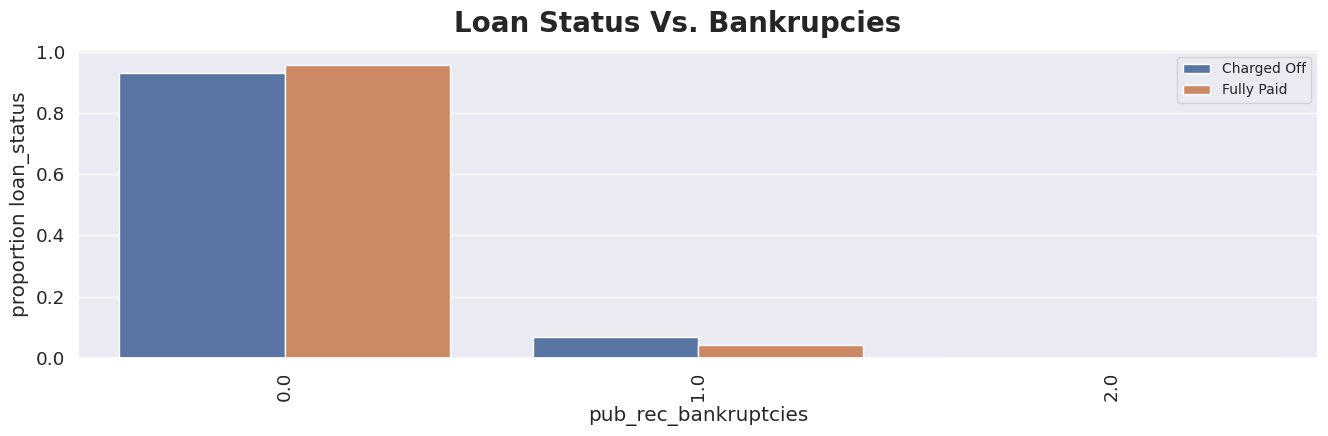

In [60]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 10000})'''))
categoricalDict3 = {"Purpose":"purpose",
                   "Grade":"grade", "Sub Grade": "sub_grade",
                    "Month of Line Opening":"earliest_cr_line_month",
                   "Income Verified": "verification_status", "Home Ownership":"home_ownership",
                   "Number of Open Credit Lines":"open_acc", "Number of Payments":"term",
                   "Year that the loan Funded":"issue_year",
                    "Month that the loan Funded":"issue_month",
                   "30 Days+ Past Due In Last 2 Years": "delinq_2yrs",
                   "Number Inqueries Last 6 Months": "inq_last_6mths",
                   "Employment Length":"emp_length", "Public Record":"pub_rec",
                    "Total Accounts": "total_acc", "State": "addr_state",
                   "Earliest Year of Line Opening":"earliest_cr_line_year",
                   "Number of Open Credit Lines":"open_acc",
                    "Bankrupcies": "pub_rec_bankruptcies",
                    "Public Record":"pub_rec"}

for k in categoricalDict3.keys():
  bivar_barplot(df, categoricalDict3[k], "loan_status", f"Loan Status Vs. {k}")


1. Higher proportion of Applicants that want the loan for debt consolidation and small business than are defaulted. So loans for debt_consolidation and small businesses can be consider risky loans.

2. applicants that want the loan for credit card are more likely to pay them off. So these loan types can be considered as low risk.

3. Majority of applicants in grade A and B, are paying their loan back. while the applicant in grades D, F and G are more defaulted. So these grades can be considered as high risk grades.

4. Line opened at the January, Feburary, April and June can be considered as having higher risk of default risk of the year are more likely to be defaulted.

5. Applicants that their income been verified have more chance of being defaulted than those who didn't.

5. Applicant for 60 months plan are more likely to default

6. Loans that are founded in December and September are having highest proportion of charged off.

7. Applicants with 10+ years of employment have higher charged off proportion than fully paying. So those applicant are at higher resk of being defaulted.

8. CA and FL states have higher proportion of charged off than fully pay while TX and NY have higher proportion of applicants who fully paying off their debt

9. Applicants with less than 4 open line of credit are more likely to fail paying their Loan.


## **Bivariate analysis between categorical variables and continues variables**


In [61]:
def bivariate_box_barPlot(data, x, y, col, title):
  plt.figure(figsize=(16,6))
  plt.subplot(211)
  a = plt.gca()
  sns.boxplot(x=x, y=y, hue=col, data=data)
  plt.tick_params(axis='x', rotation=90)
  plt.legend(bbox_to_anchor=(1, 1), loc='upper left',fontsize=10)
  xax = a.axes.get_xaxis()
  xax = xax.set_visible(False)

  plt.subplot(212)
  sns.barplot(x=x, y=y, hue=col, data=data, estimator=np.median)
  plt.suptitle(title, fontsize=20, fontweight="bold")
  plt.tick_params(axis='x', rotation=90)
  plt.legend().set_visible(False)
  plt.show()

1.   **Loan Status Against All the Continues Variables we have**:

<IPython.core.display.Javascript object>

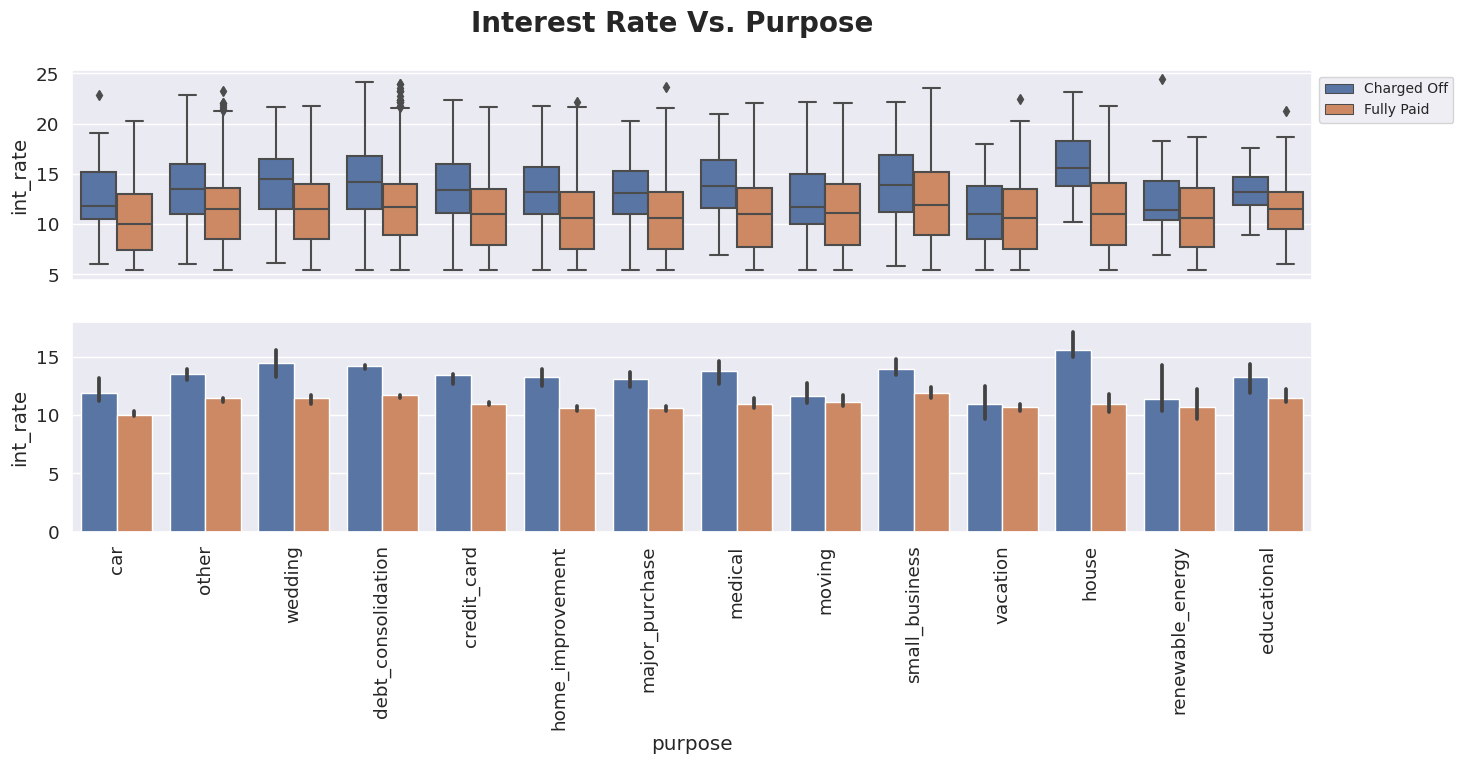

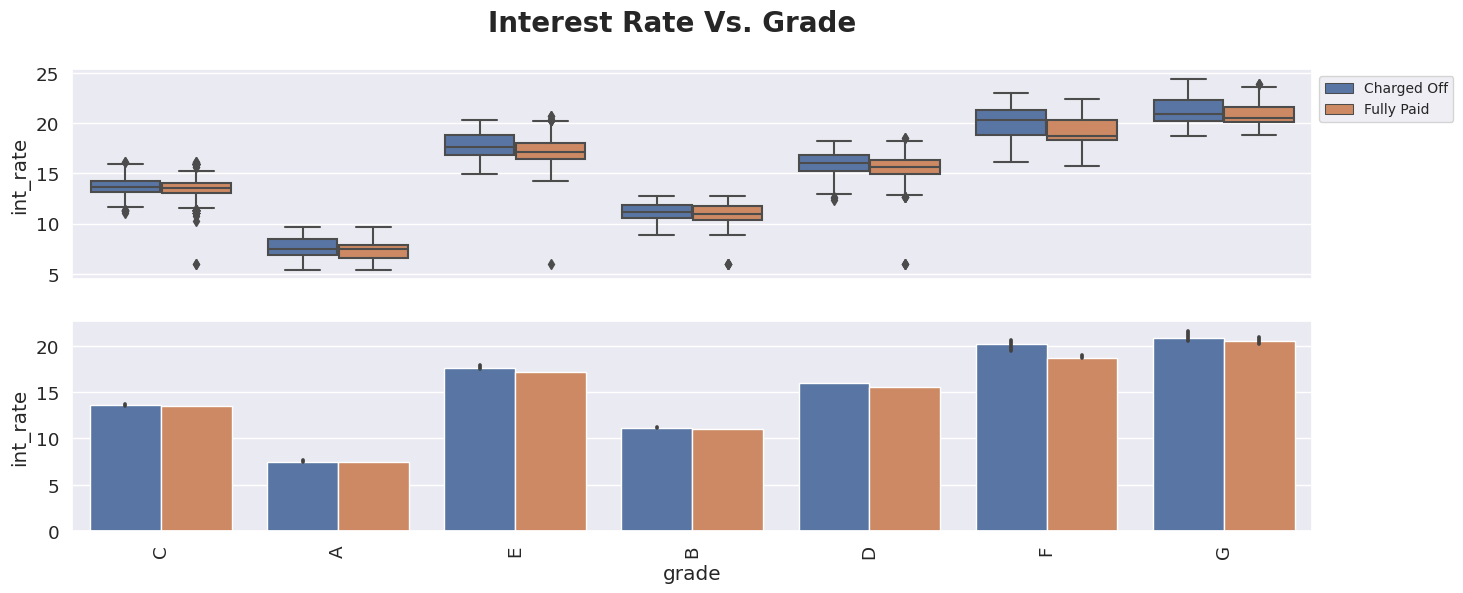

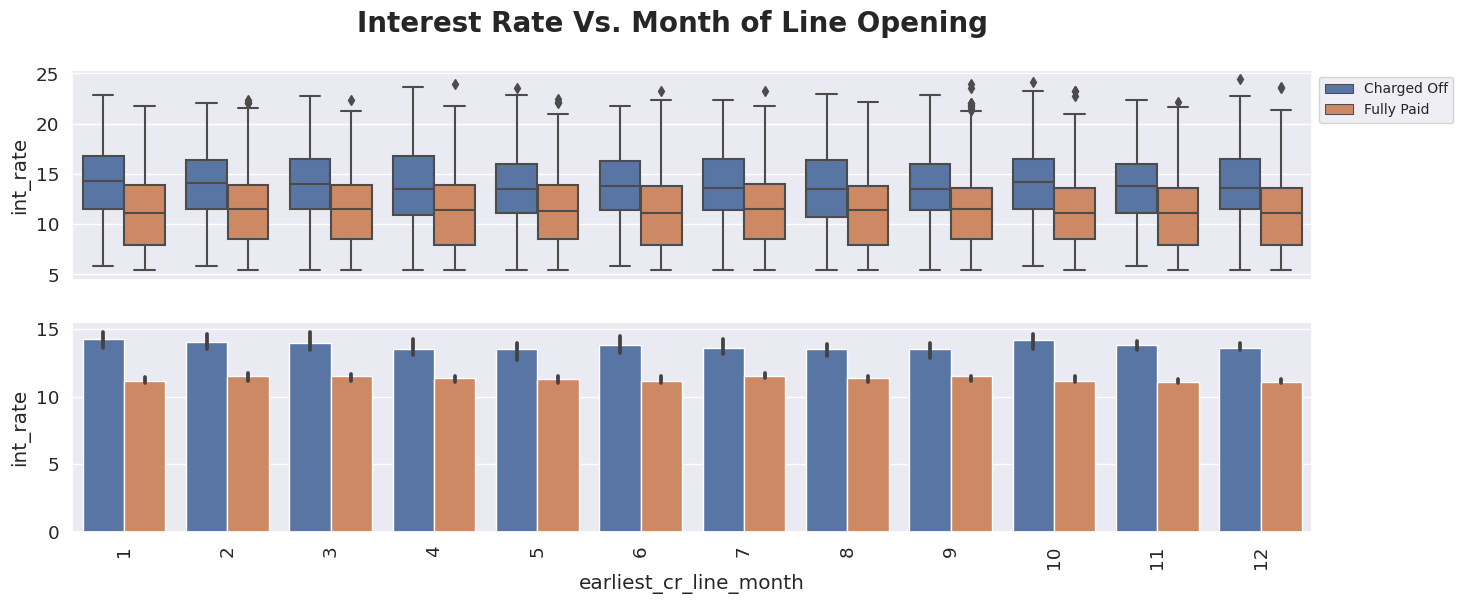

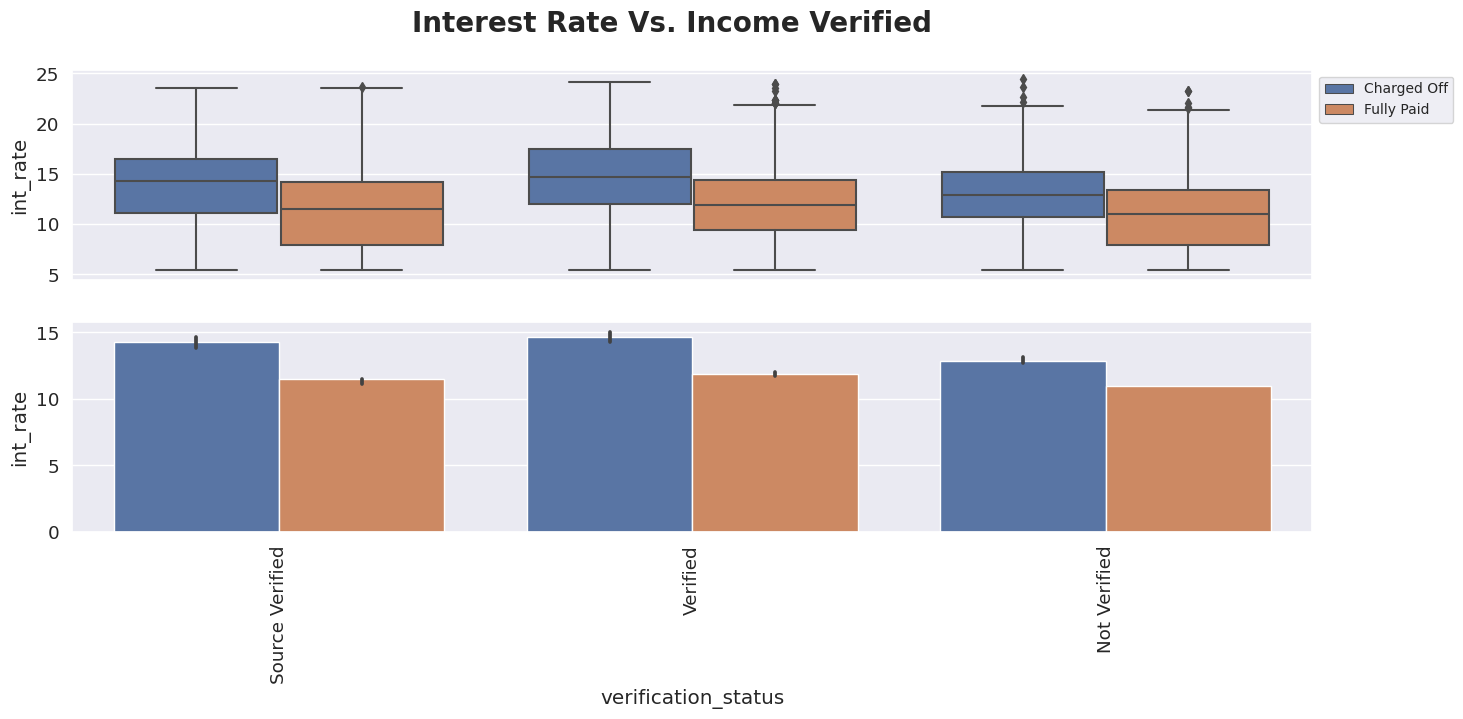

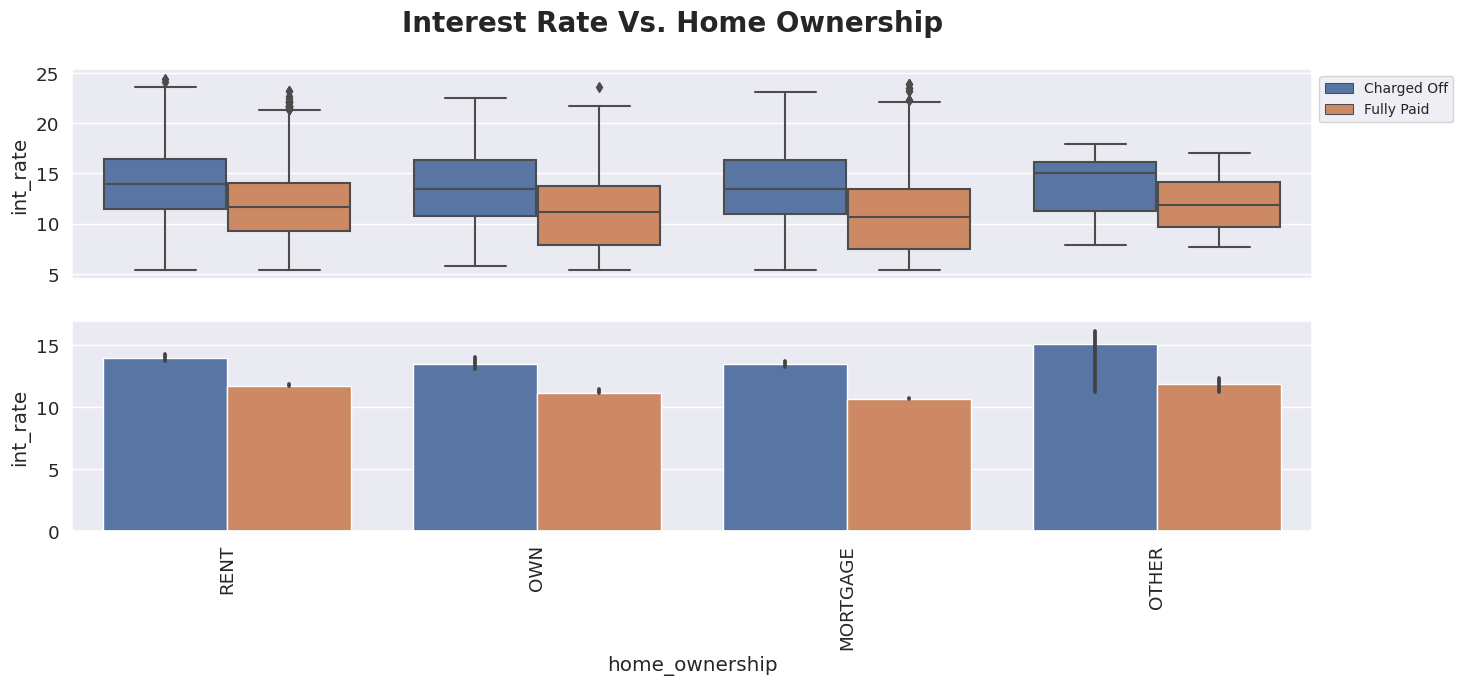

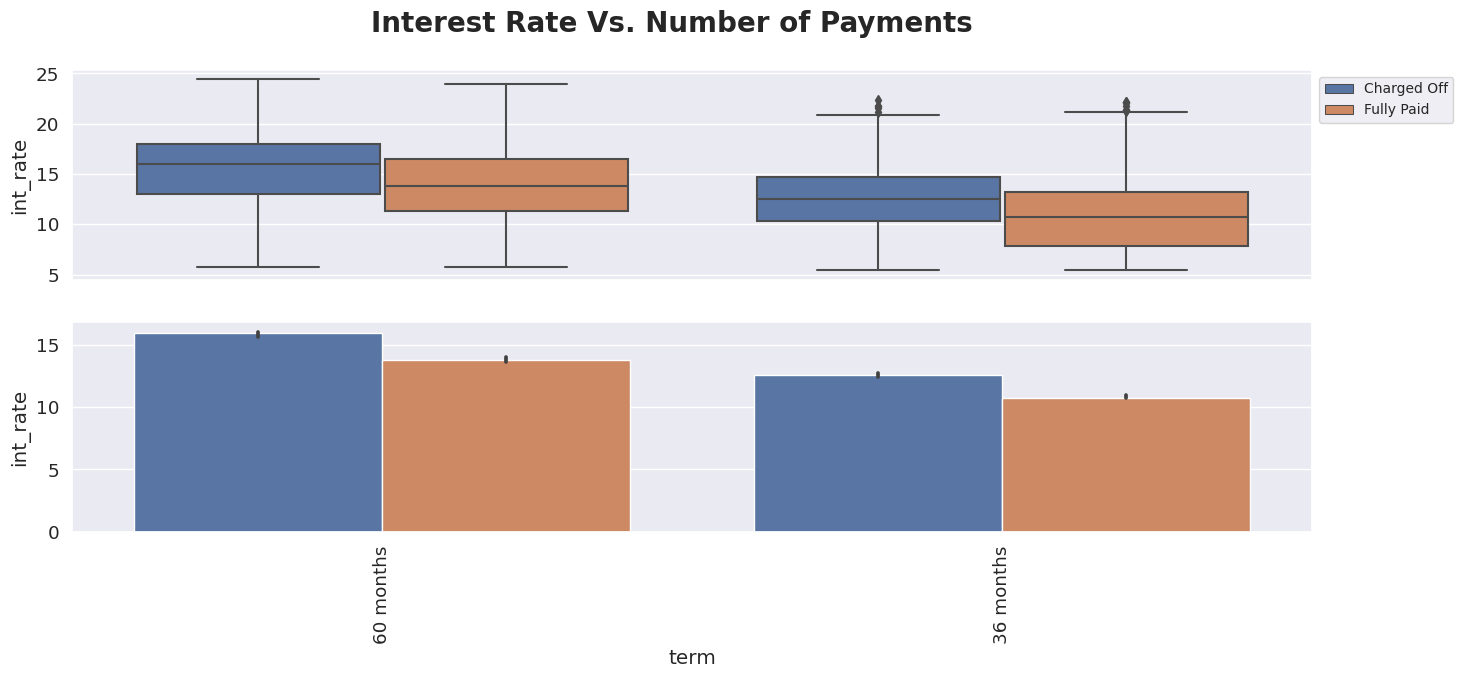

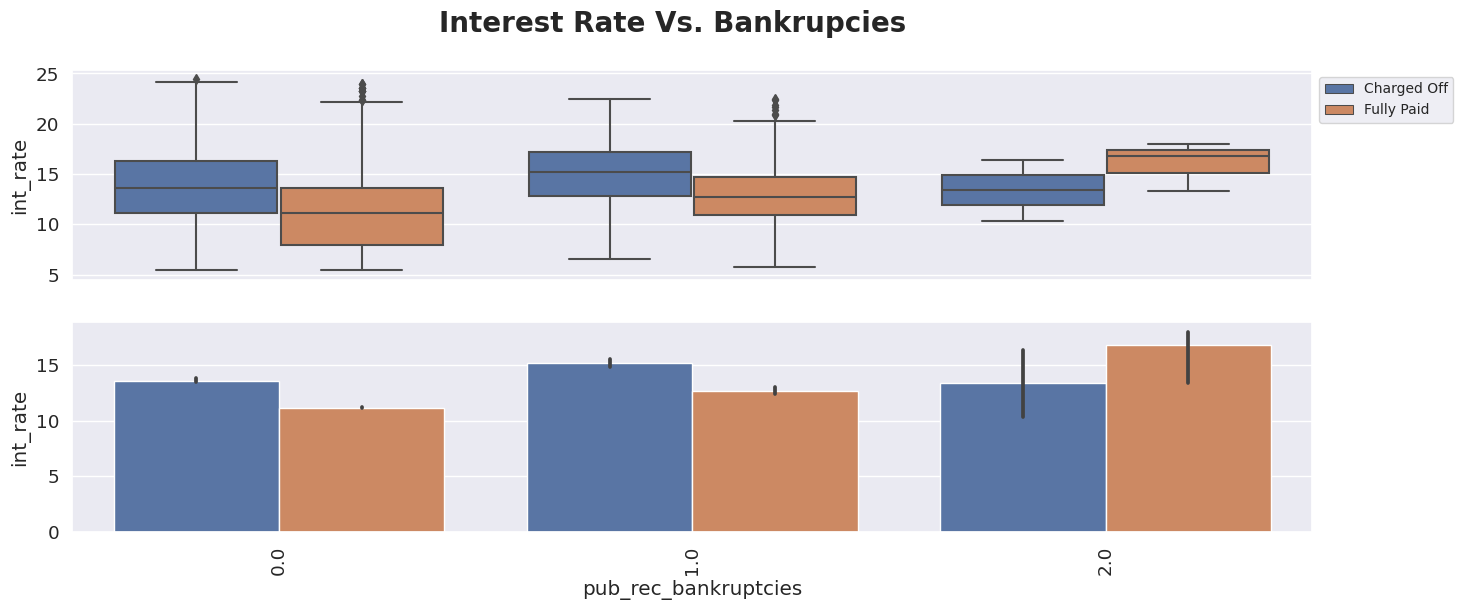

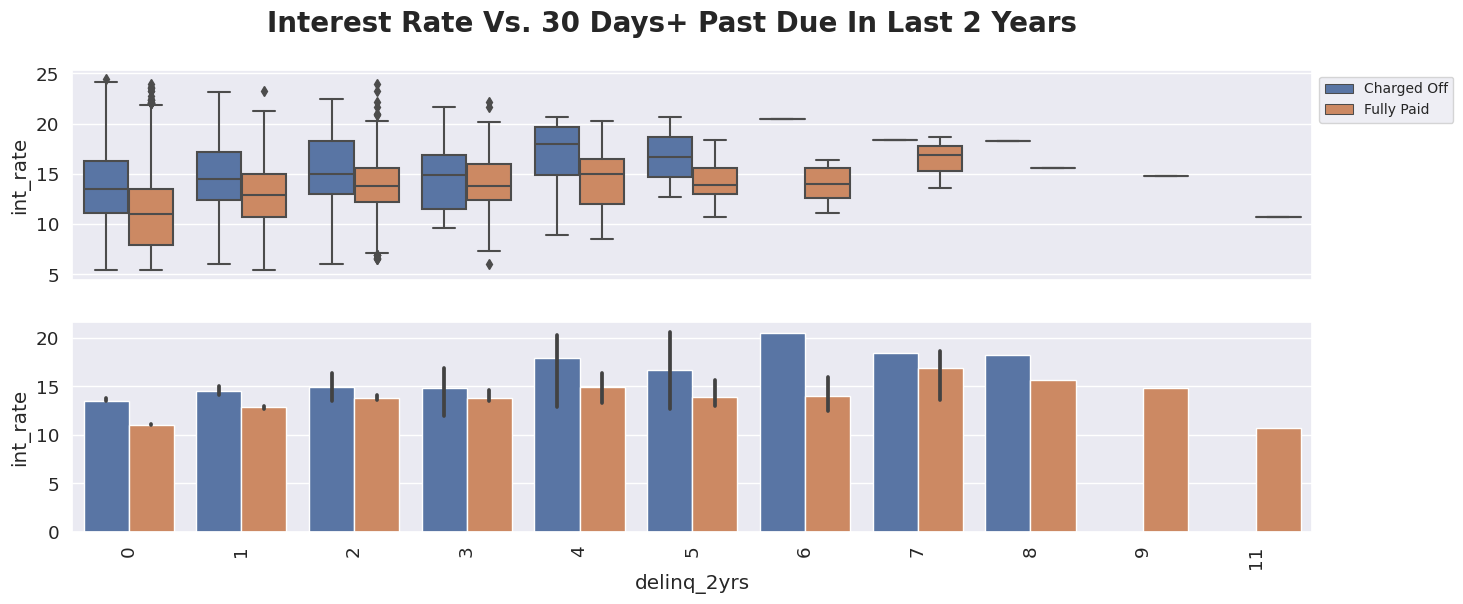

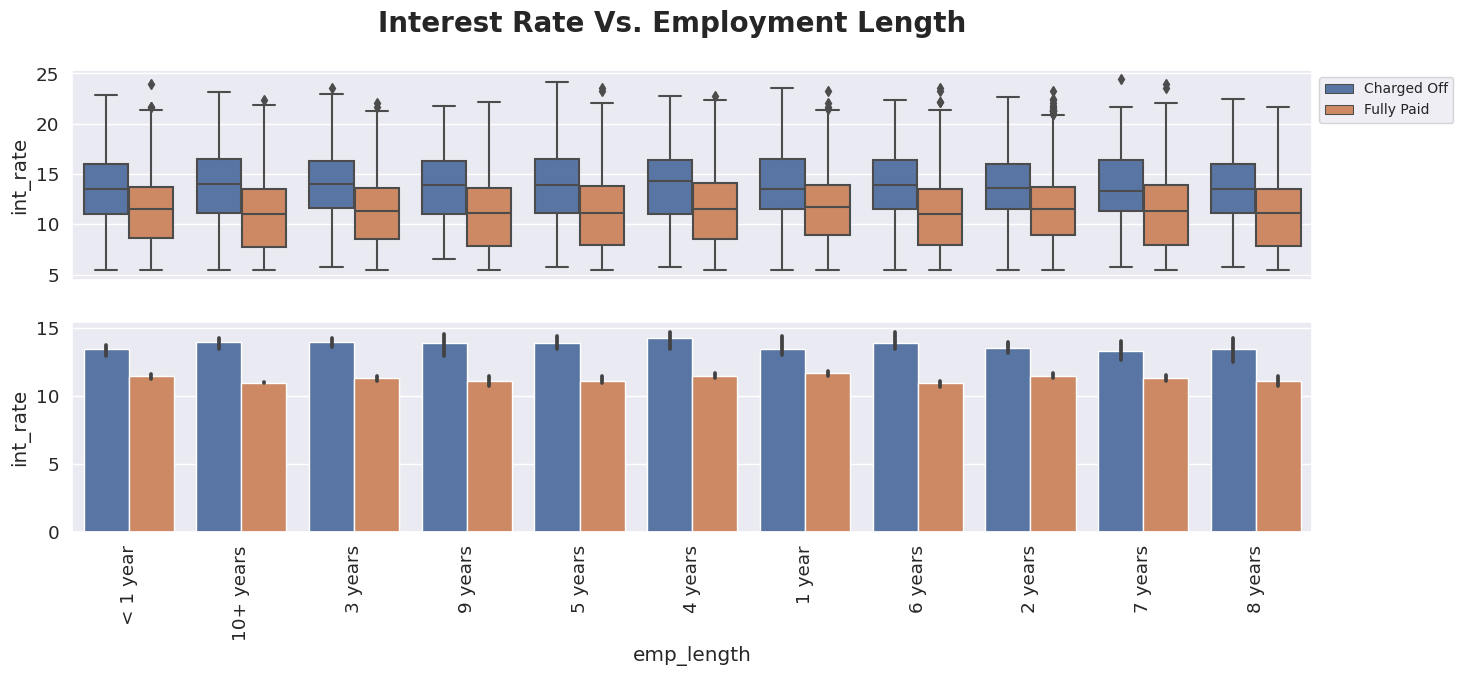

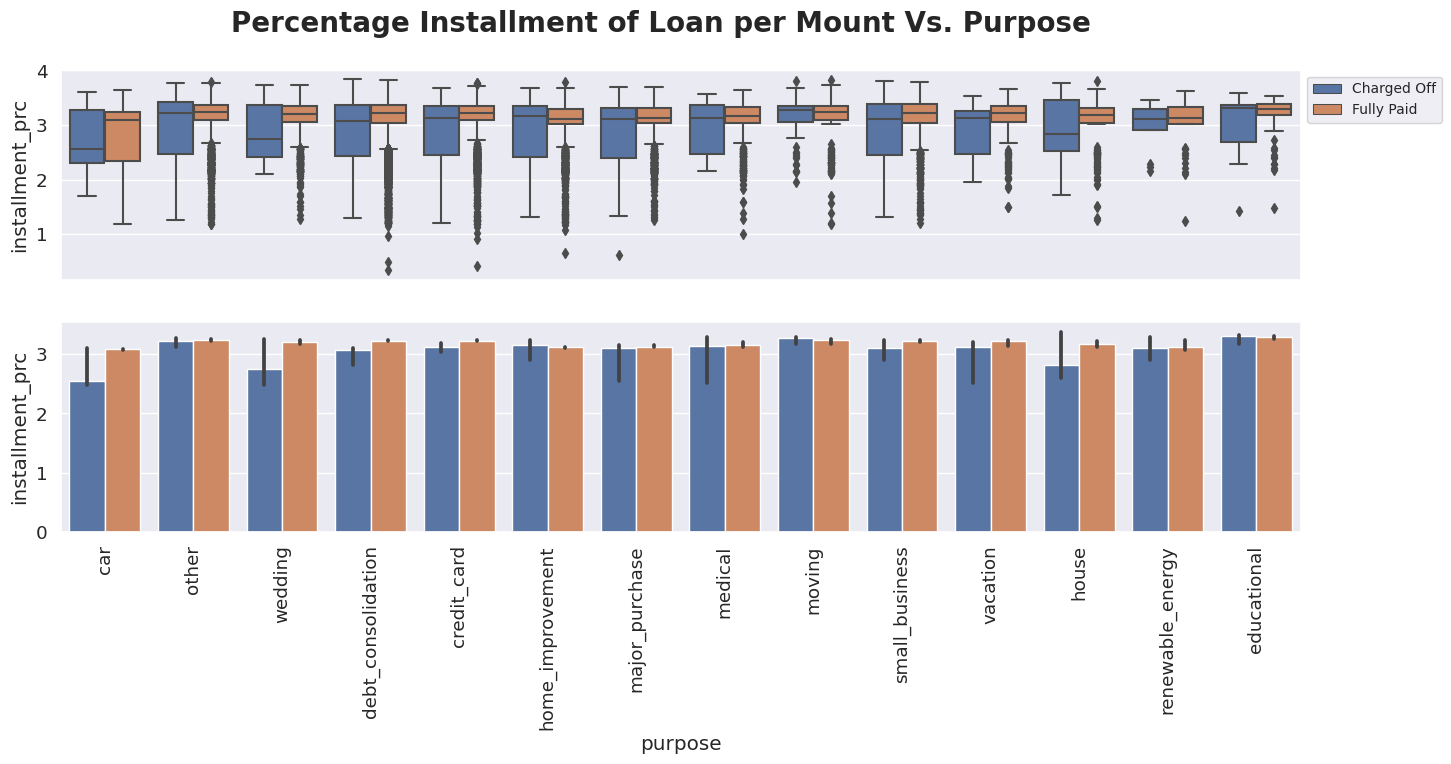

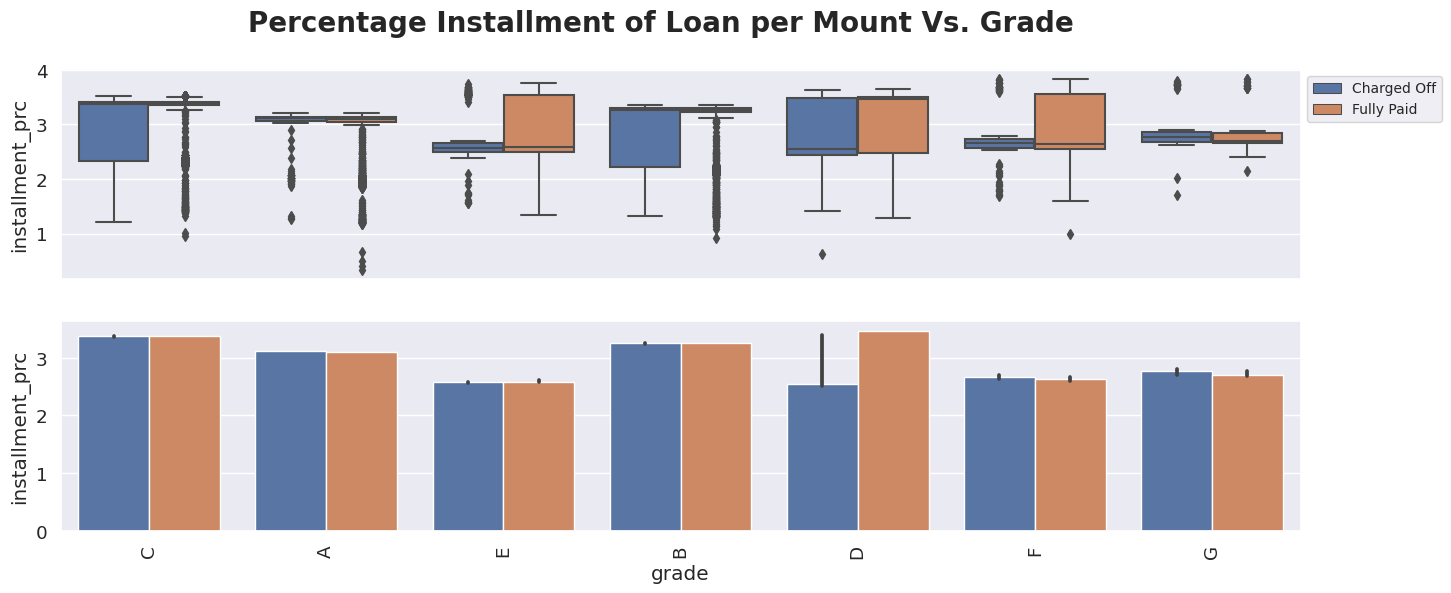

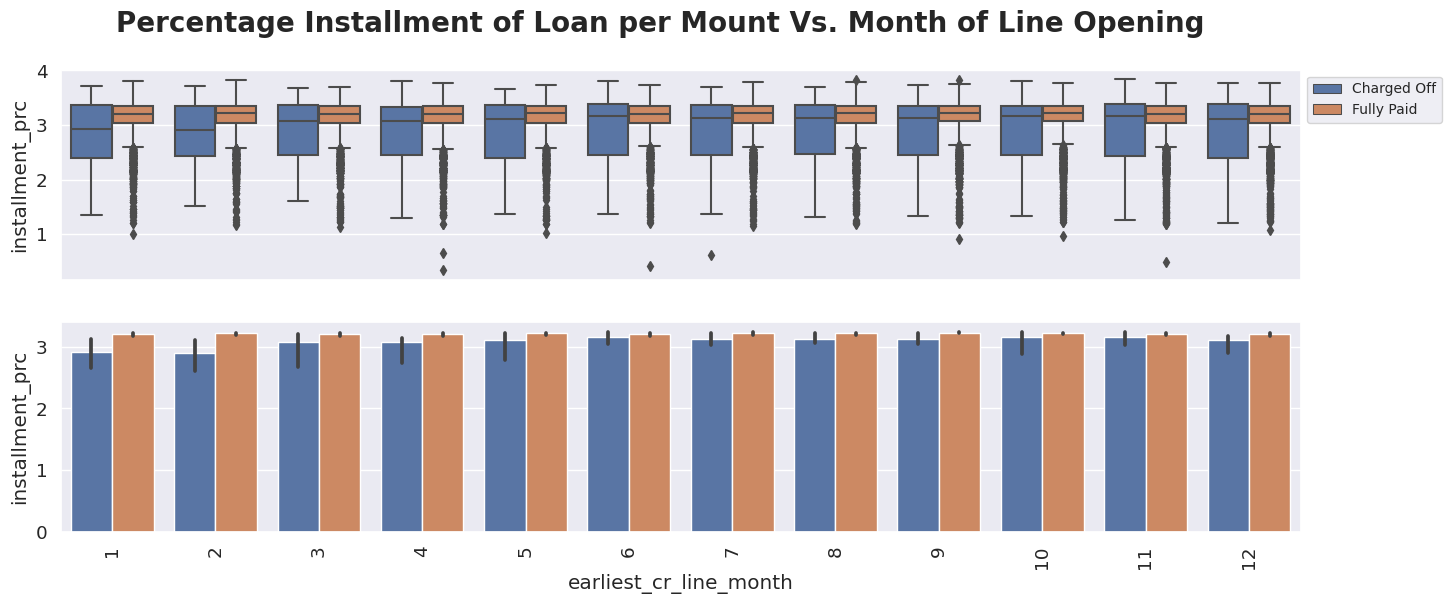

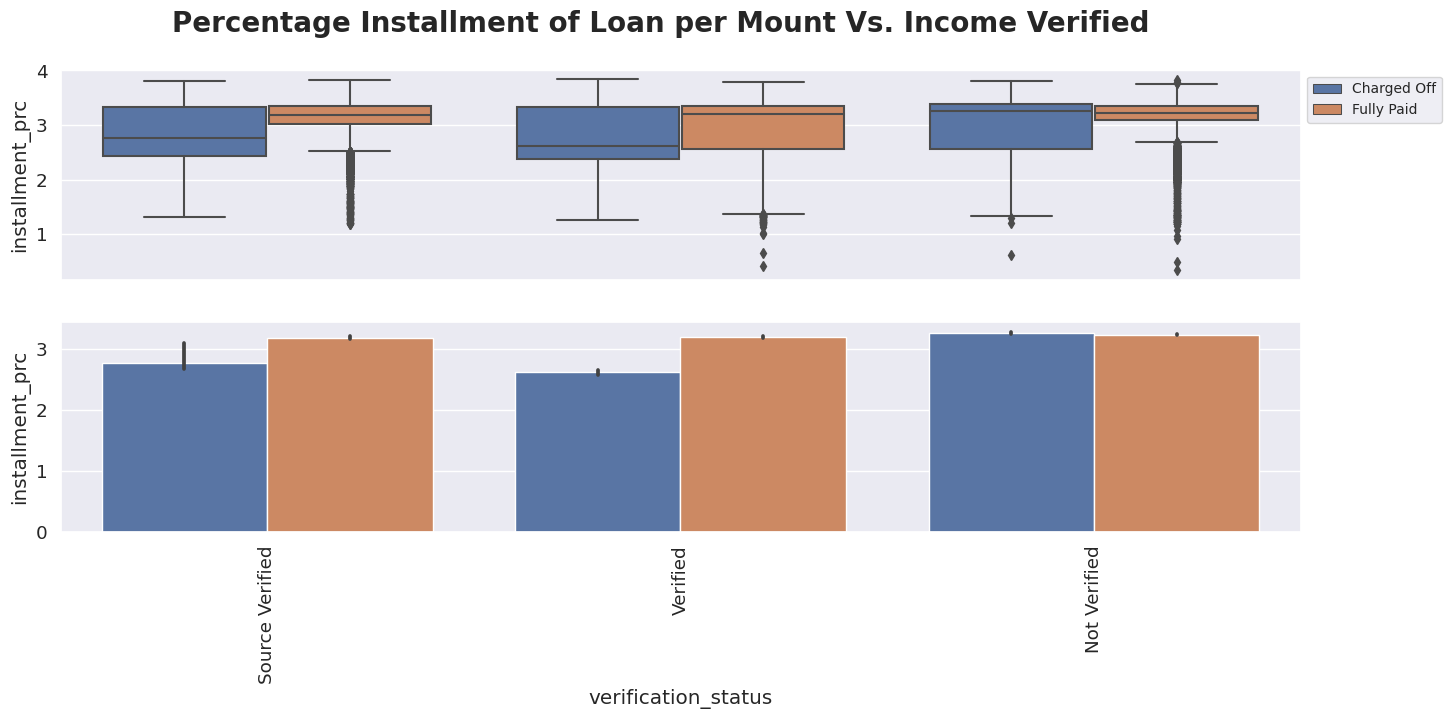

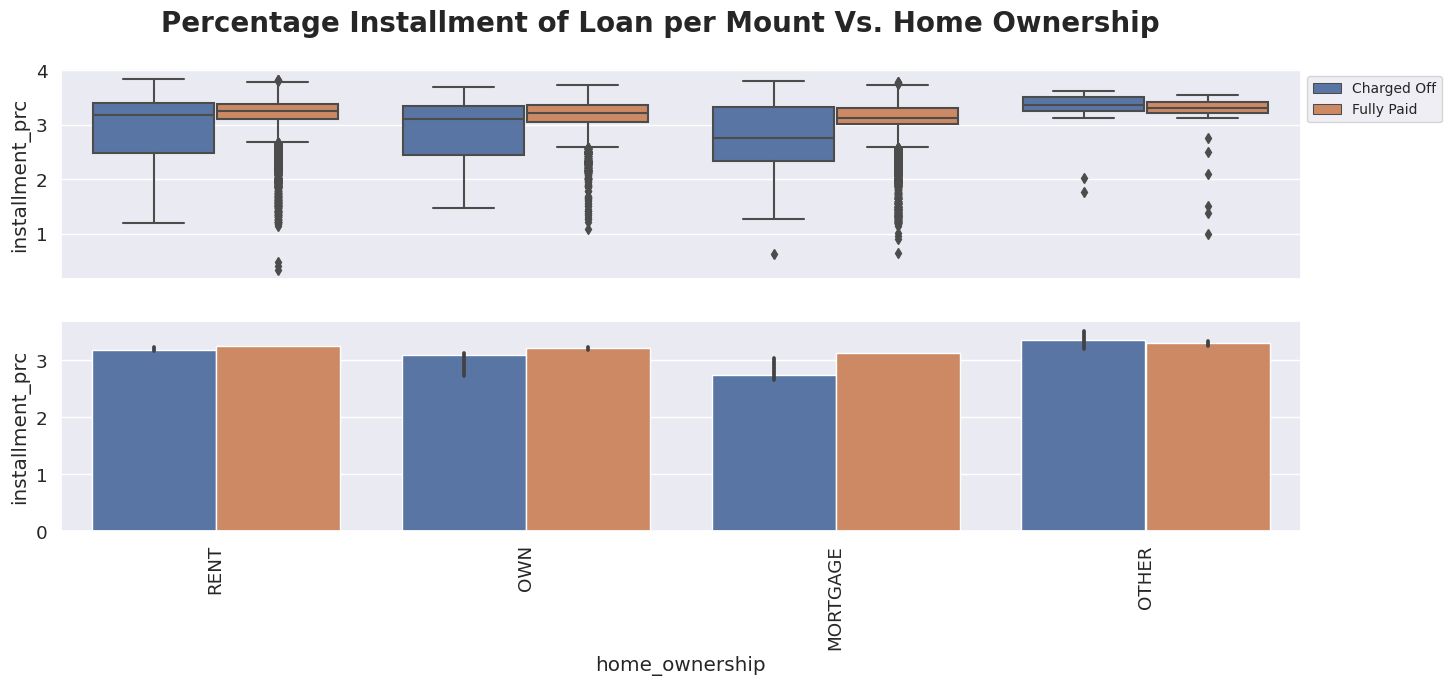

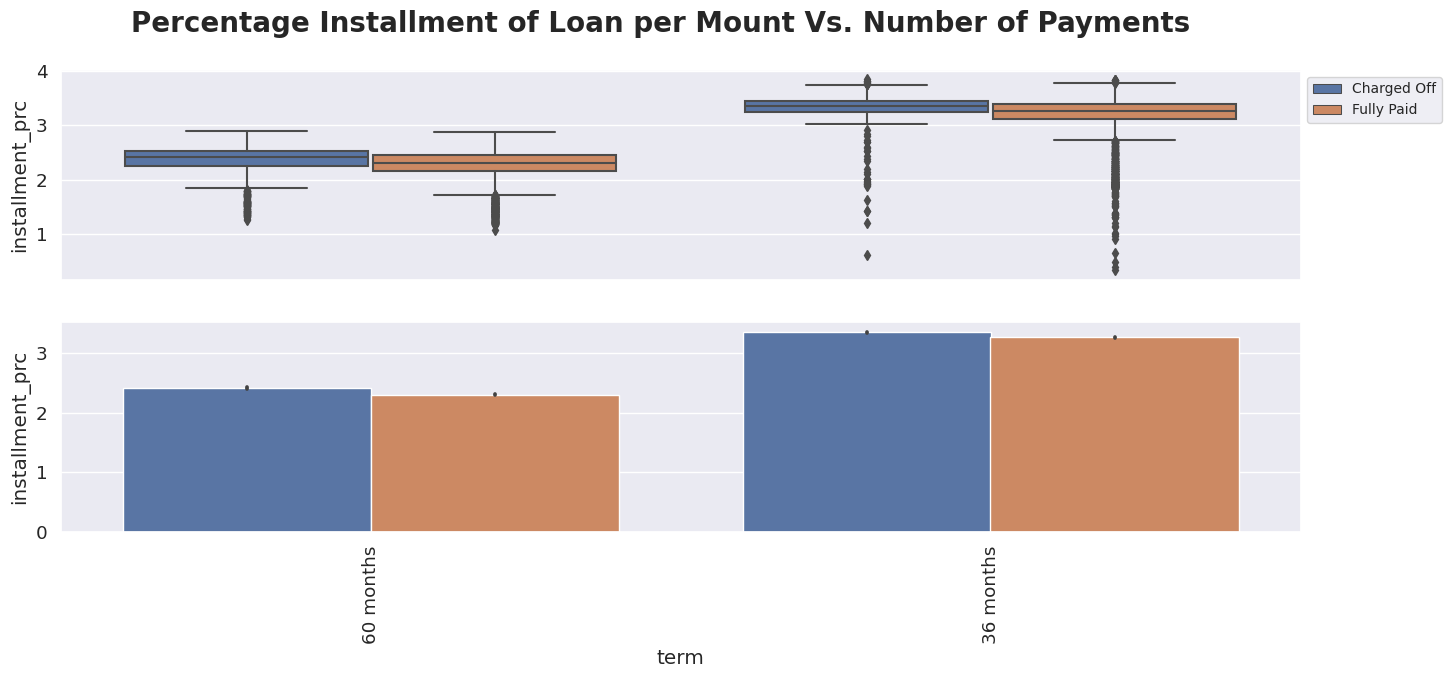

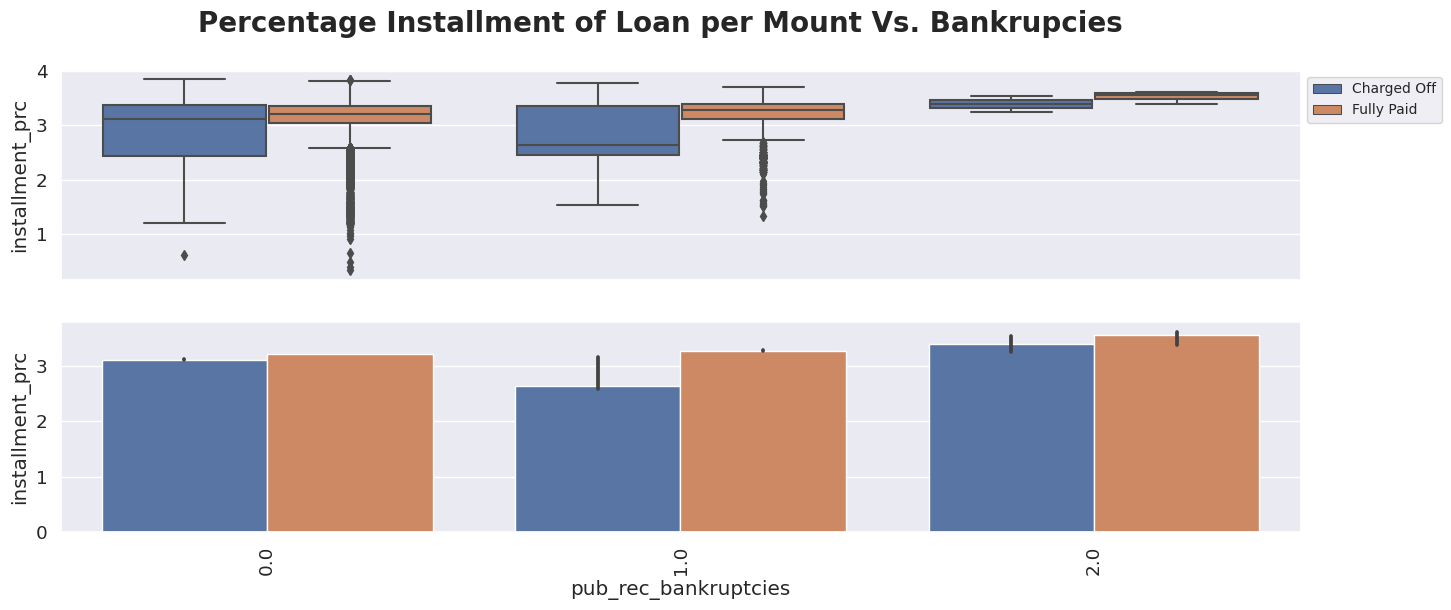

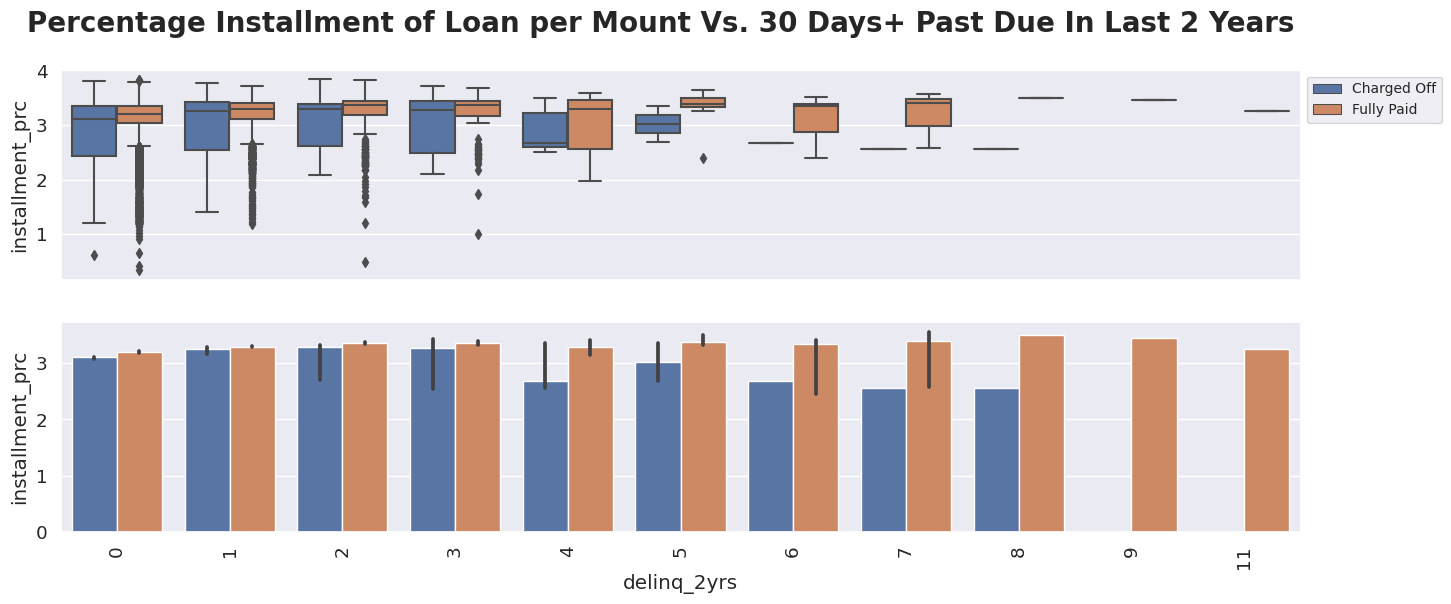

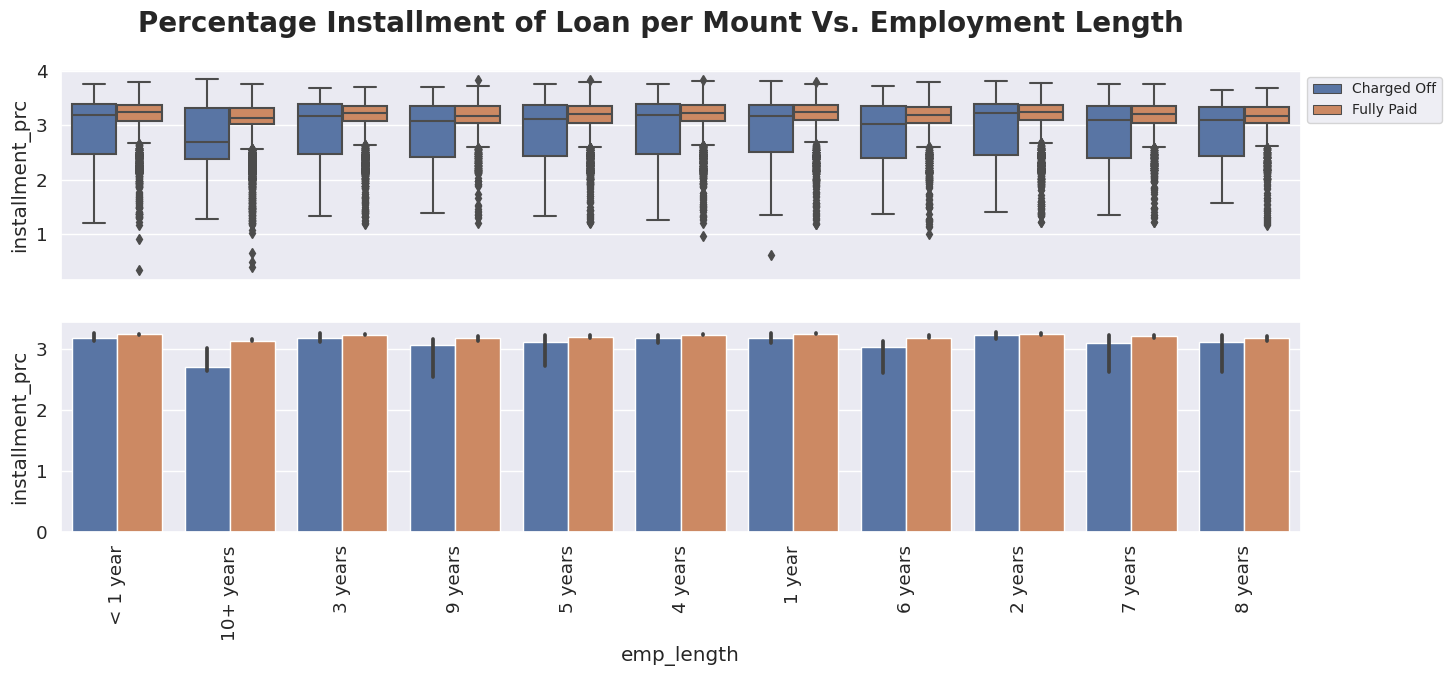

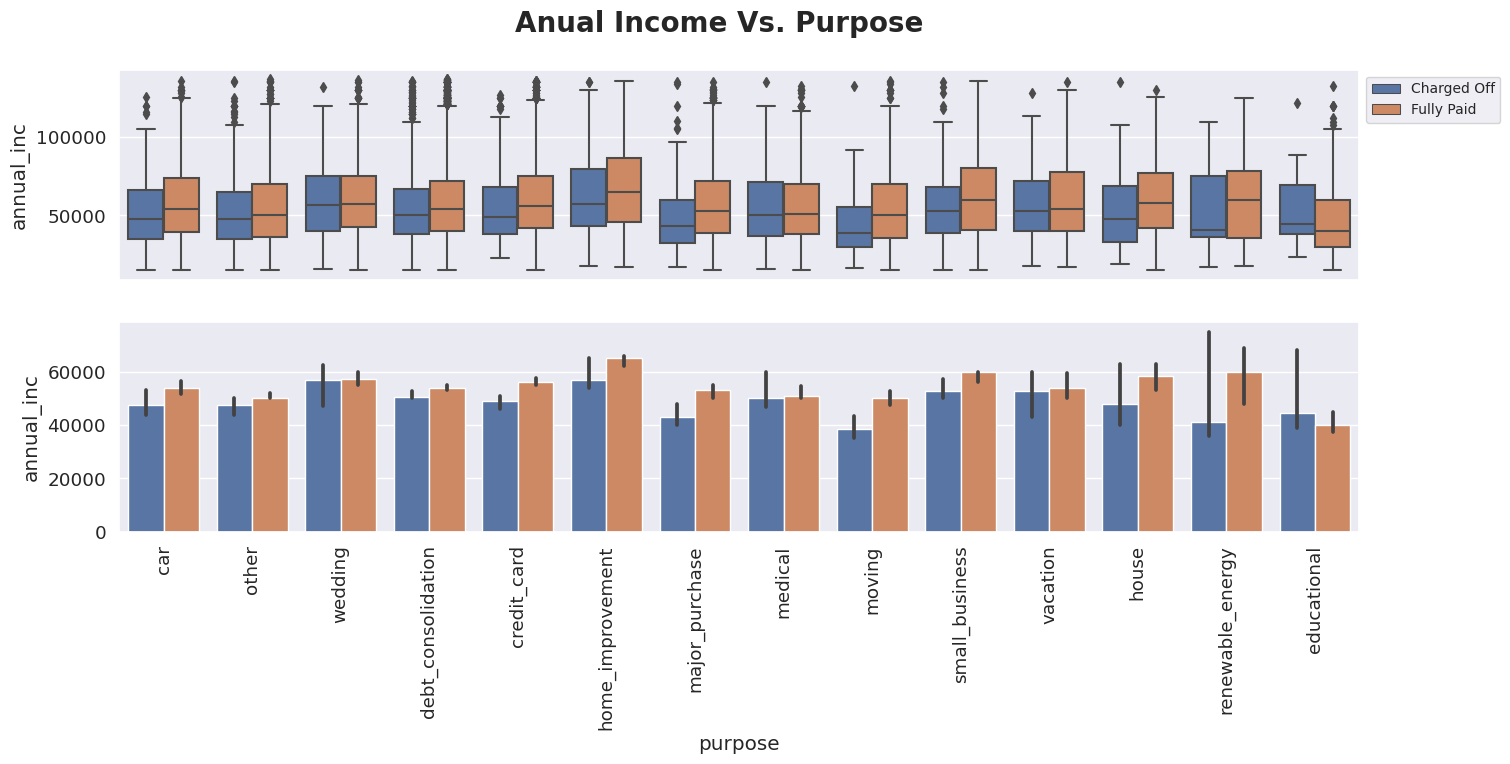

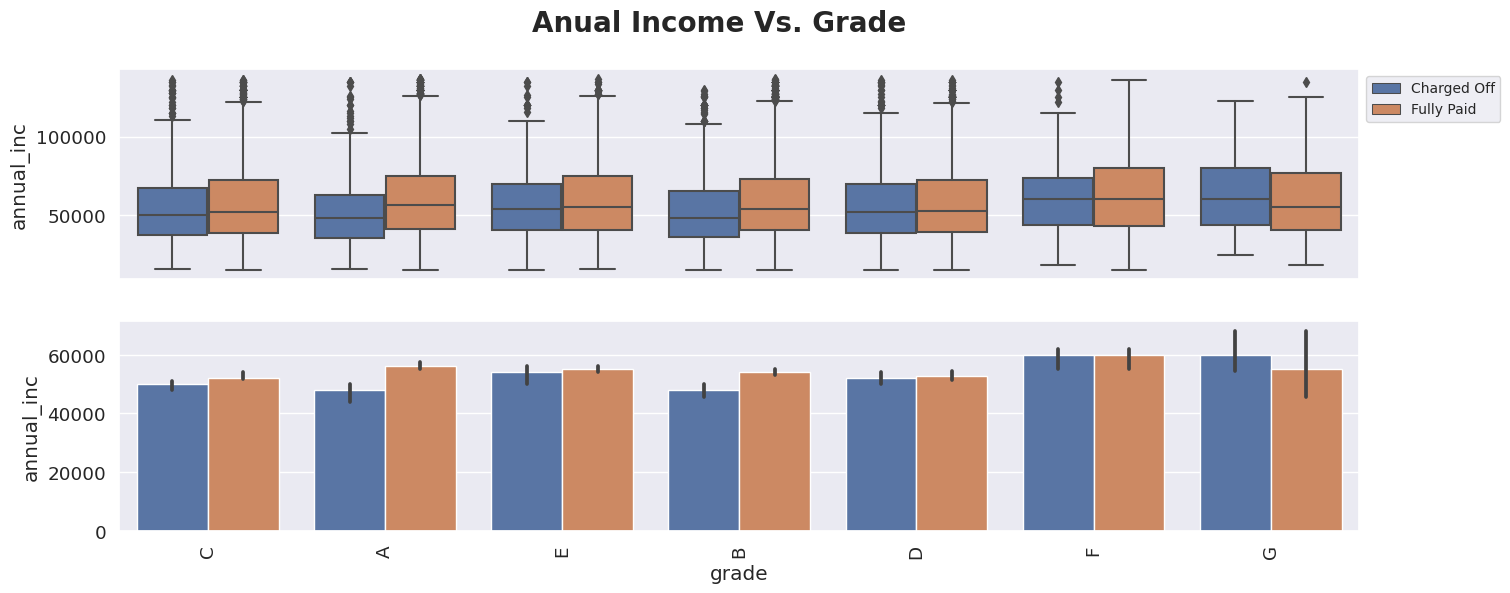

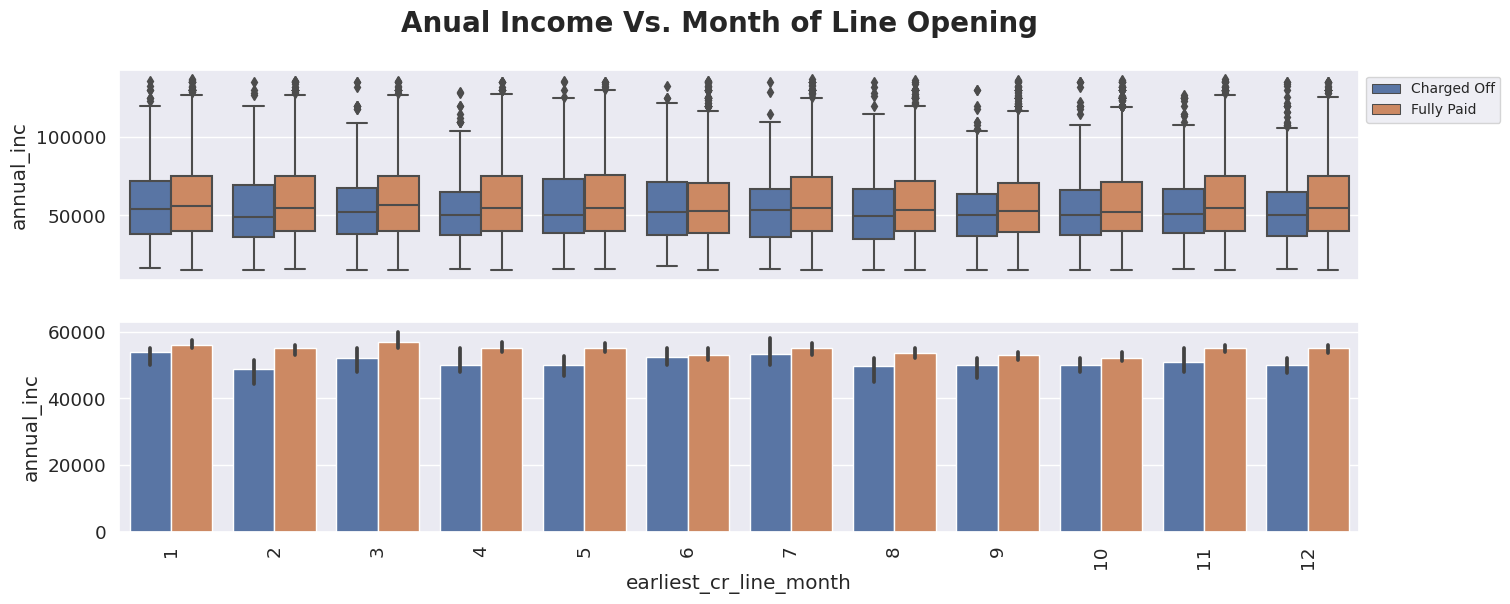

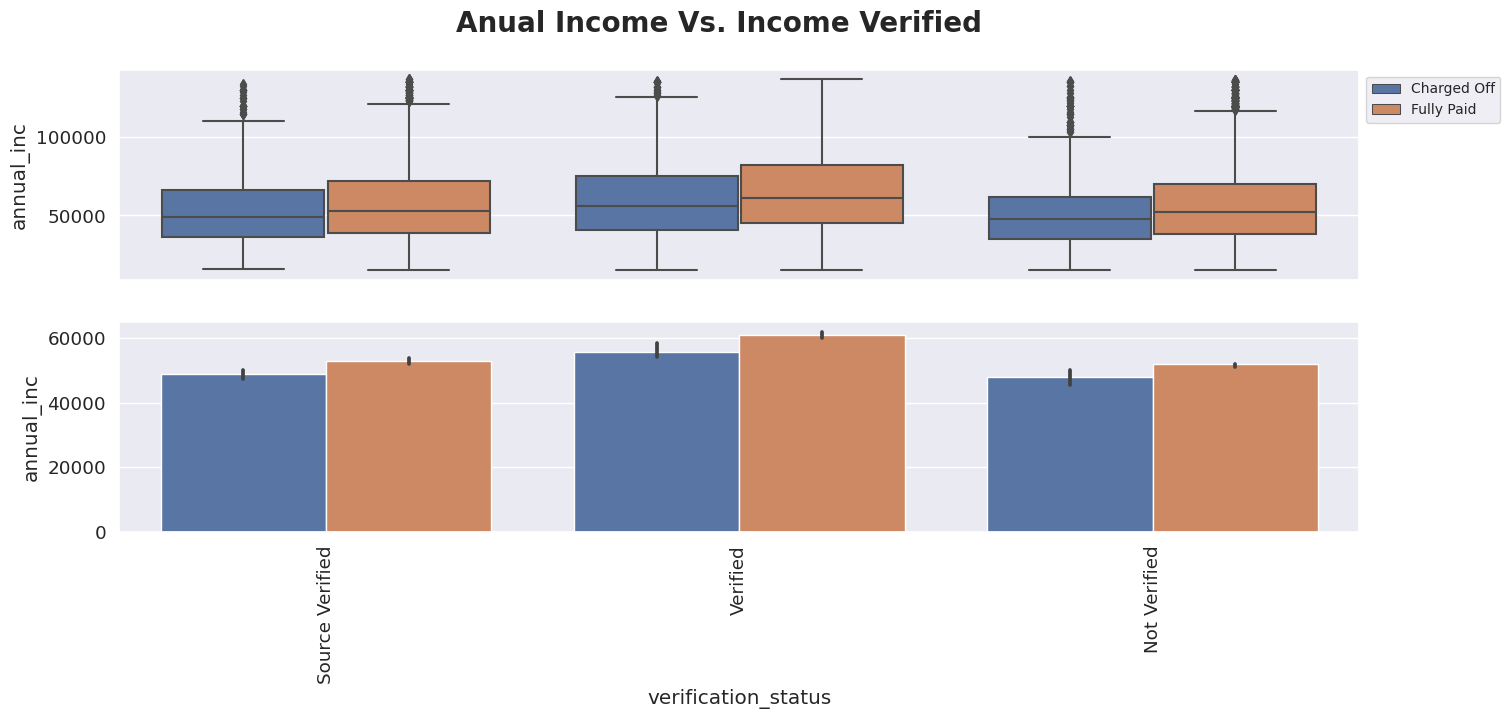

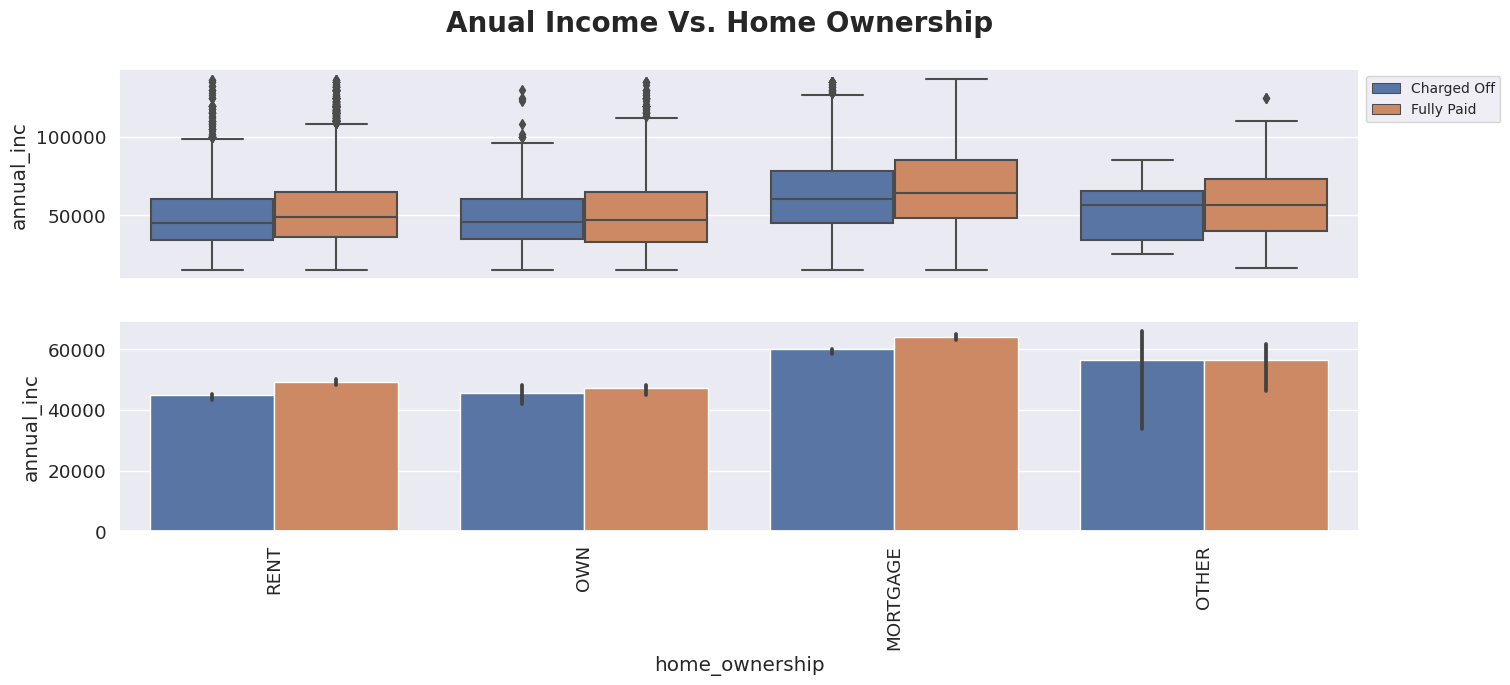

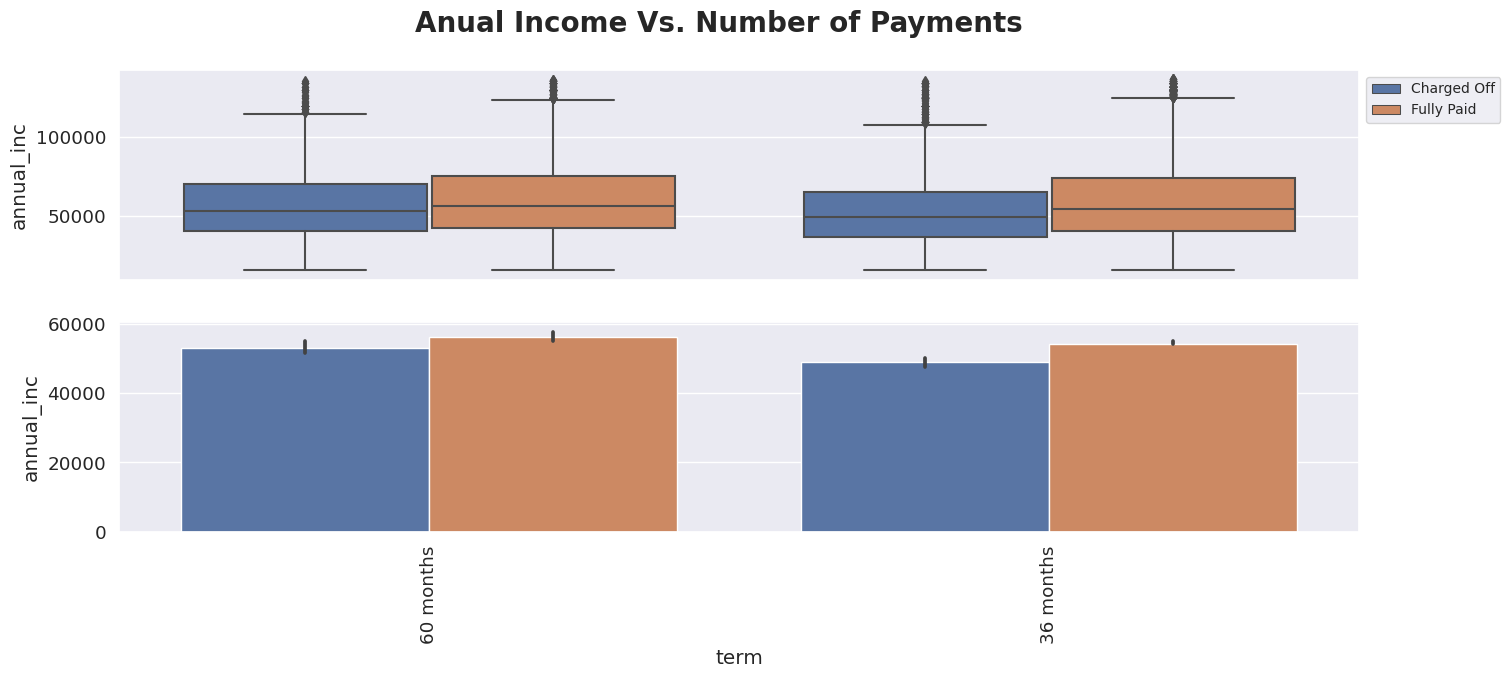

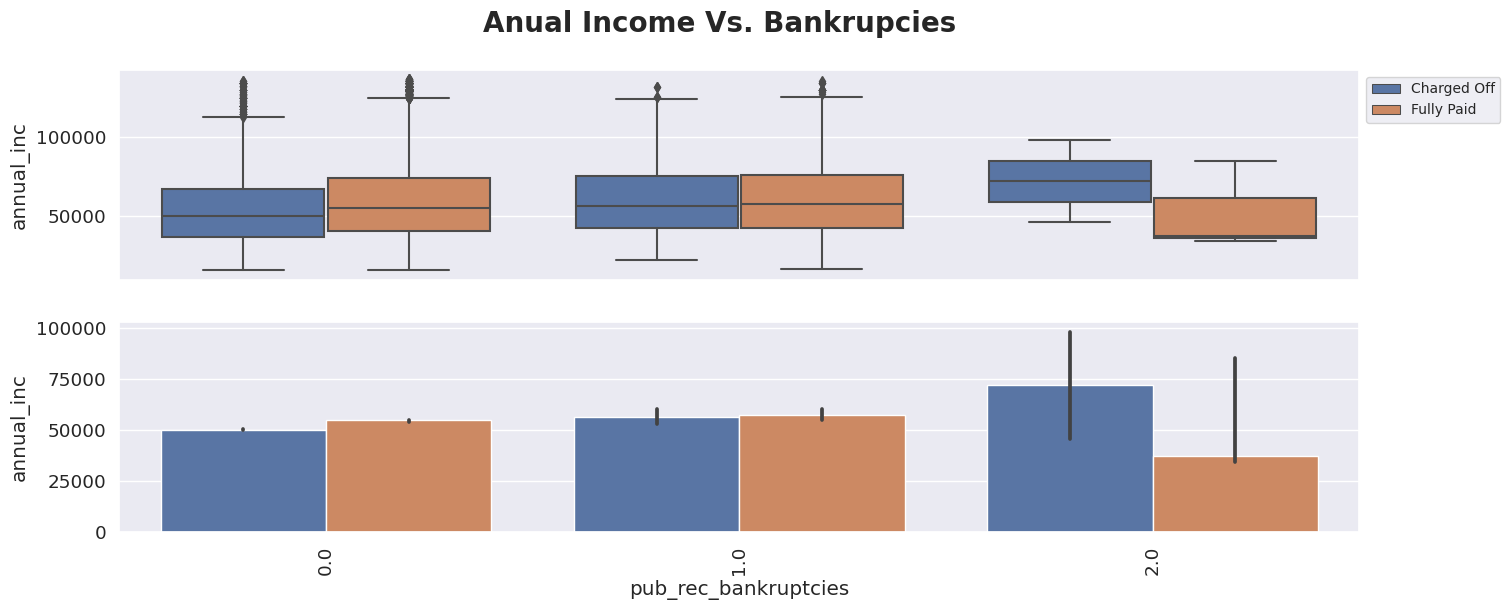

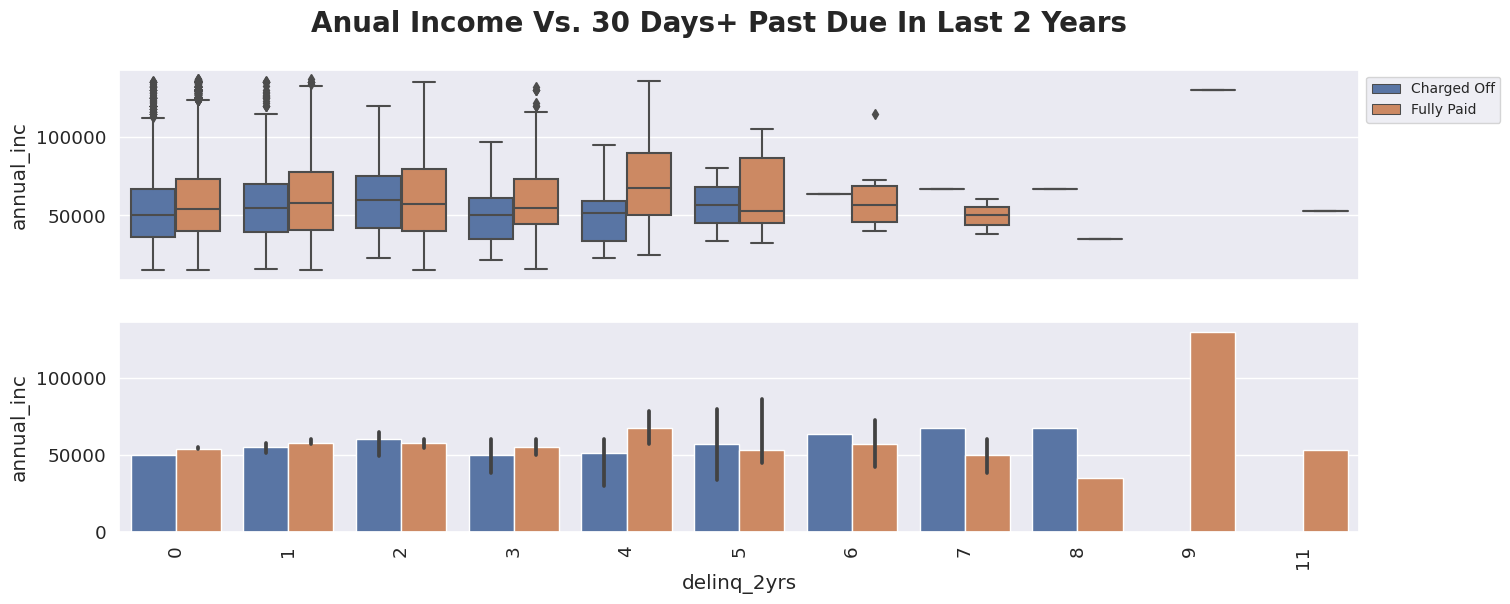

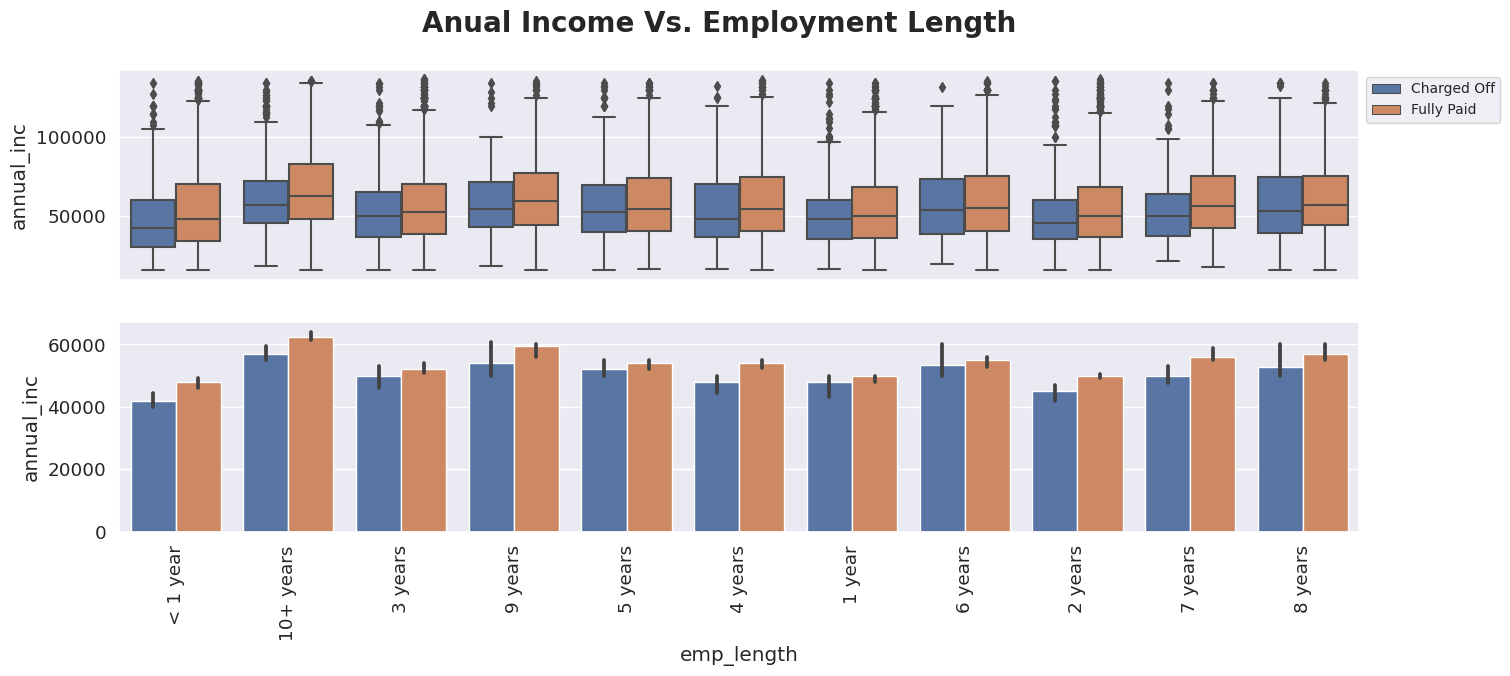

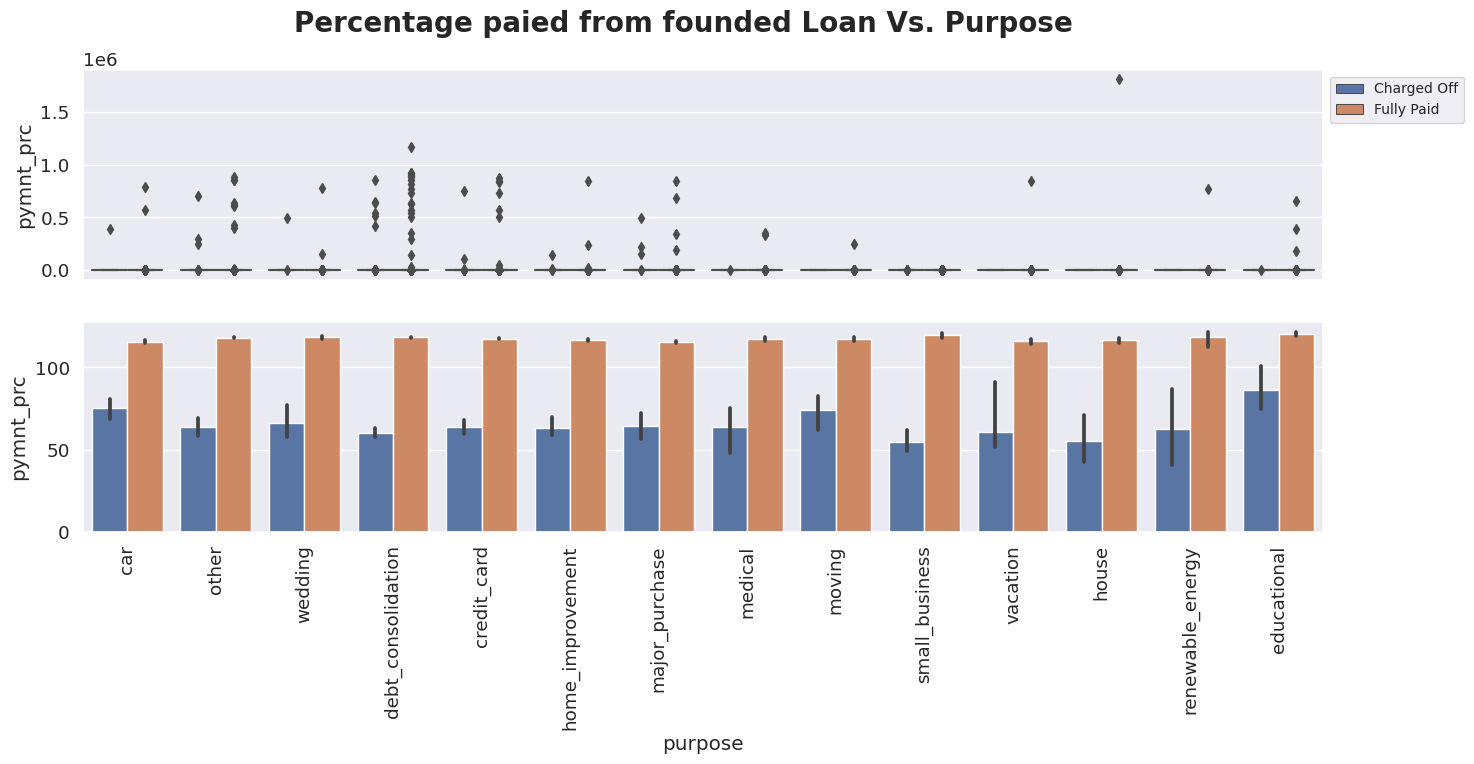

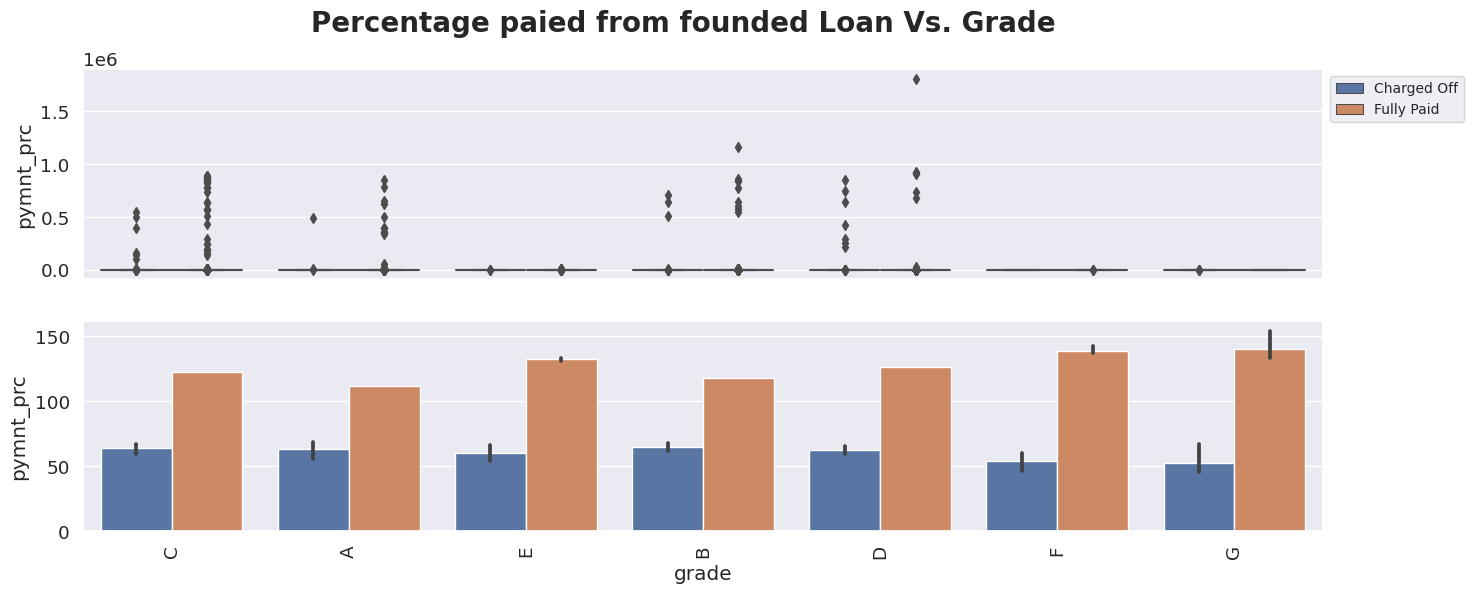

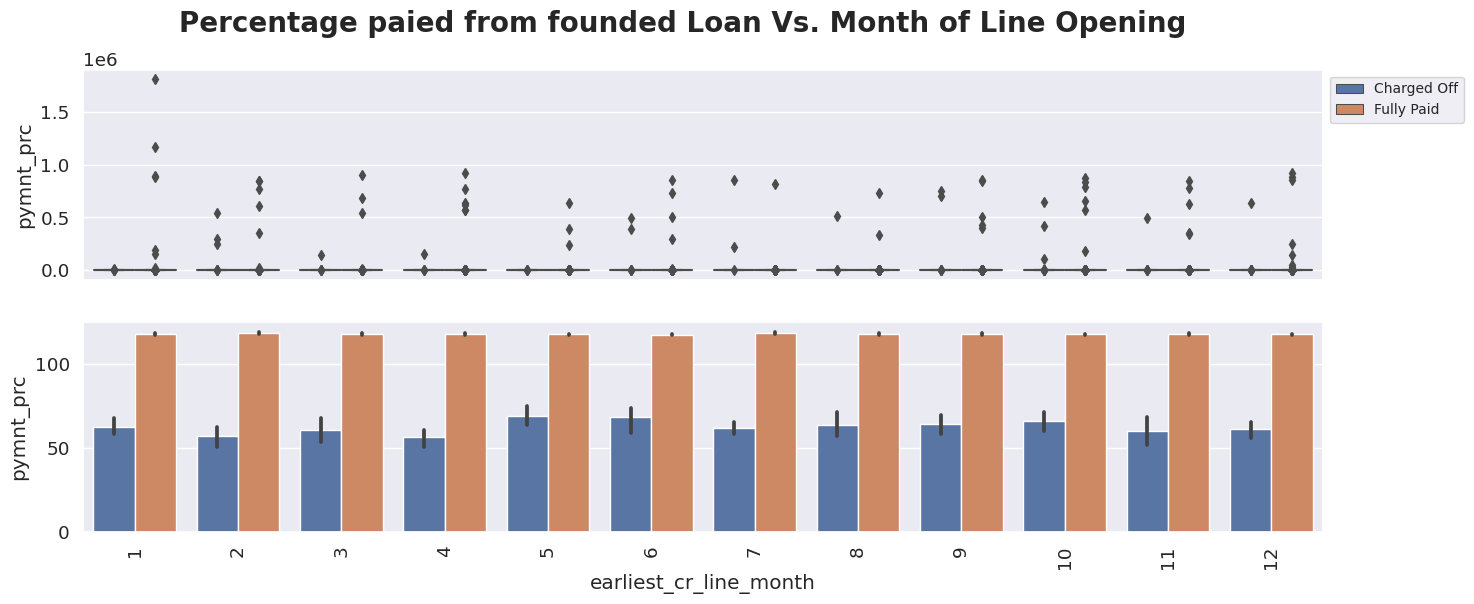

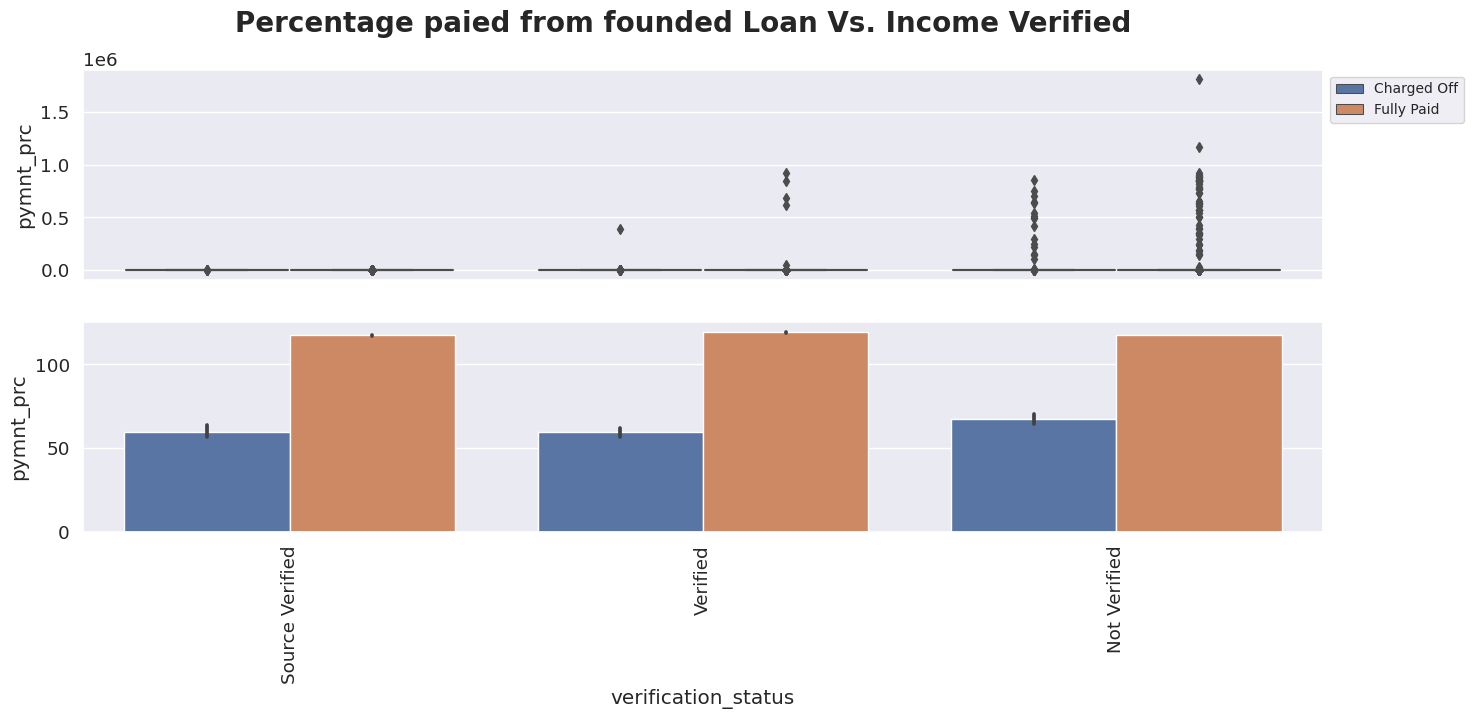

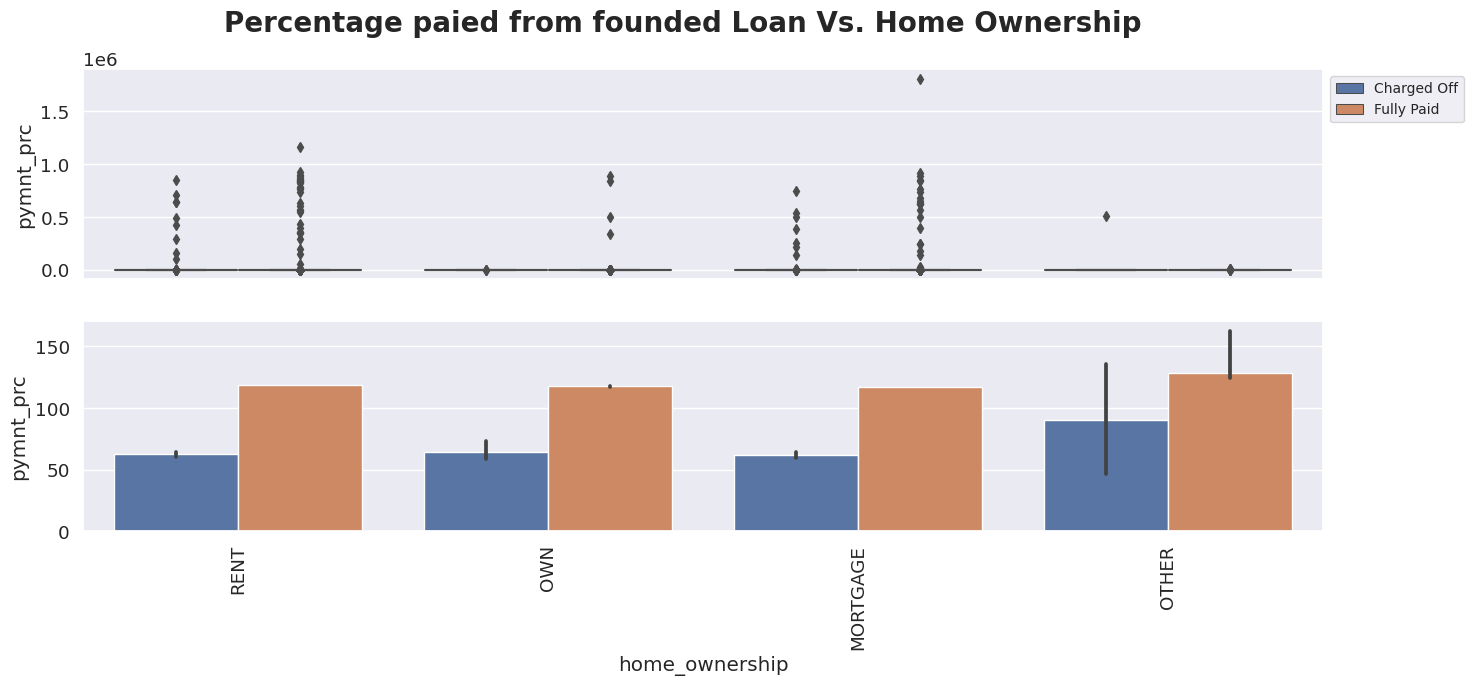

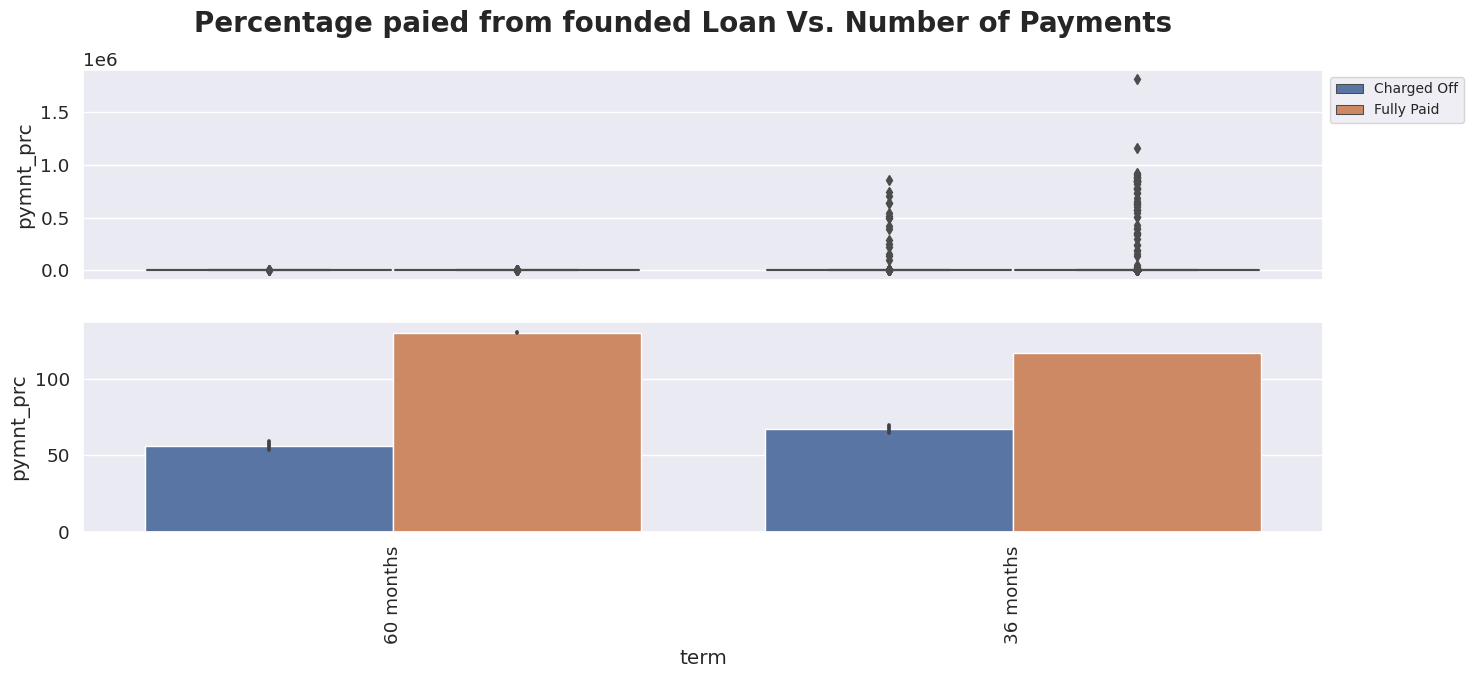

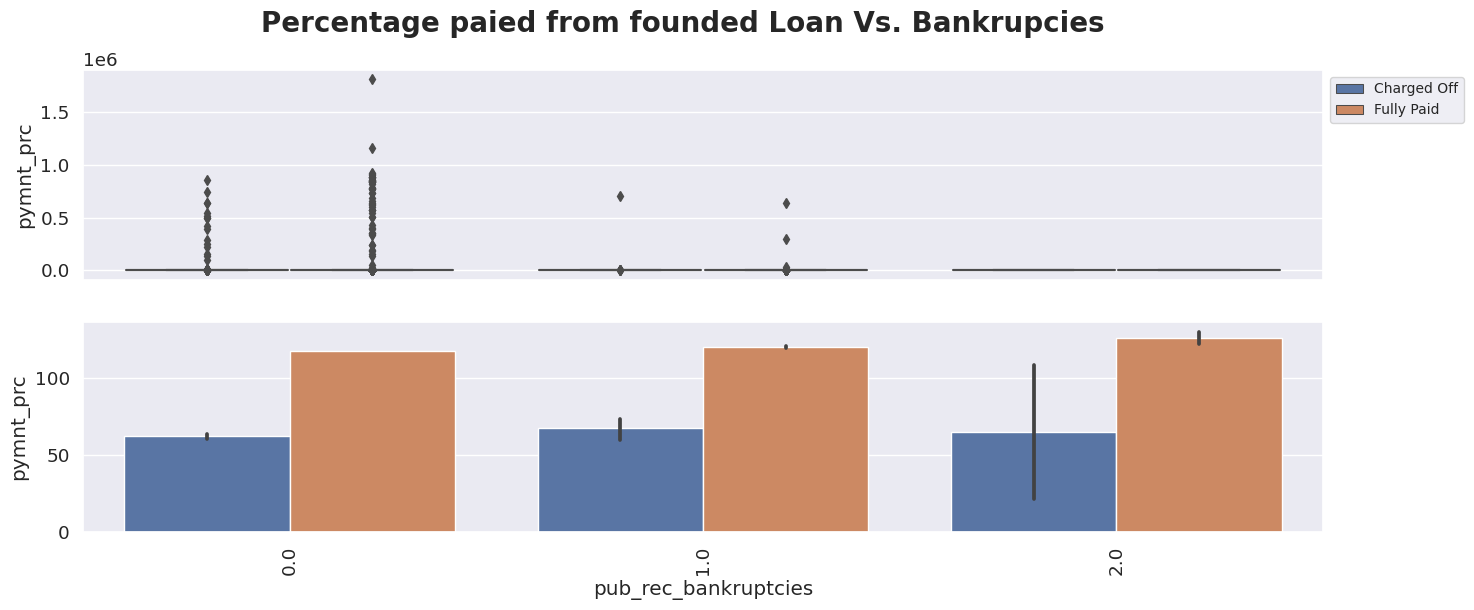

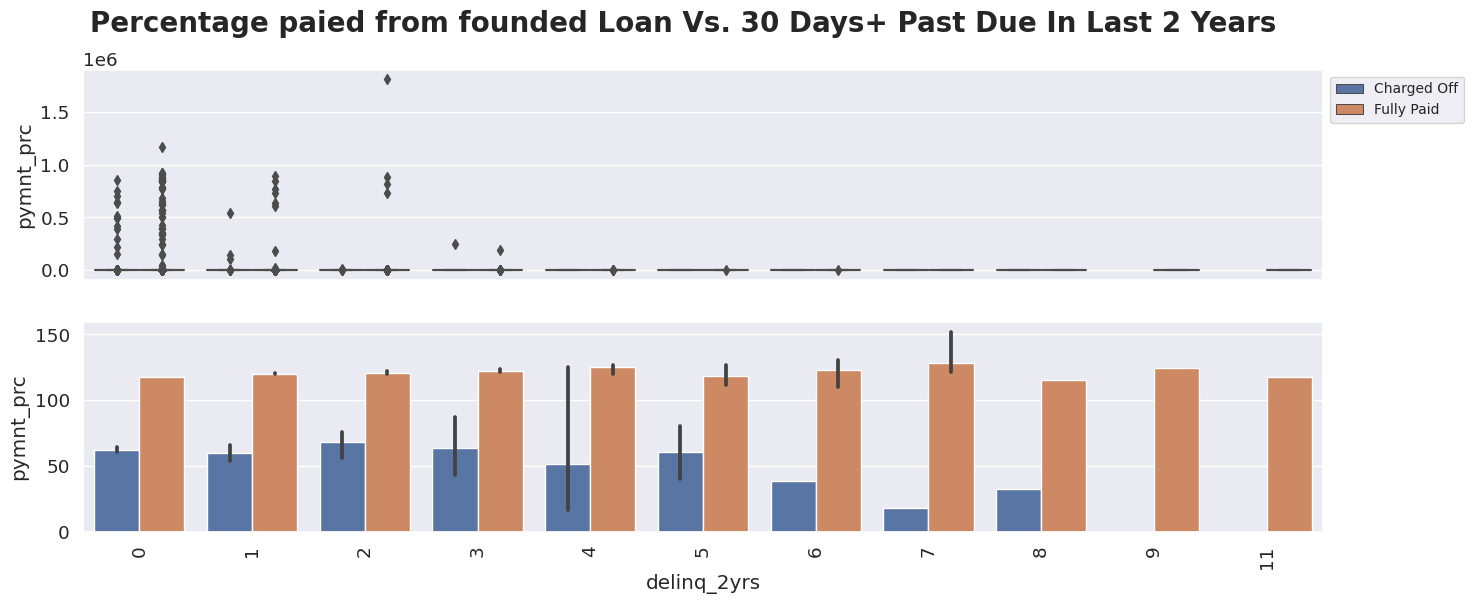

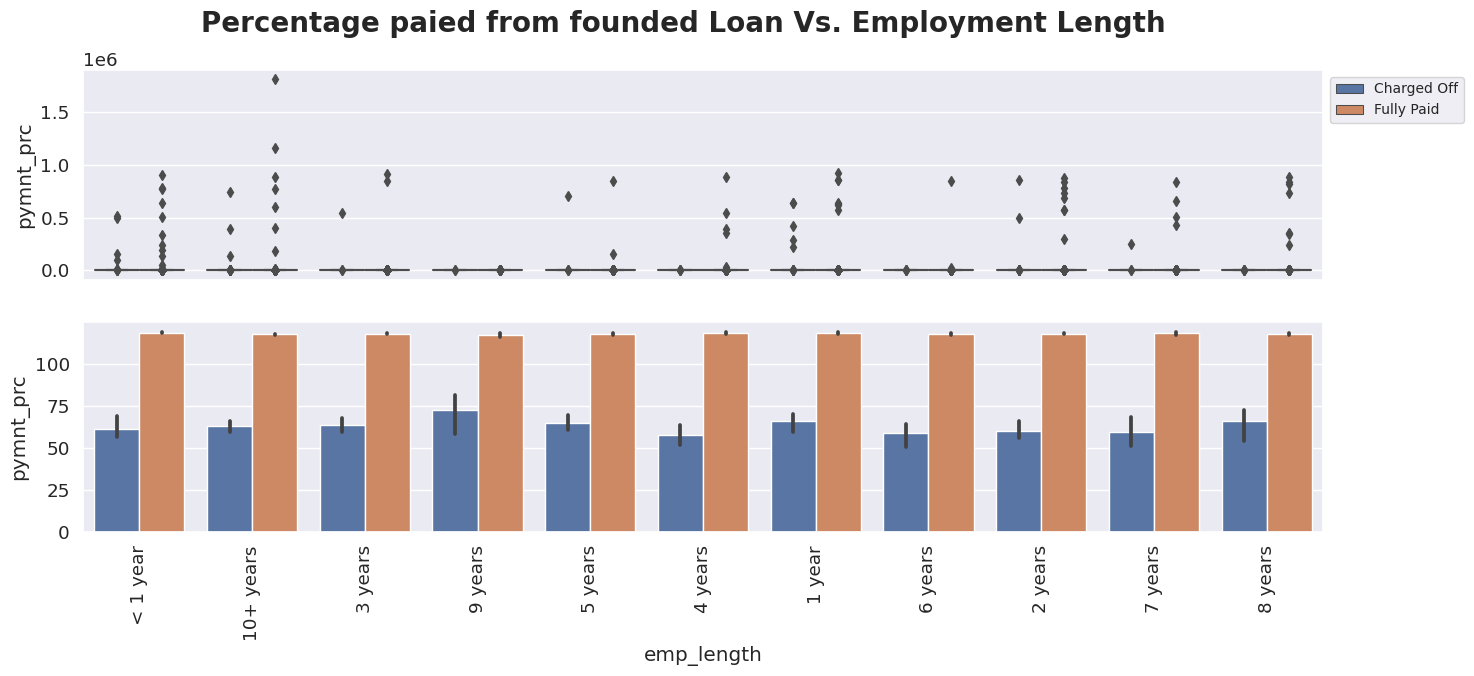

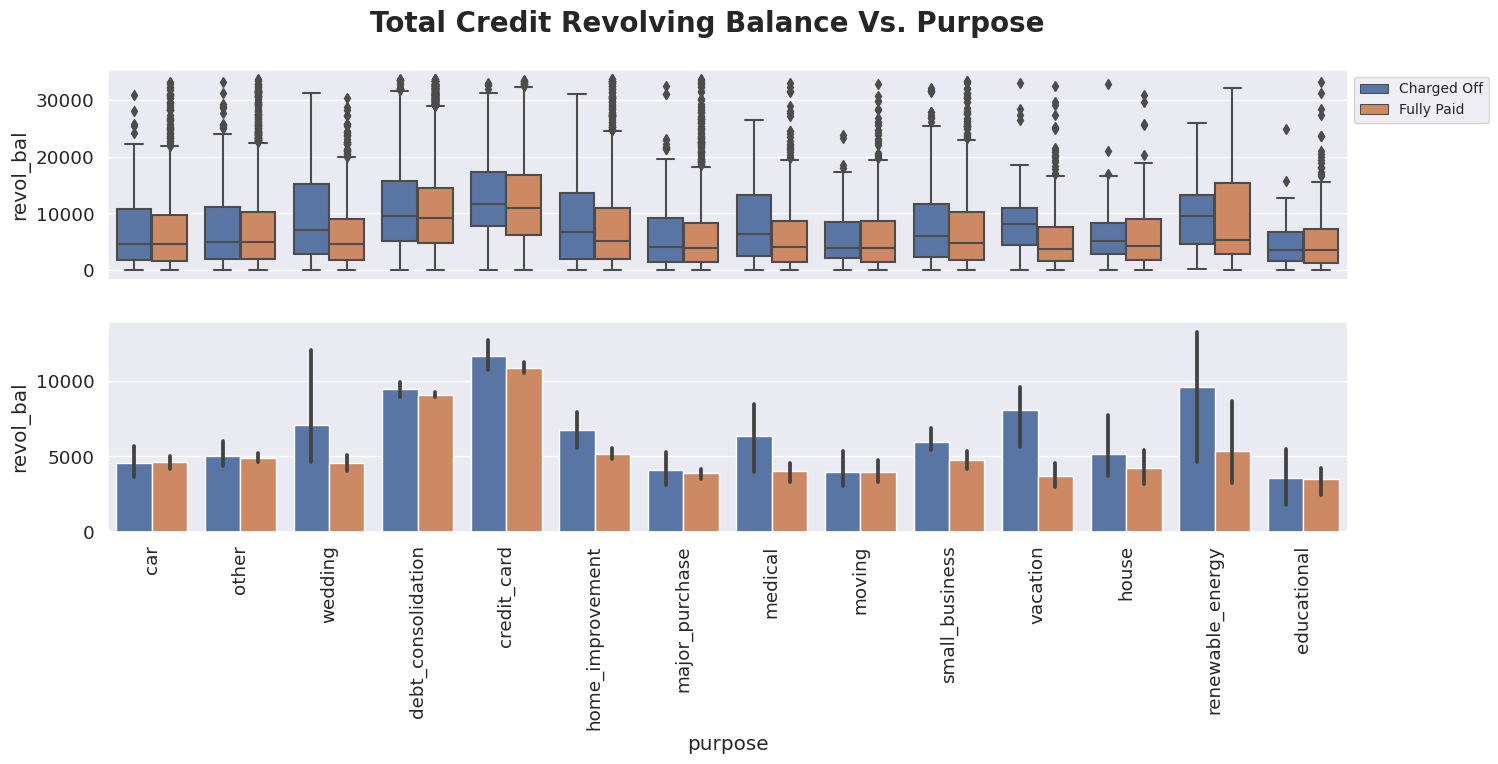

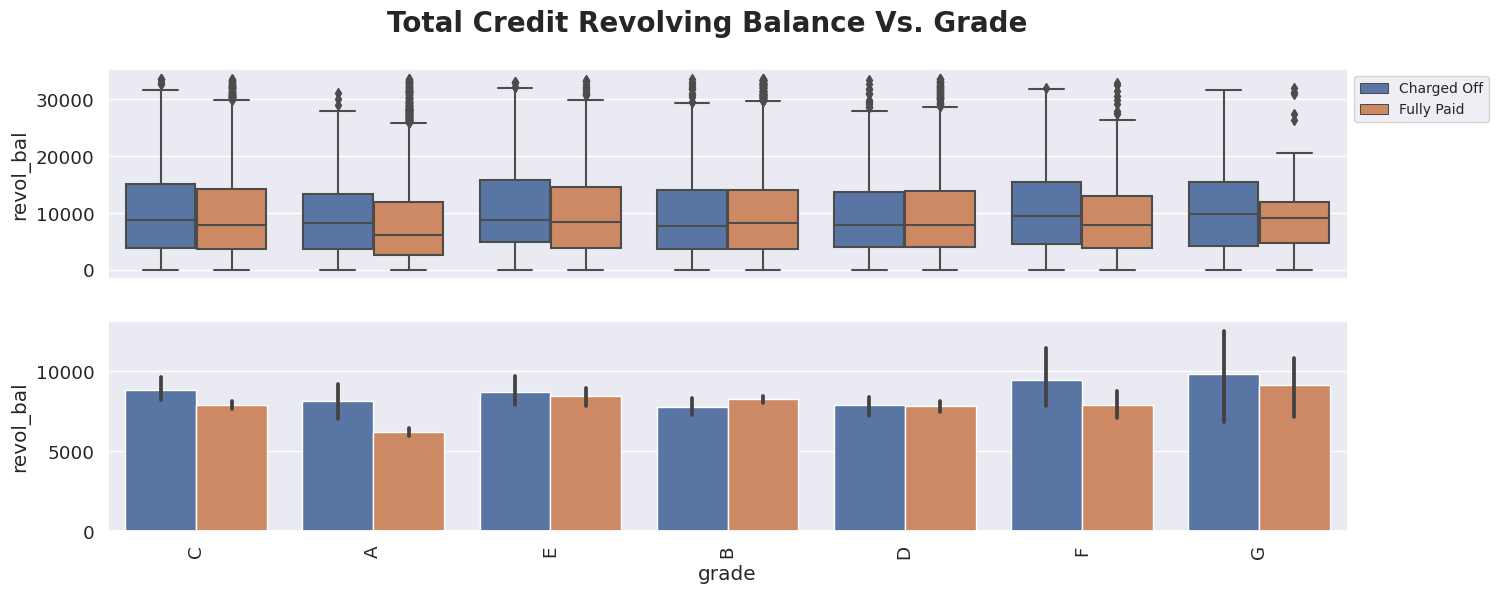

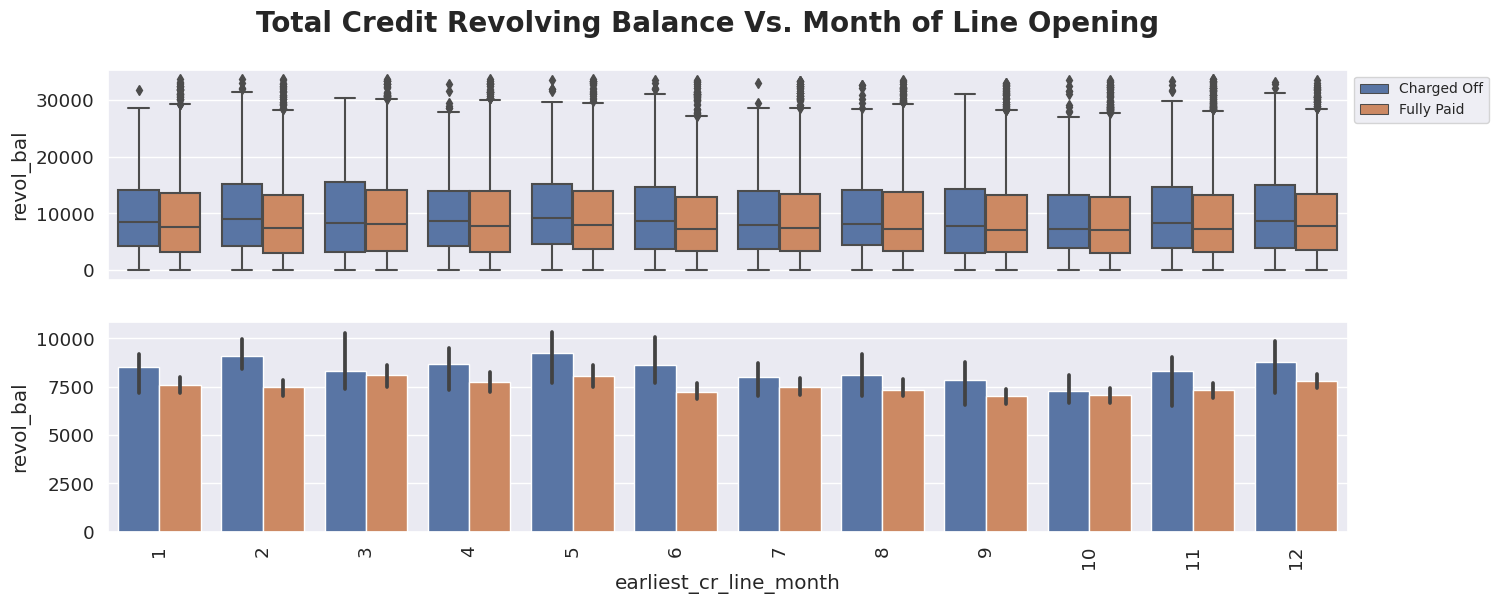

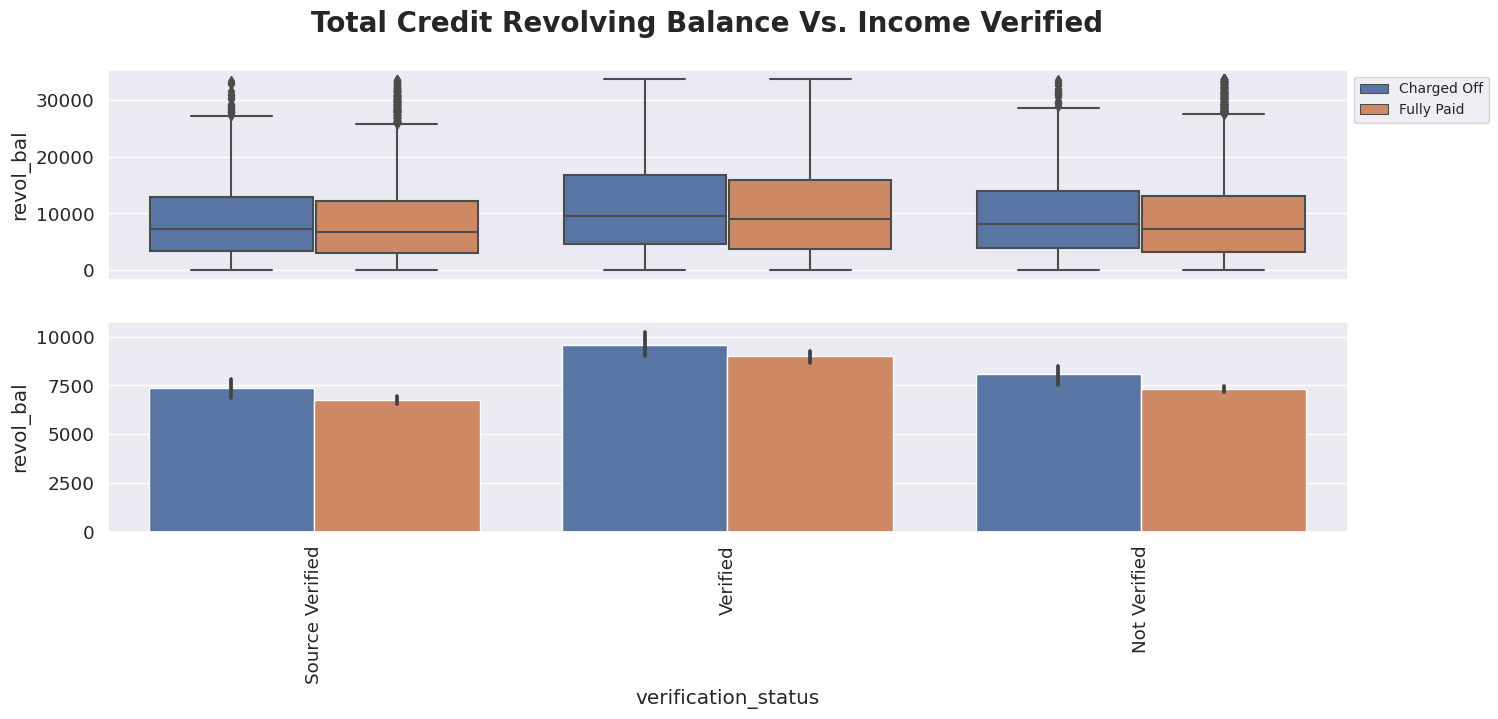

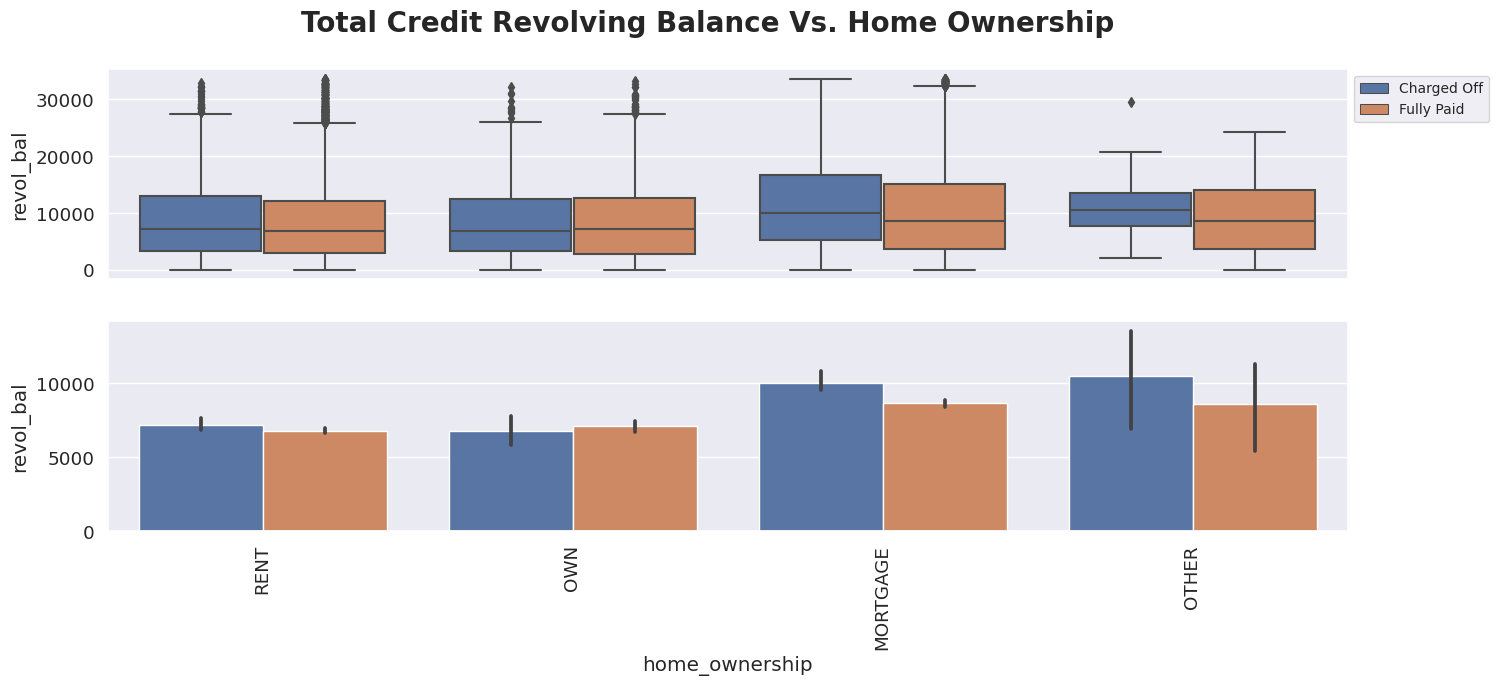

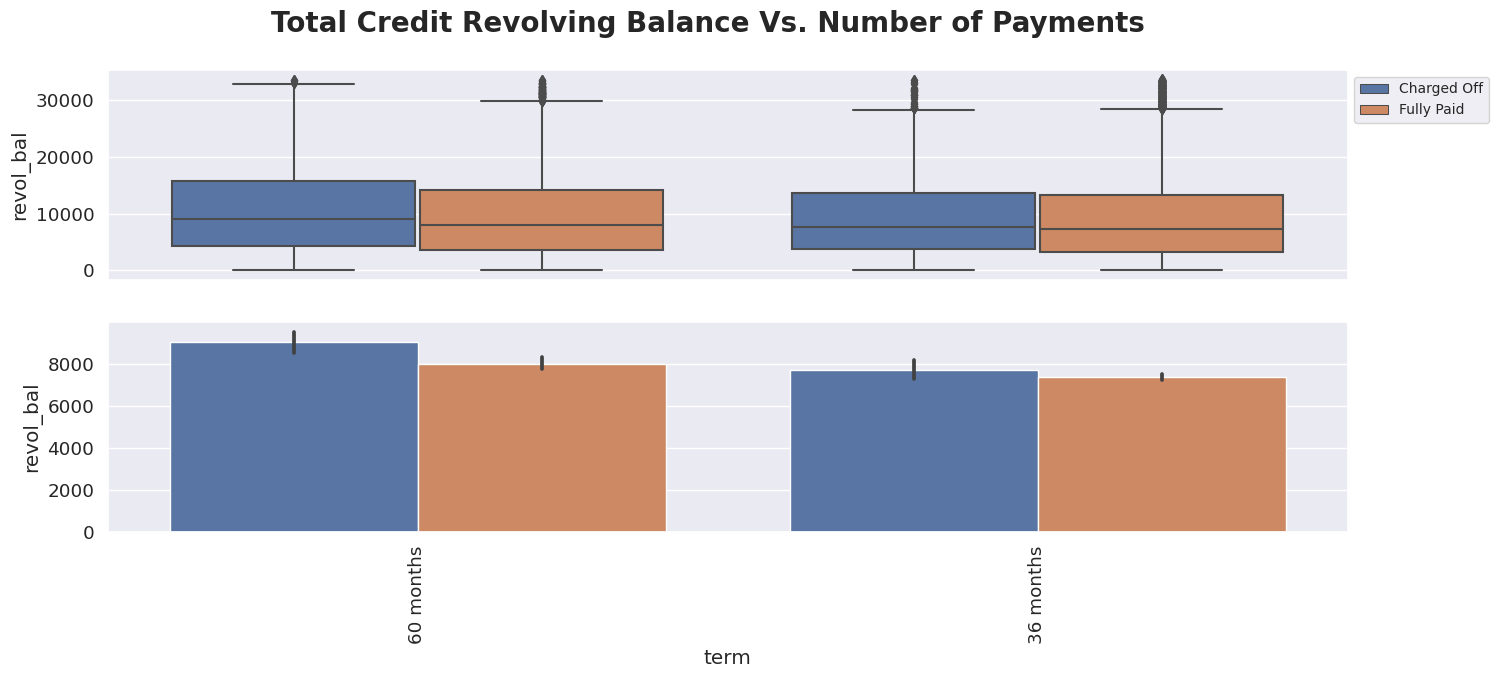

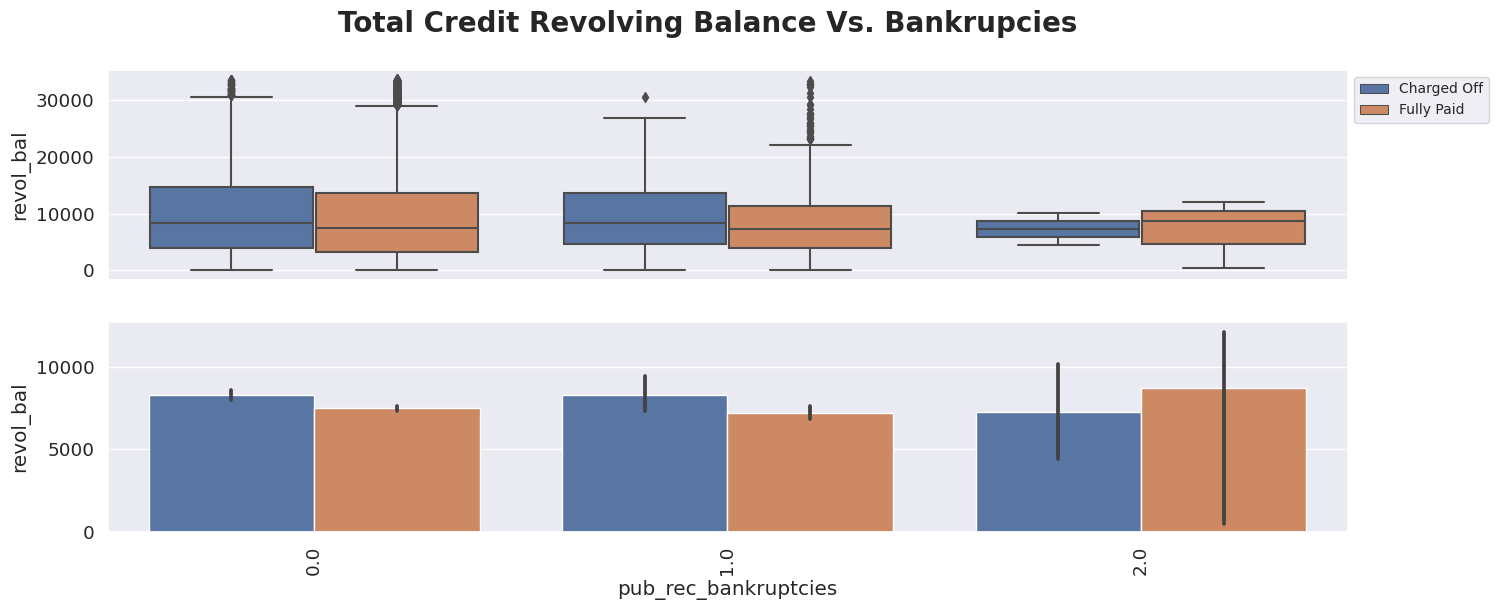

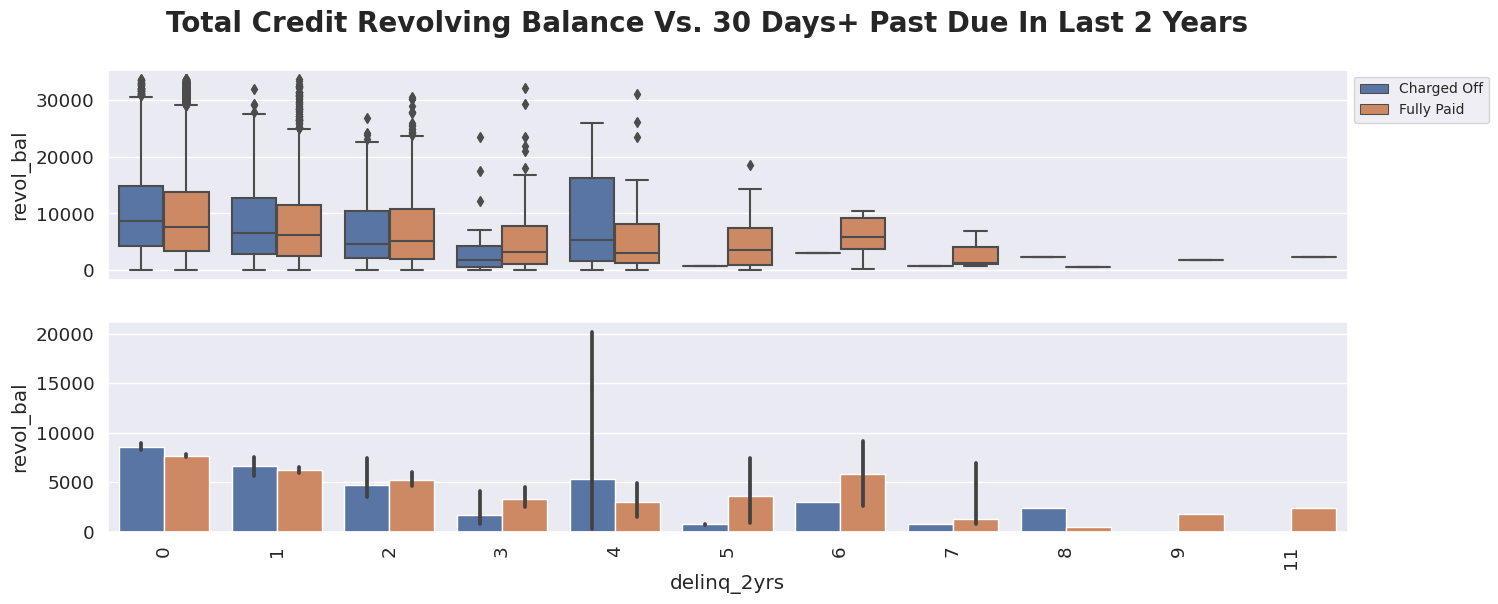

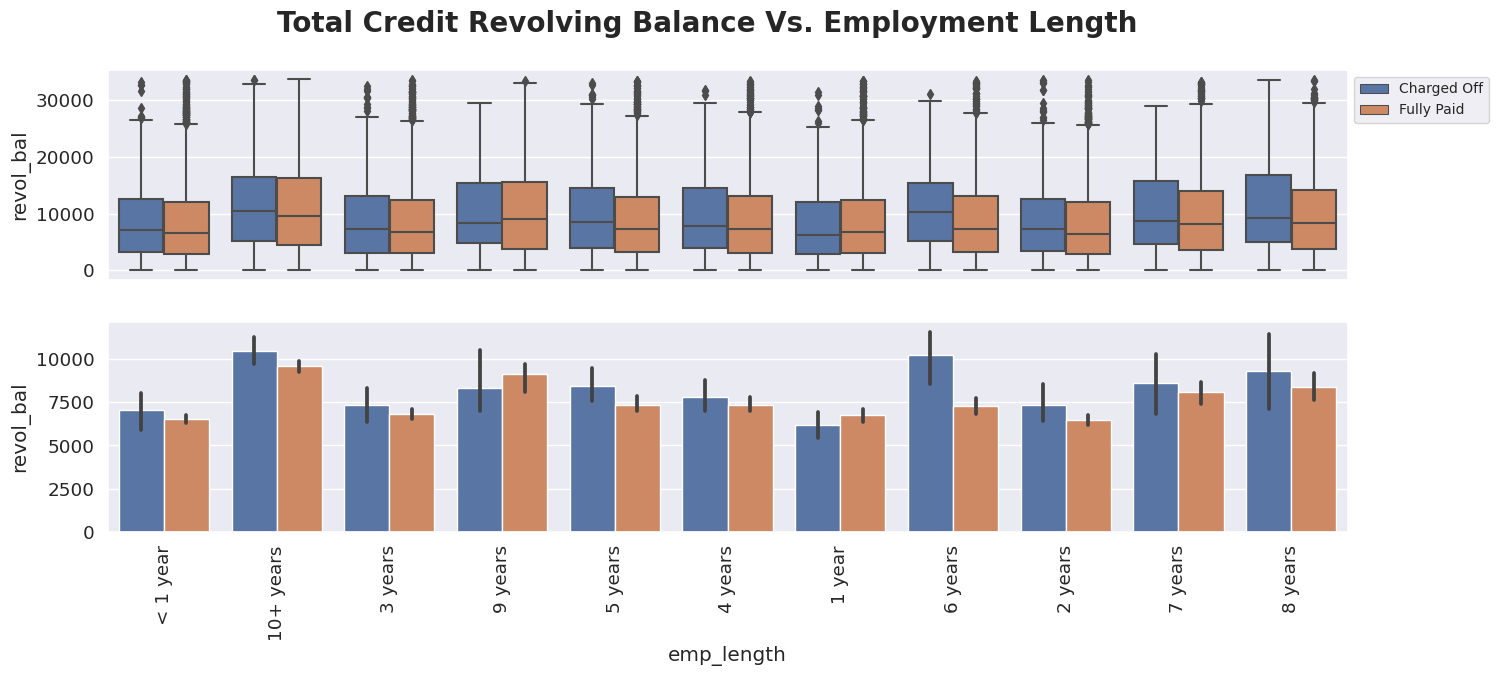

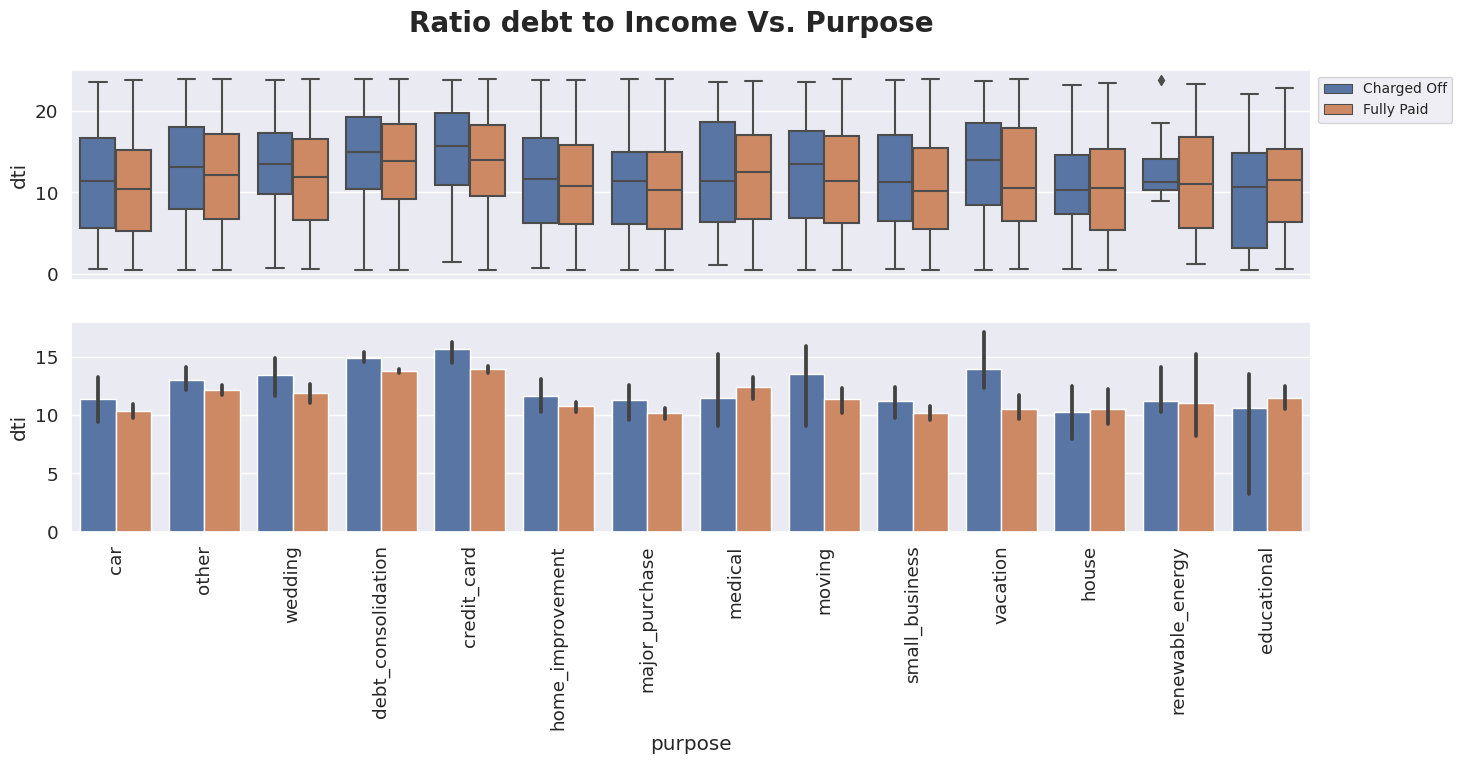

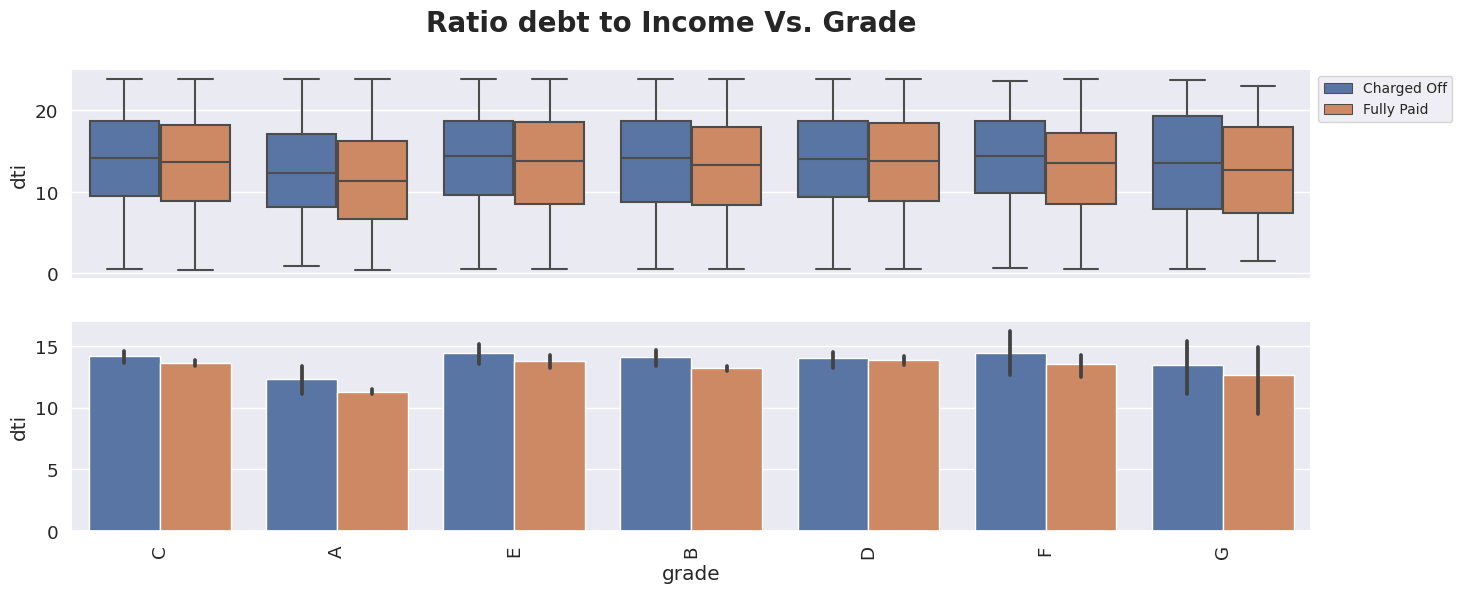

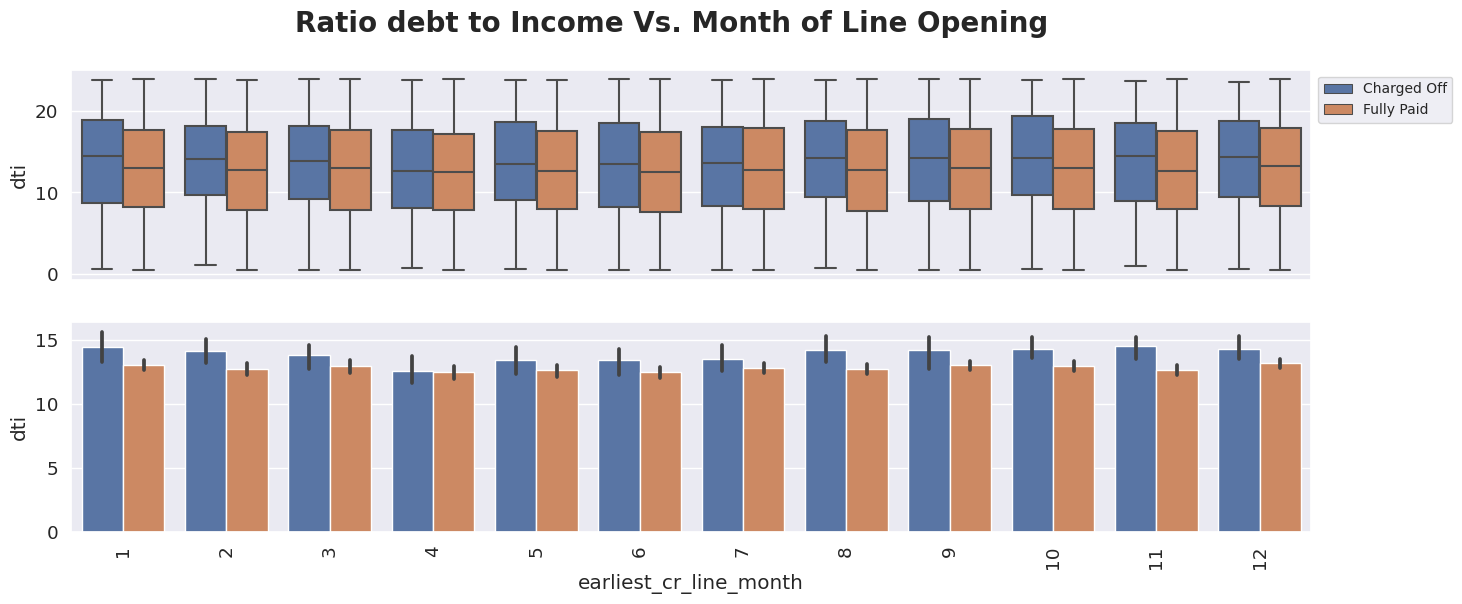

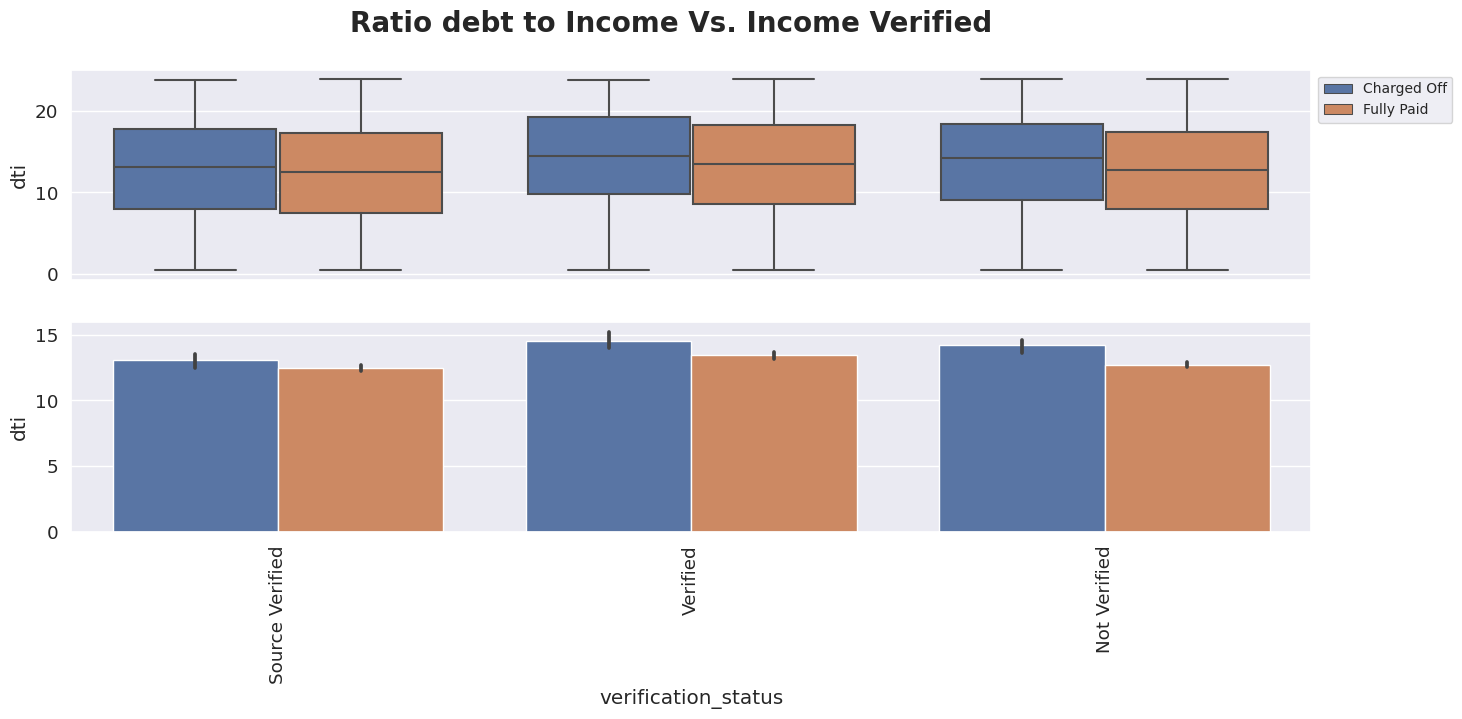

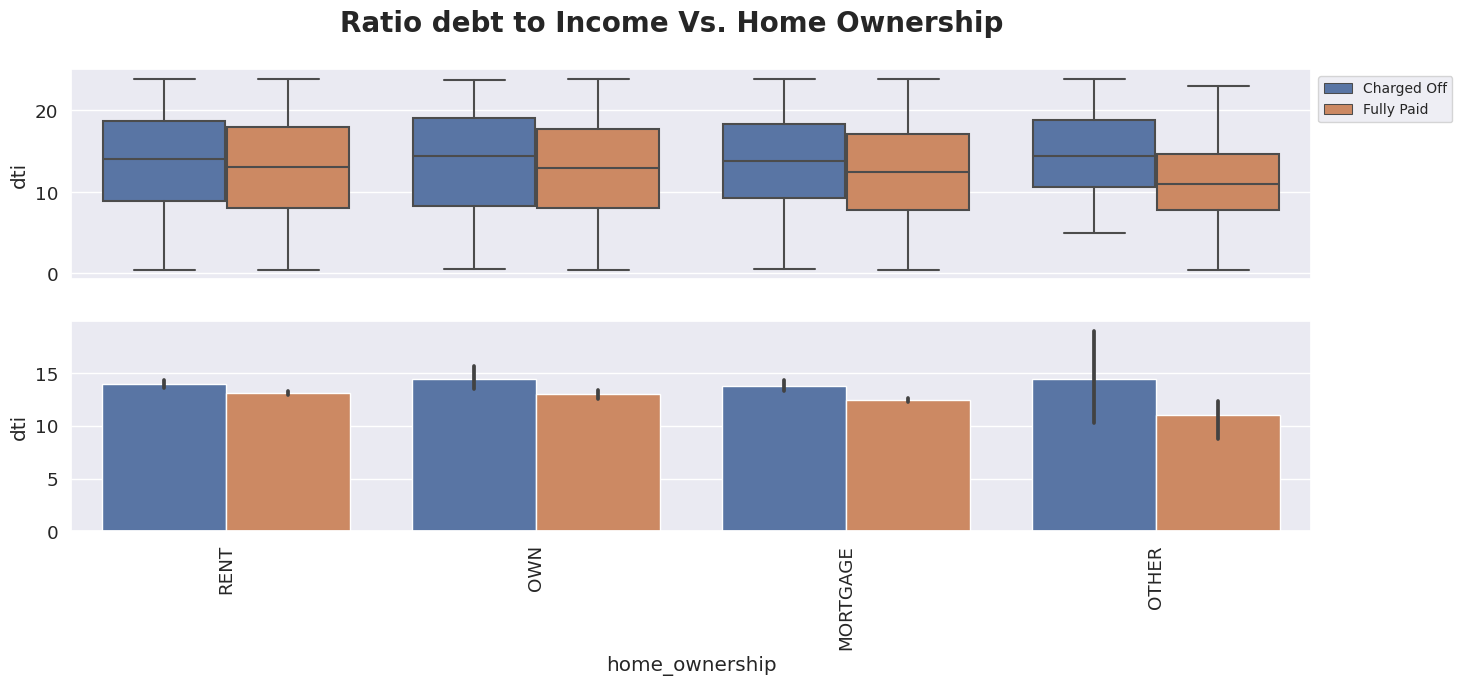

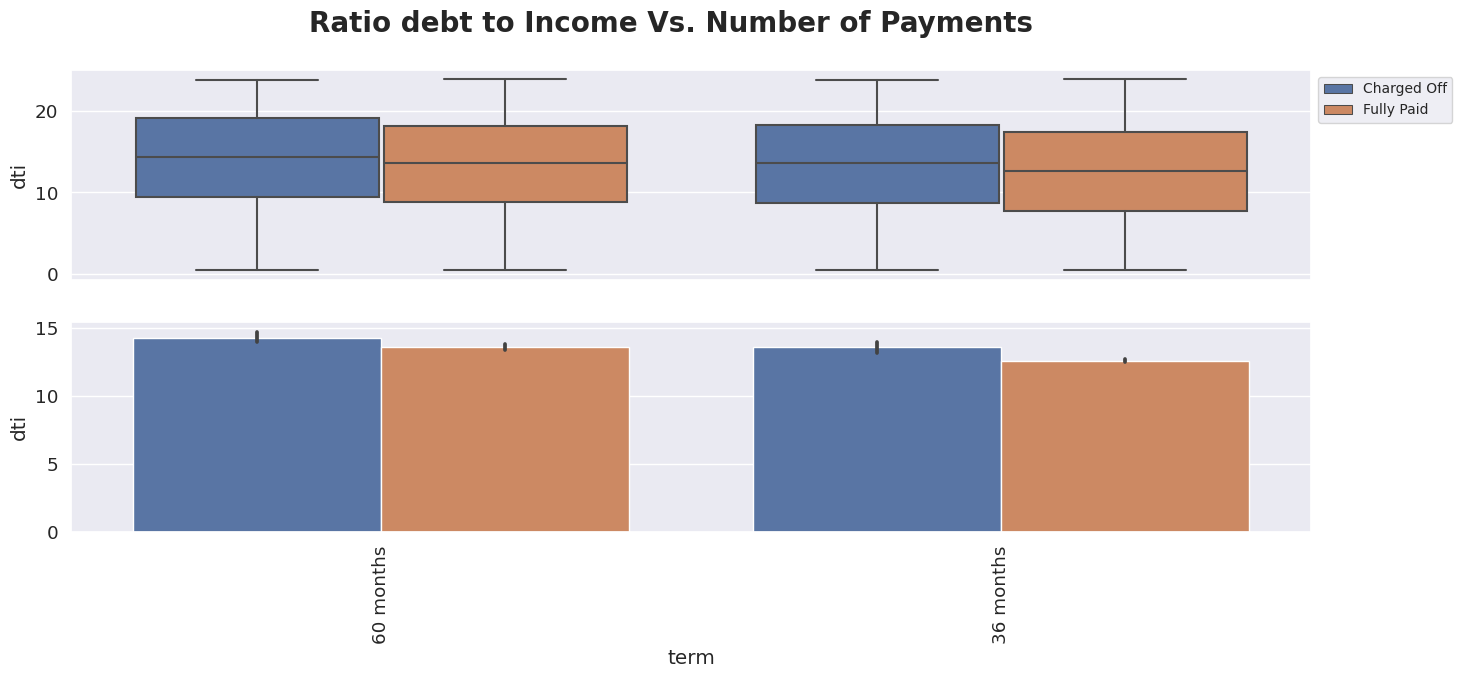

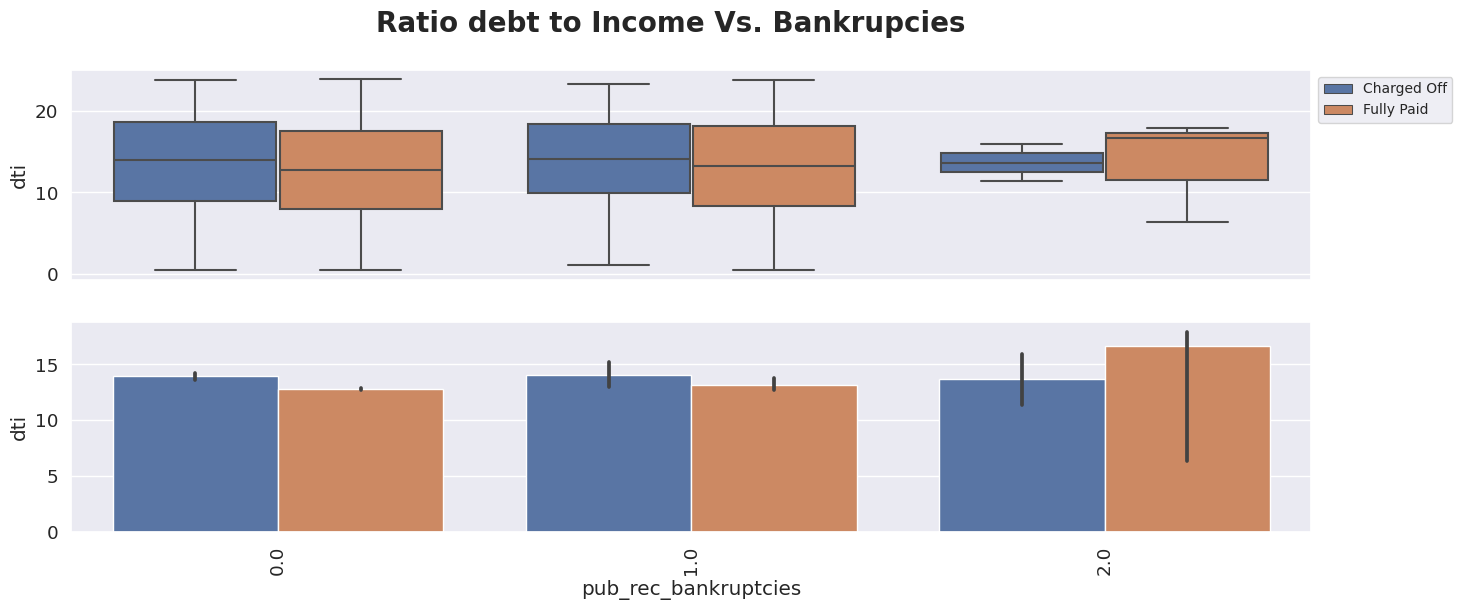

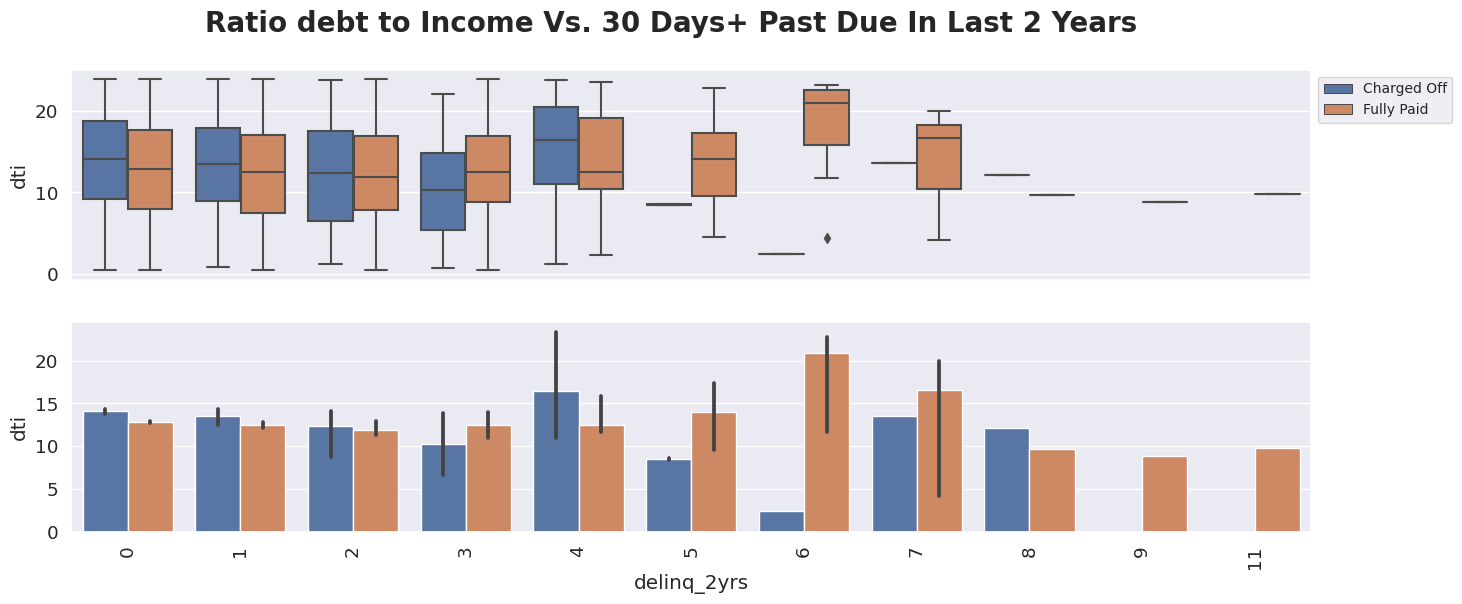

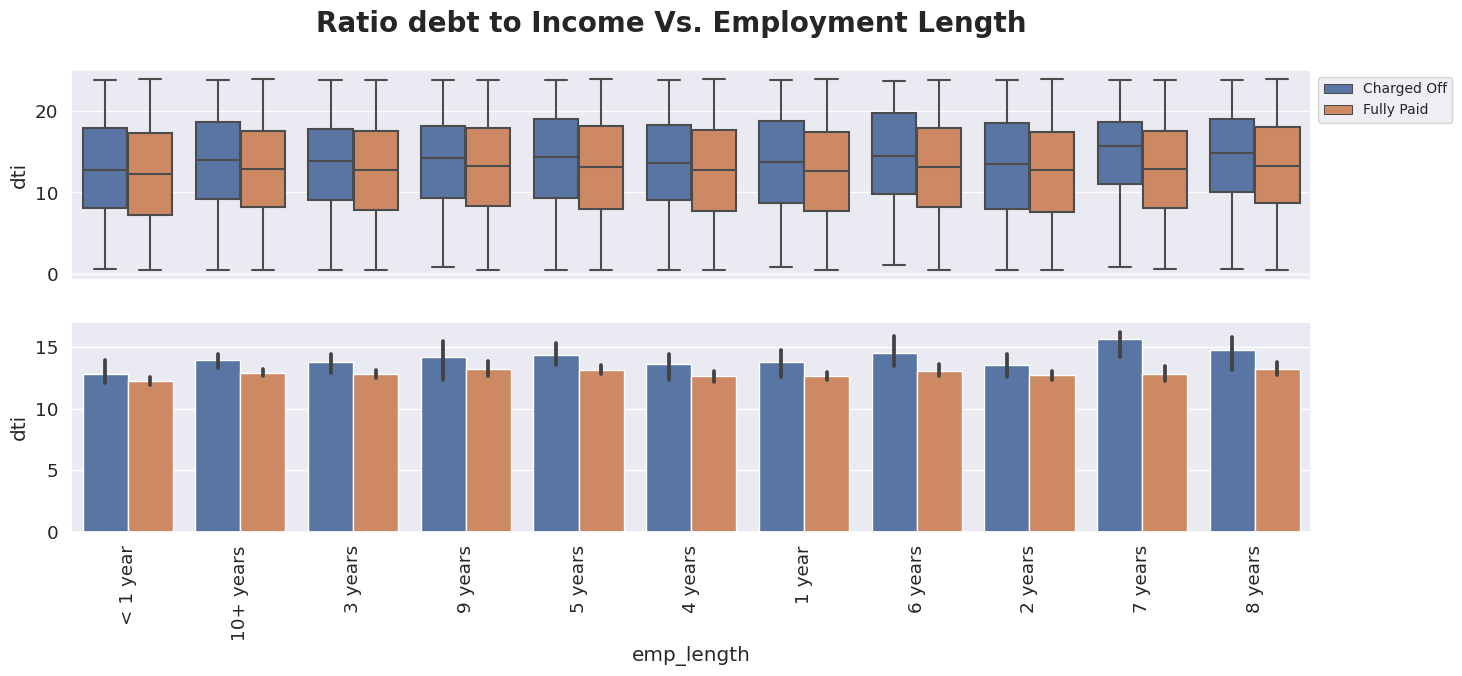

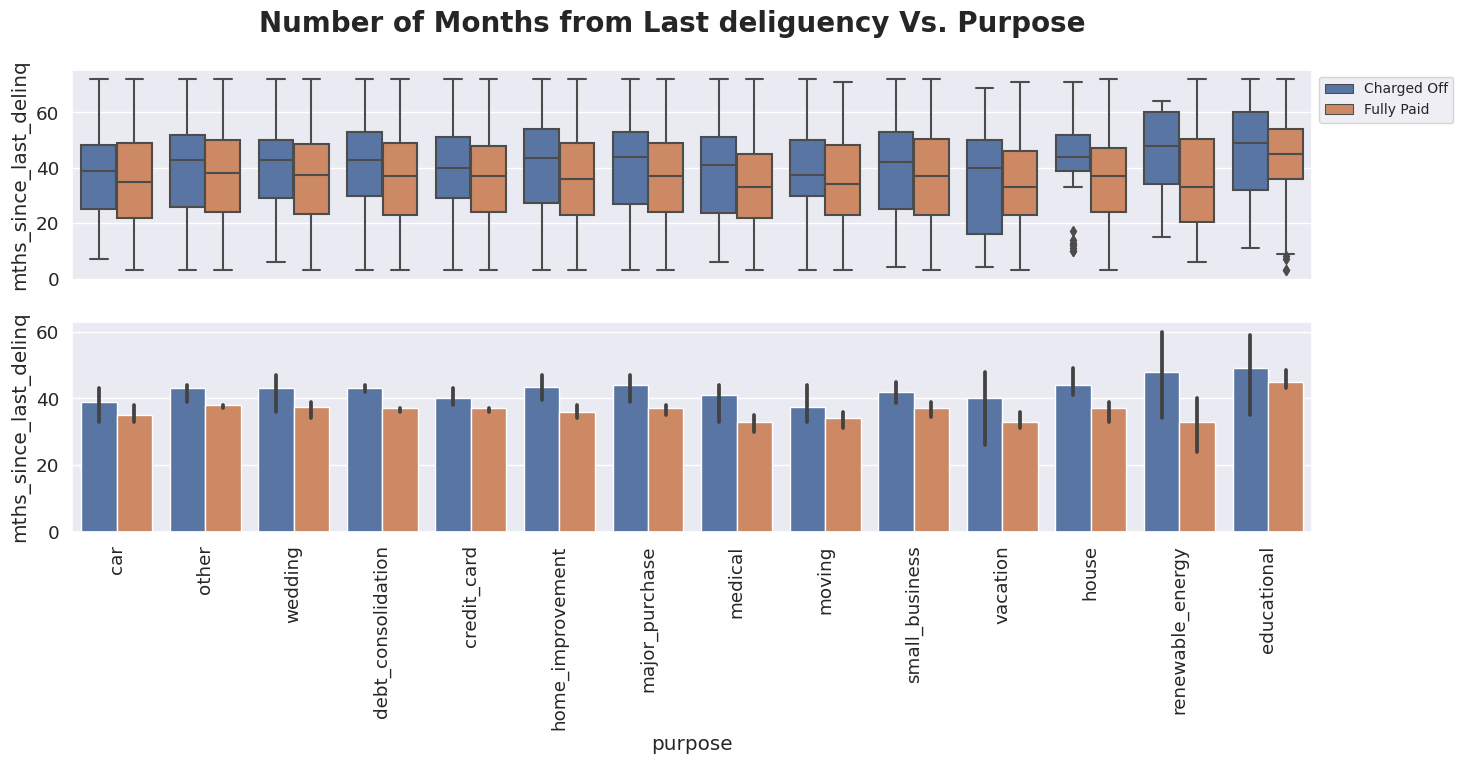

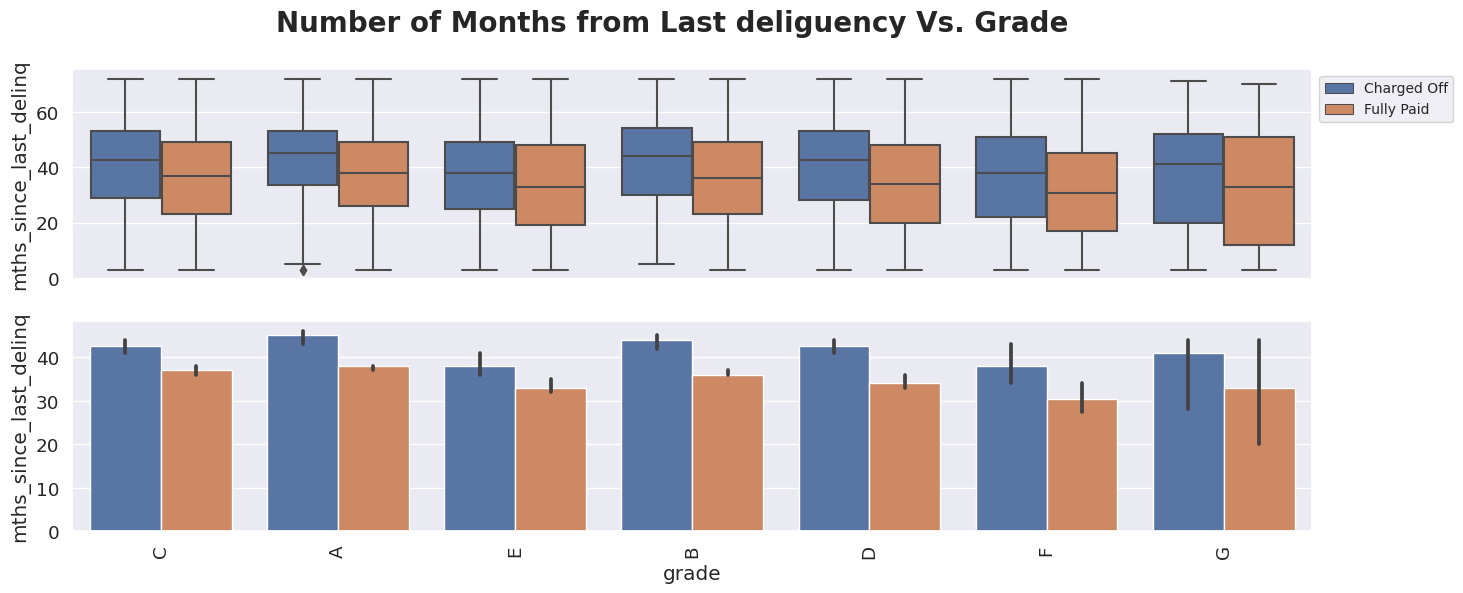

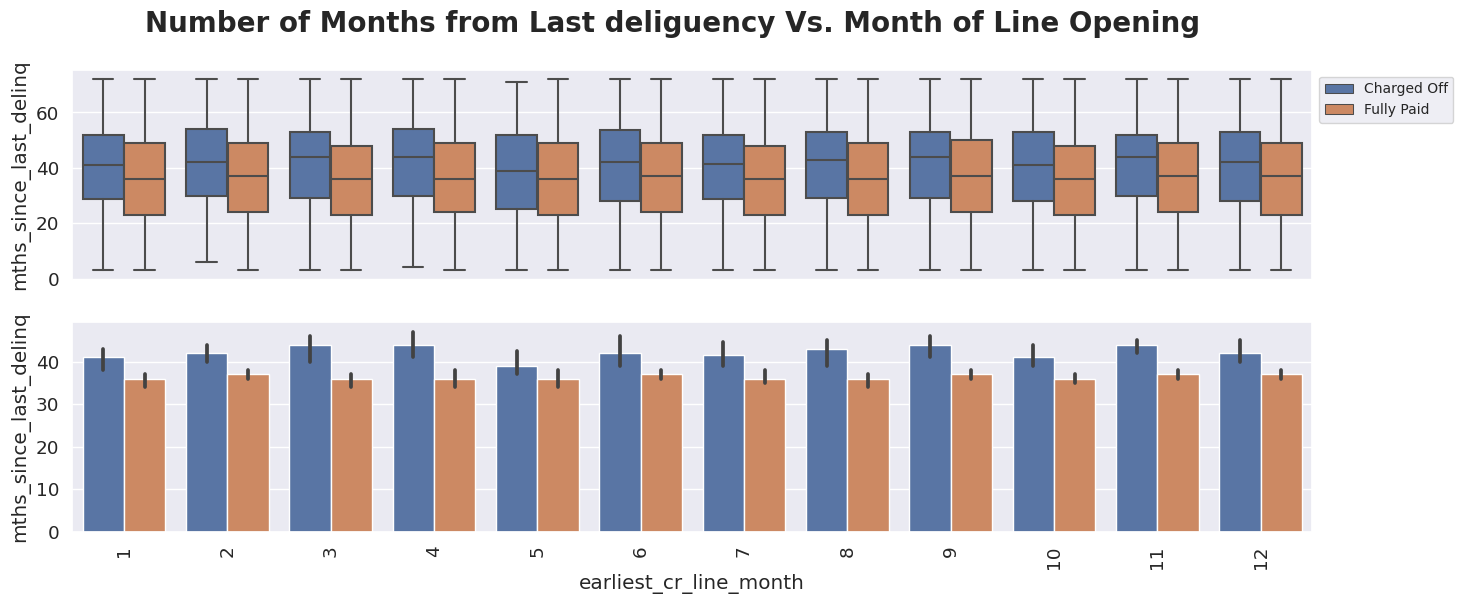

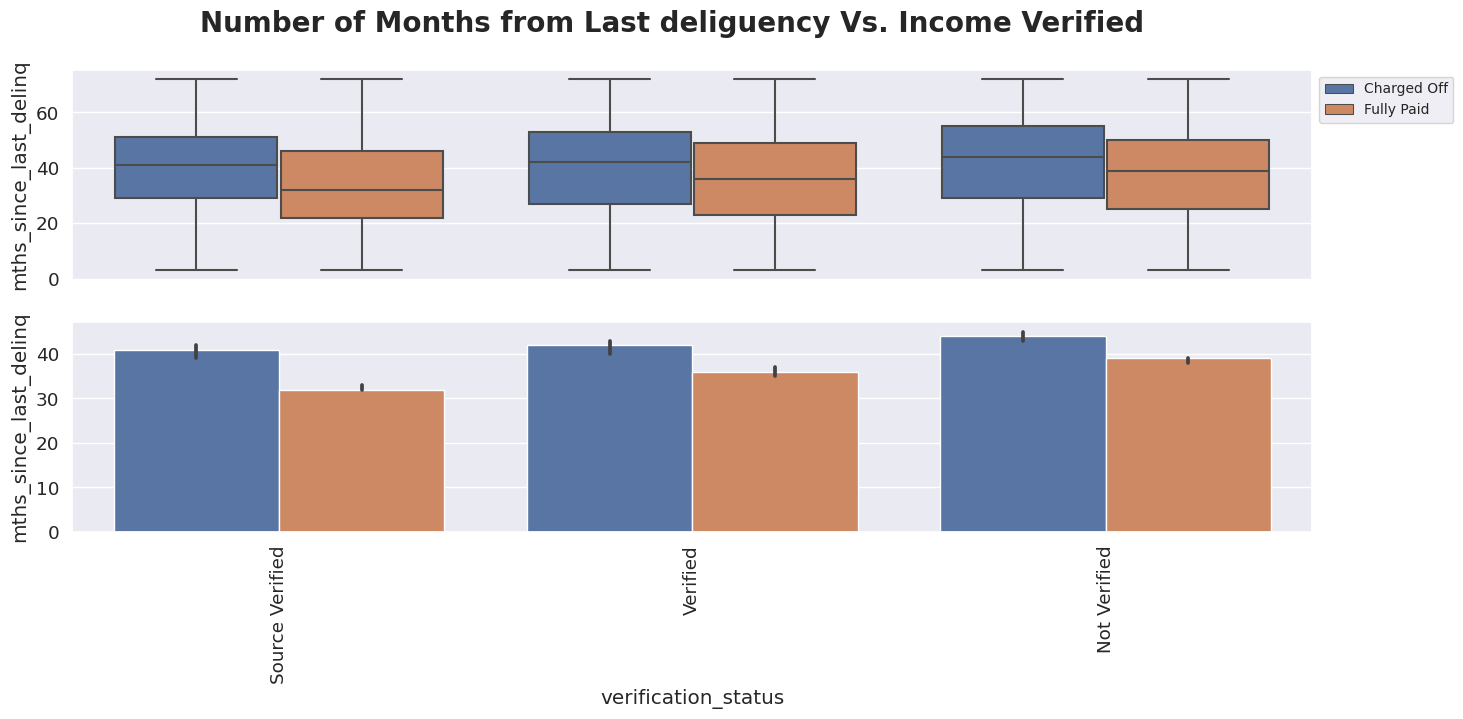

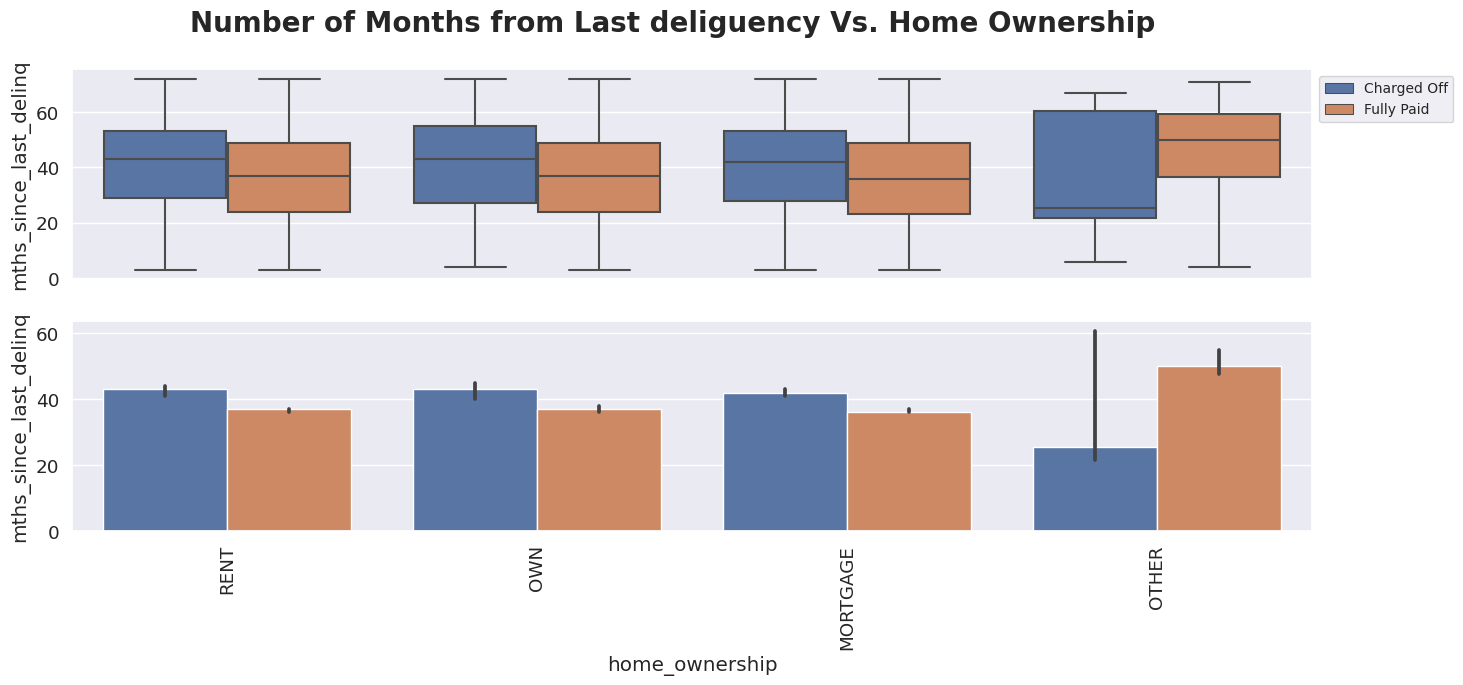

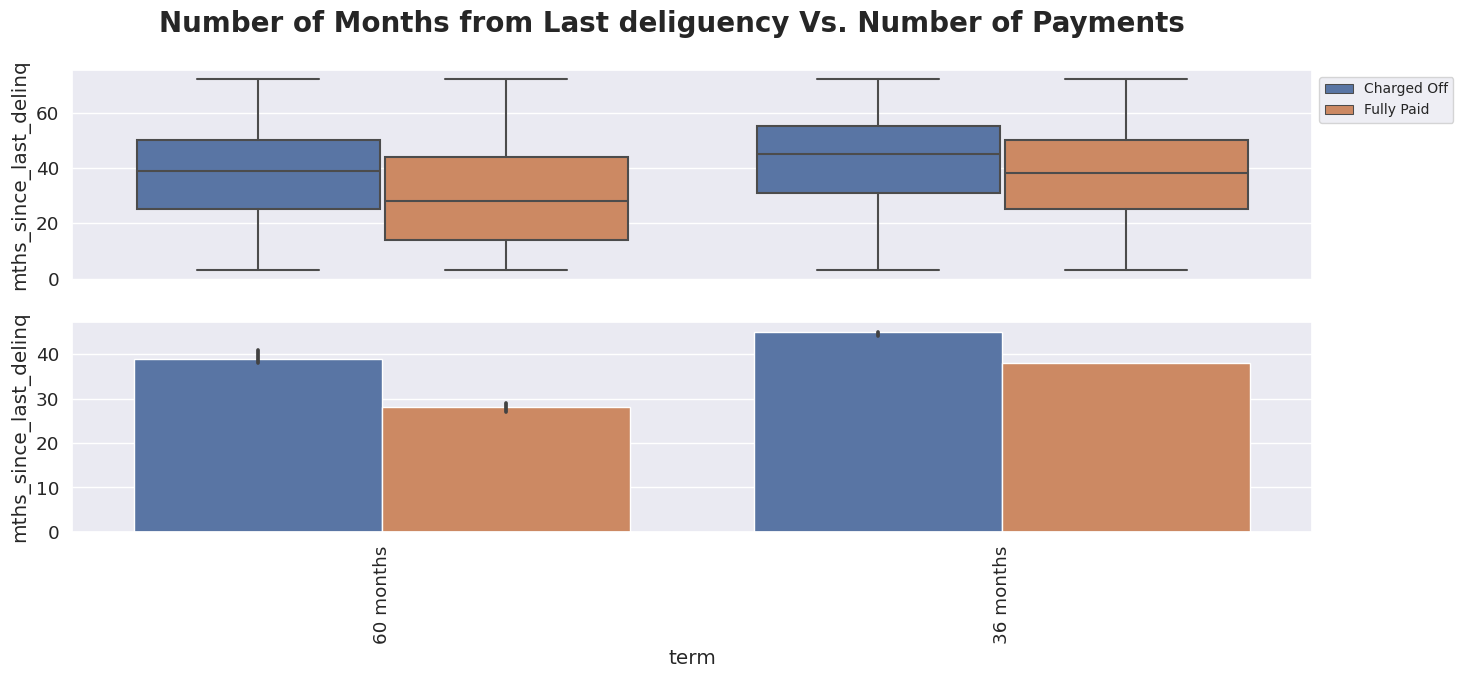

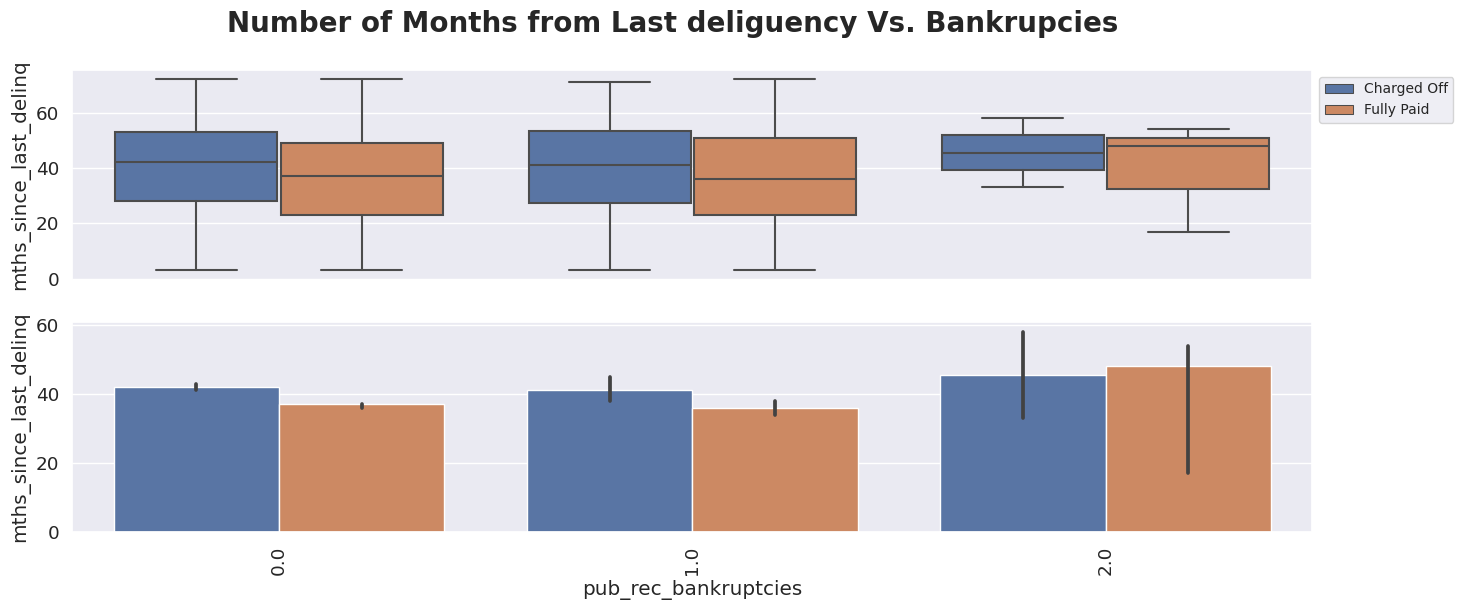

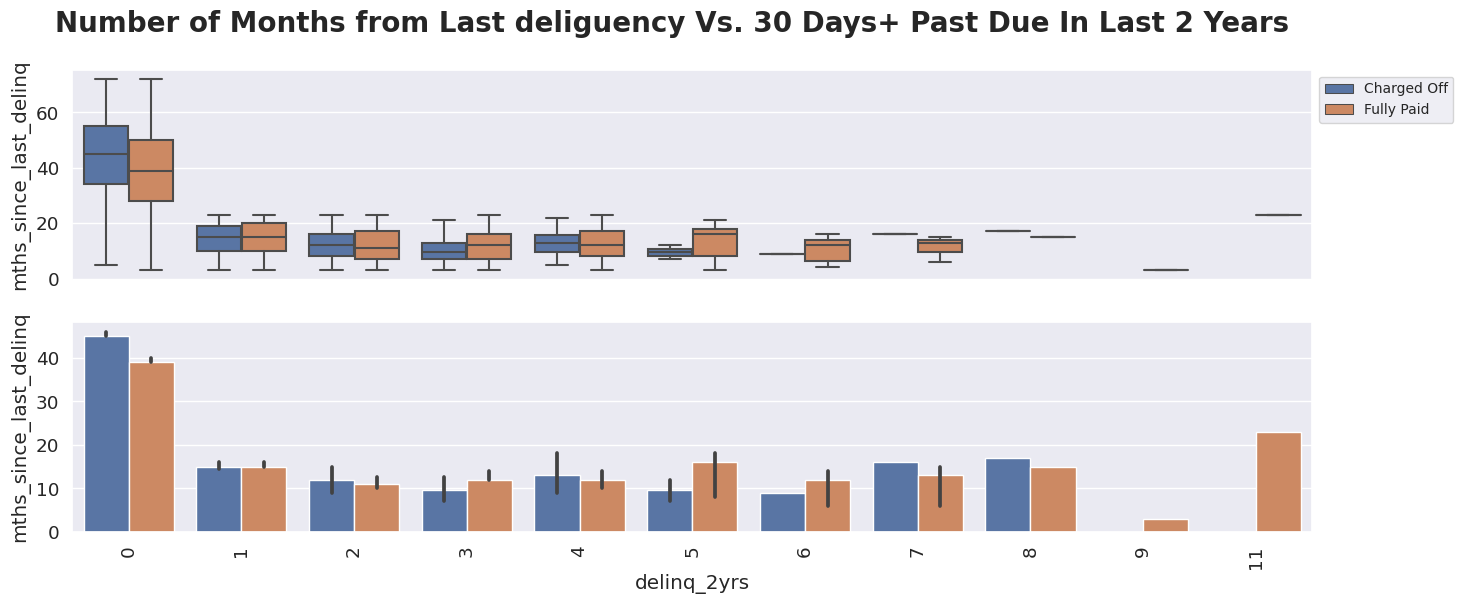

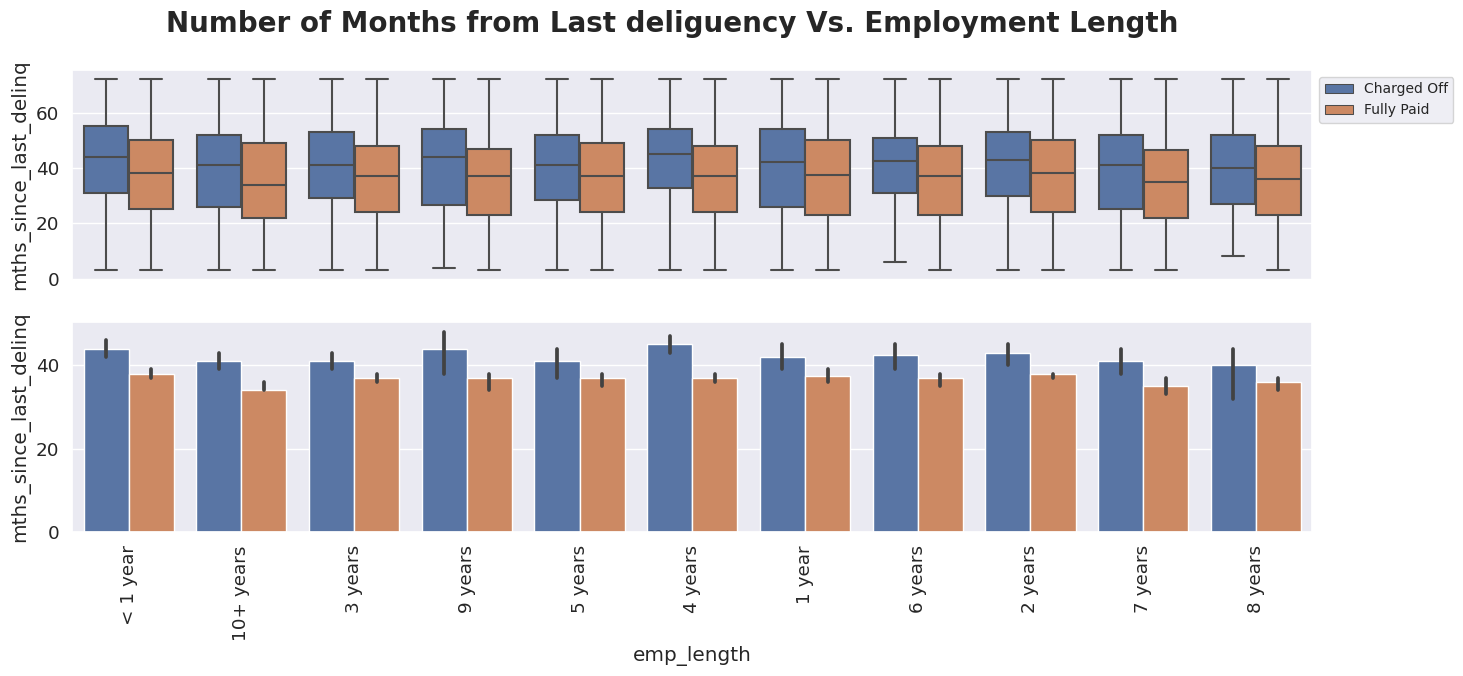

In [62]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 500000})'''))



categoricalDict3 = {"Purpose":"purpose",
                   "Grade":"grade", "Month of Line Opening":"earliest_cr_line_month",
                   "Income Verified": "verification_status", "Home Ownership":"home_ownership",
                   "Number of Payments":"term",
                    "Bankrupcies": "pub_rec_bankruptcies",
                   "30 Days+ Past Due In Last 2 Years": "delinq_2yrs",
                   "Employment Length":"emp_length"}

# Based on Correlation heatmap dependent continues variables has been removed and replaceed by from the rest of the study
continuesDict = {"Interest Rate":"int_rate", "Percentage Installment of Loan per Mount": "installment_prc",
                    "Anual Income":"annual_inc",  "Percentage paied from founded Loan": "pymnt_prc",
                    "Total Credit Revolving Balance": "revol_bal", "Ratio debt to Income":"dti",
                    "Number of Months from Last deliguency":"mths_since_last_delinq"}

numericalCols = ["int_rate", "revol_util", "dti", "annual_inc", "mths_since_last_delinq"]

for k in list(continuesDict.keys()):
  for j in list(categoricalDict3.keys()):
    bivariate_box_barPlot(df, categoricalDict3[j], continuesDict[k], "loan_status", f"{k} Vs. {j}")

1. Interest rate does not seem to be a contributing factor to default applicants regard less of the categorical factor being used.

2. The box plot for percentage installment for tends to be lower for defaulted applicants with 2 recorded bankrupcies.

3. Applicants with 2 bankruptcy report and higher annual income are more likely to be defrauded. Based on the Box plot for Annual income vs. Bankruptcies the 25 percentile annual income for people with 2 bankruptcies is higher than 75 percentile annual income of applicants that fully paid off their loan.